In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gc
from sklearn.preprocessing.label import LabelEncoder
pd.options.display.max_columns = 599
pd.options.display.max_rows = 100
import altair as alt
import seaborn as sns

In [2]:
def reduce_memory_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                c_prec = df[col].apply(lambda x: np.finfo(x).precision).max()
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max and c_prec == np.finfo(np.float32).precision:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df
 

In [3]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')

In [4]:
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')

In [5]:
print(train_identity.shape, train_transaction.shape)
print(train_transaction.info(), test_transaction.info())


(144233, 41) (590540, 394)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506691 entries, 0 to 506690
Columns: 393 entries, TransactionID to V339
dtypes: float64(376), int64(3), object(14)
memory usage: 1.5+ GB
None None


In [6]:
train = pd.merge(train_transaction, train_identity,on='TransactionID',how='left')
test = pd.merge(test_transaction, test_identity, on = 'TransactionID', how = 'left')

In [7]:
del train_identity, train_transaction, test_identity, test_transaction

In [8]:
gc.collect()

49

In [16]:
train = reduce_memory_usage(train)
test = reduce_memory_usage(test)

Mem. usage decreased to 1948.05 Mb (0.6% reduction)
Mem. usage decreased to 1670.97 Mb (0.4% reduction)


In [9]:
train.memory_usage().sum()/1024**2

1959.8762512207031

In [10]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0    NaN   
1  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN    NaN   
2  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0    NaN   
3  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN    NaN   
4  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN    NaN   

  P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  \
0           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0   
4     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   

   C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  D7  D8  D9  \
0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN NaN NaN NaN   
1  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
2  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN NaN NaN NaN   
3  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN NaN NaN NaN   
4  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN NaN NaN NaN   

    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4   M5   M6   M7   M8  \
0  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2    F    T  NaN  NaN   
1   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN   M0    T    T  NaN  NaN   
2   0.0  315.0  NaN  NaN  NaN  315.0    T    T    T   M0    F    F    F    F   
3  84.0    NaN  NaN  NaN  NaN  111.0  NaN  NaN  NaN   M0    T    F  NaN  NaN   
4   NaN    NaN  NaN  NaN  NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  \
0  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0   
2    F  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  

In [10]:
test.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  addr1  addr2   dist1  dist2 P_emaildomain  \
0  150.0        visa  226.0  debit  170.0   87.0     1.0    NaN     gmail.com   
1  150.0        visa  226.0  debit  299.0   87.0     4.0    NaN       aol.com   
2  150.0        visa  226.0  debit  472.0   87.0  2635.0    NaN   hotmail.com   
3  150.0        visa  166.0  debit  205.0   87.0    17.0    NaN     gmail.com   
4  150.0  mastercard  117.0  debit  264.0   87.0     6.0    NaN     gmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1           NaN  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2           NaN  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3           NaN  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   
4           NaN  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0  5.0  0.0  6.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   
4   14.0  6.0   22.0   22.0   0.0   22.0   0.0 NaN NaN NaN NaN   22.0   22.0   

   D12  D13  D14    D15 M1 M2 M3   M4   M5 M6   M7   M8   M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0  T  T  F  NaN  NaN  F    T    T    T  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0  T  F  F   M0  NaN  F  NaN  NaN  NaN  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0  T  T  F   M0    F  F    F    F    F  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0  T  T  T  NaN  NaN  T  NaN  NaN  NaN  1.0  1.0  1.0   
4  NaN  NaN  NaN   22.0  T  T  T  NaN  NaN  F    F    T    T  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0

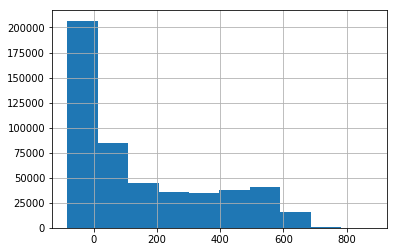

In [45]:
train.D15.hist()

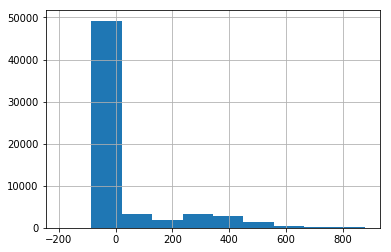

In [47]:
train.D14.hist()

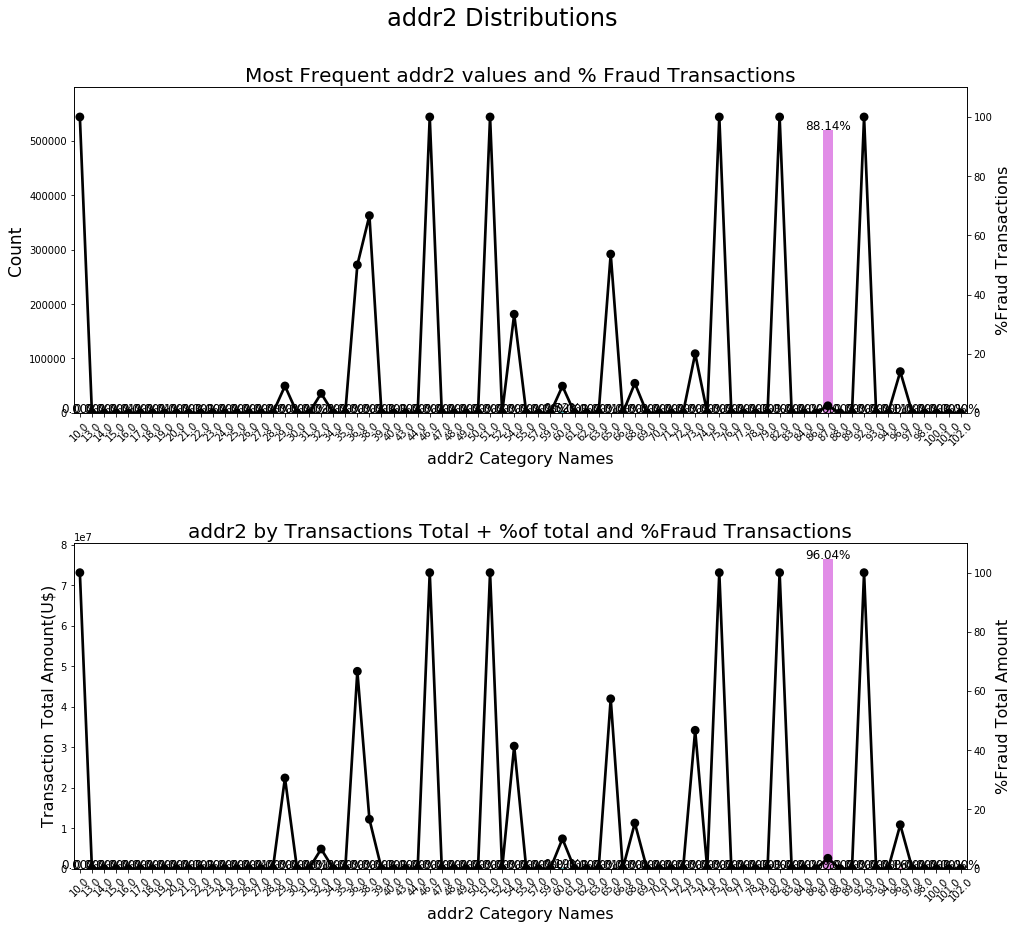

In [60]:
 def ploting_cnt_amt(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    total = len(df)
    total_amt = df.groupby(['isFraud'])['TransactionAmt'].sum().sum()
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmt'].sum() \
                / df.groupby([col])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    g1 = sns.barplot(x=col, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    g1t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g1.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    g1.set_xticklabels(g.get_xticklabels(),rotation=45)    
    
    for p in g1.patches:
        height = p.get_height()
        g1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()
    
ploting_cnt_amt(train, 'addr2')

In [90]:
tmp = pd.crosstab(train['ProductCD'], train['isFraud'],normalize='index')

In [93]:
tmp = tmp.reset_index()
tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
tmp

isFraud  index ProductCD   NoFraud     Fraud
0            0         C  0.883127  0.116873
1            1         H  0.952338  0.047662
2            2         R  0.962174  0.037826
3            3         S  0.941004  0.058996
4            4         W  0.979601  0.020399

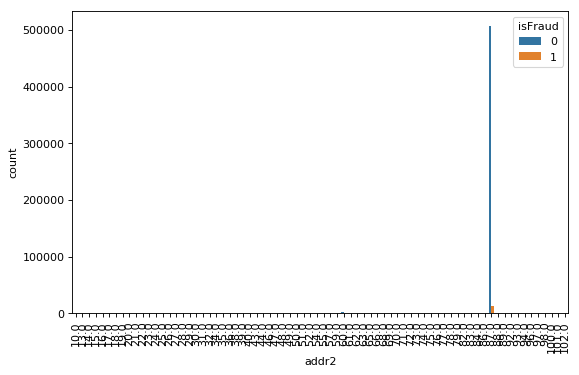

In [111]:
fig = plt.figure(dpi = 80, figsize=(8,5))

g1 = sns.countplot(x='addr2', hue='isFraud', data=train)
# plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
g1.set_xticklabels(g1.get_xticklabels(),rotation=90);


In [150]:
Y = pd.DataFrame([[0,1,np.NAN, np.NaN]],columns=['A','B','C','D'])
Y.isnull()
print(train.shape)
Y

(590540, 434)


A  B   C   D
0  0  1 NaN NaN

In [12]:
#Количество пропусщенных и пустых значений в столбцах
total_rows, total_cols = train.shape
arr = np.zeros((total_cols))
for i,col in enumerate(train.columns):
    arr[i] = train[col].isnull().sum()/total_rows*100
df_na = pd.DataFrame([arr], columns=train.columns.values)
df_na.reset_index()
df_na.rename({0:'P'}, inplace=True)
df_na

TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  card1  \
P            0.0      0.0            0.0             0.0        0.0    0.0   

      card2     card3     card4     card5     card6      addr1      addr2  \
P  1.512683  0.265012  0.267044  0.721204  0.266028  11.126427  11.126427   

       dist1      dist2  P_emaildomain  R_emaildomain   C1   C2   C3   C4  \
P  59.652352  93.628374      15.994852      76.751617  0.0  0.0  0.0  0.0   

    C5   C6   C7   C8   C9  C10  C11  C12  C13  C14        D1         D2  \
P  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.214888  47.549192   

          D3         D4         D5         D6        D7        D8        D9  \
P  44.514851  28.604667  52.467403  87.606767  93.40993  87.31229  87.31229   

         D10        D11        D12        D13        D14        D15  \
P  12.873302  47.293494  89.041047  89.509263  89.469469  15.090087   

          M1         M2         M3         M4         M5         M6  \
P  45.907136  45.907136  45.907136  47.658753  59.349409  28.678836   

          M7         M8         M9         V1         V2         V3  \
P  58.635317  58.633115  58.633115  47.293494  47.293494  47.293494   

          V4         V5         V6         V7         V8         V9  \
P  47.293494  47.293494  47.293494  47.293494  47.293494  47.293494   

         V10        V11        V12        V13        V14        V15  \
P  47.293494  47.293494  12.881939  12.881939  12.881939  12.881939   

         V16        V17        V18        V19        V20        V21  \
P  12.881939  12.881939  12.881939  12.881939  12.881939  12.881939   

         V22        V23        V24        V25        V26        V27  \
P  12.881939  12.881939  12.881939  12.881939  12.881939  12.881939   

         V28        V29        V30        V31        V32        V33  \
P  12.881939  12.881939  12.881939  12.881939  12.881939  12.881939   

         V34        V35        V36        V37        V38        V39  \
P  12.881939  28.612626  28.612626  28.612626  28.612626  28.612626   

         V40        V41        V42        V43        V44        V45  \
P  28.612626  28.612626  28.612626  28.612626  28.612626  28.612626   

         V46        V47        V48        V49        V50        V51  \
P  28.612626  28.612626  28.612626  28.612626  28.612626  28.612626   

         V52       V53       V54       V55       V56       V57       V58  \
P  28.612626  13.05517  13.05517  13.05517  13.05517  13.05517  13.05517   

        V59       V60       V61       V62       V63       V64       V65  \
P  13.05517  13.05517  13.05517  13.05517  13.05517  13.05517  13.05517   

        V66       V67       V68       V69       V70       V71       V72  \
P  13.05517  13.05517  13.05517  13.05517  13.05517  13.05517  13.05517   

        V73       V74        V75        V76        V77        V78        V79  \
P  13.05517  13.05517  15.098723  15.098723  15.098723  15.098723  15.098723   

         V80        V81        V82        V83        V84        V85  \
P  15.098723  15.098723  15.098723  15.098723  15.098723  15.098723   

         V86        V87        V88        V89        V90        V91  \
P  15.098723  15.098723  15.098723  15.098723  15.098723  15.098723   

         V92        V93        V94       V95       V96       V97       V98  \
P  15.098723  15.098723  15.098723  0.053172  0.053172  0.053172  0.053172   

        V99      V100      V101      V102      V103      V104      V105  \
P  0.053172  0.053172  0.053172  0.053172  0.053172  0.053172  0.053172   

       V106      V107      V108      V109      V110      V111      V112  \
P  0.053172  0.053172  0.053172  0.053172  0.053172  0.053172  0.053172   

       V113      V114      V115      V116      V117      V118      V119  \
P  0.053172  0.053172  0.053172  0.053172  0.053172  0.053172  0.053172   

       V120      V121      V122      V123      V124      V125      V126  \
P  0.053172  0.053172  0.053172  0.053172  0.053172  0.053172  0

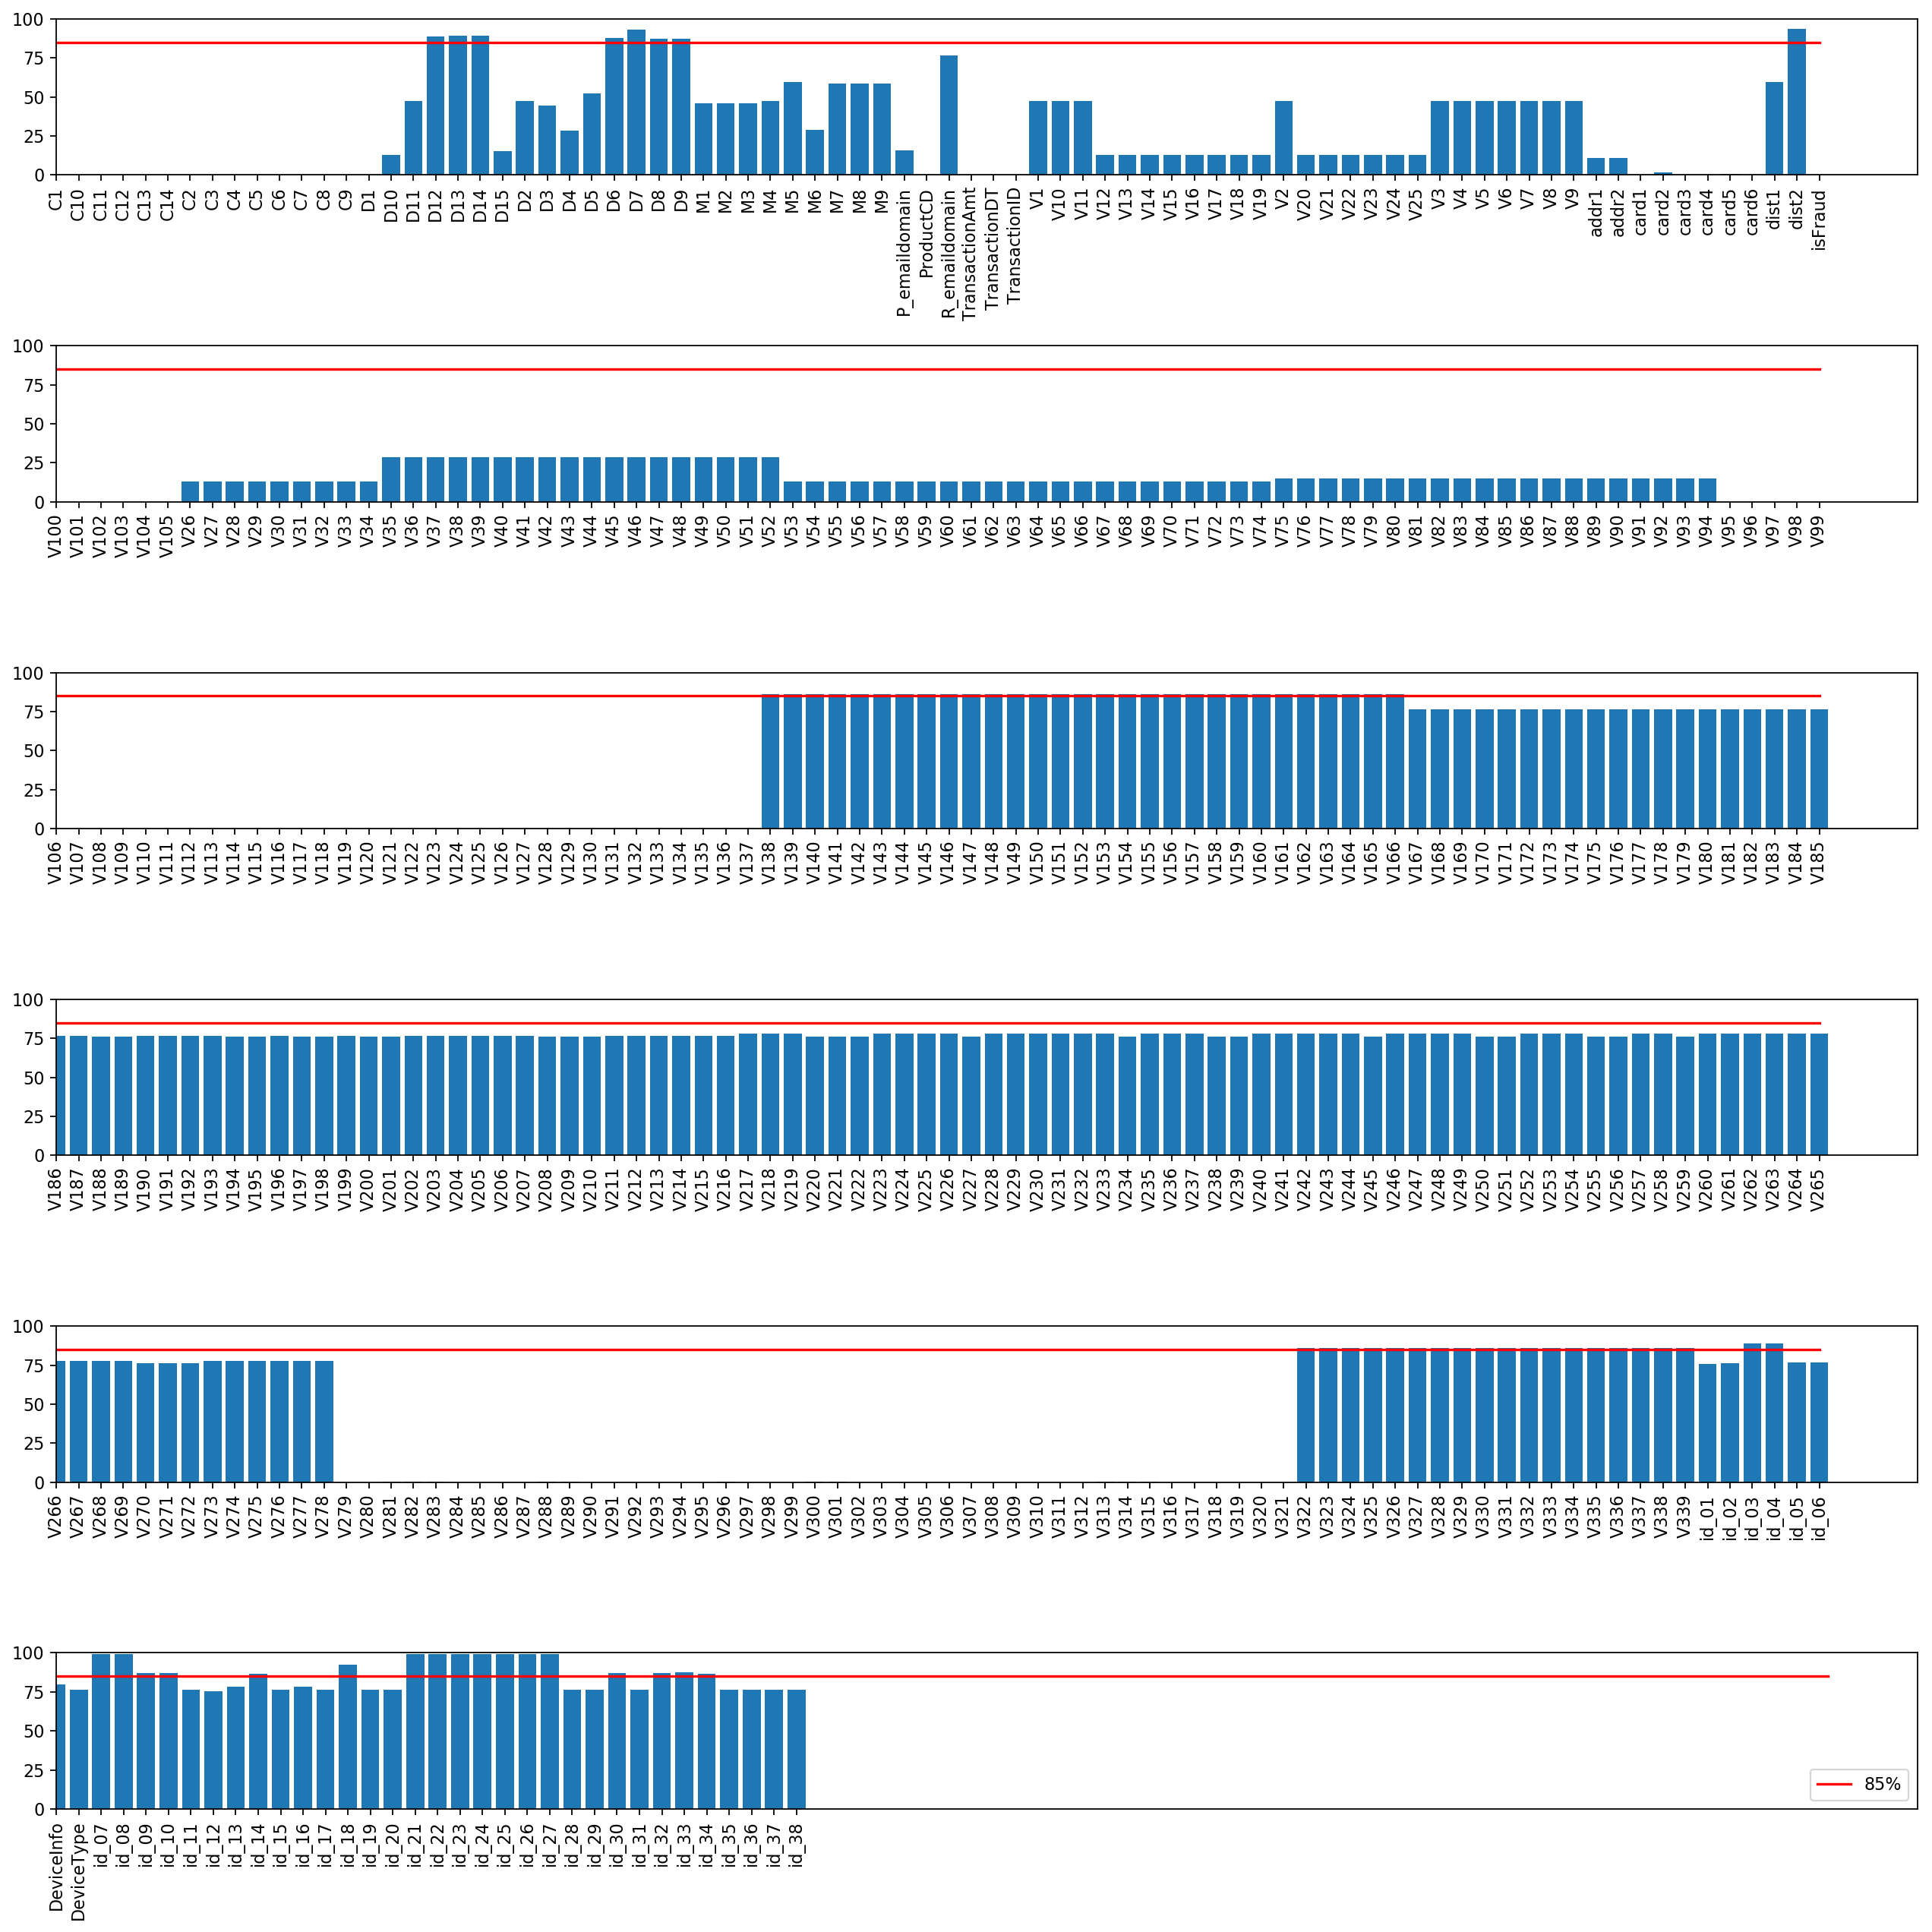

In [13]:
fig = plt.figure(dpi = 160,figsize=(16,16))
for i in range(round(total_cols/80)+1):
    fig.add_subplot(6,1,i+1)
    plt.bar(train.columns[i*80:(i+1)*80],arr[i*80:(i+1)*80],orientation='vertical')
    # g = sns.countplot(x='P',data=df_na.T,orient='h')
    # g.set_xticklabels(g.get_xticklabels(),rotation=90);
    plt.xticks(rotation=90);
    plt.ylim(0,100)
    plt.plot([85]*80,'red',label='85%')
    plt.xlim(0)
plt.legend()
plt.tight_layout()

In [108]:
train.id_22.dropna()

99        14.0
188       14.0
1062      41.0
1064      41.0
1389      14.0
          ... 
589701    14.0
589874    14.0
590384    14.0
590442    14.0
590451    14.0
Name: id_22, Length: 5169, dtype: float64

In [9]:
card_feature = train[['card1','card2','card3','card4', 'card5', 'card6']]
card_feature.describe()

card1          card2          card3          card5
count  590540.000000  581607.000000  588975.000000  586281.000000
mean     9898.734658     362.555488     153.194925     199.278897
std      4901.170153     157.793246      11.336444      41.244453
min      1000.000000     100.000000     100.000000     100.000000
25%      6019.000000     214.000000     150.000000     166.000000
50%      9678.000000     361.000000     150.000000     226.000000
75%     14184.000000     512.000000     150.000000     226.000000
max     18396.000000     600.000000     231.000000     237.000000

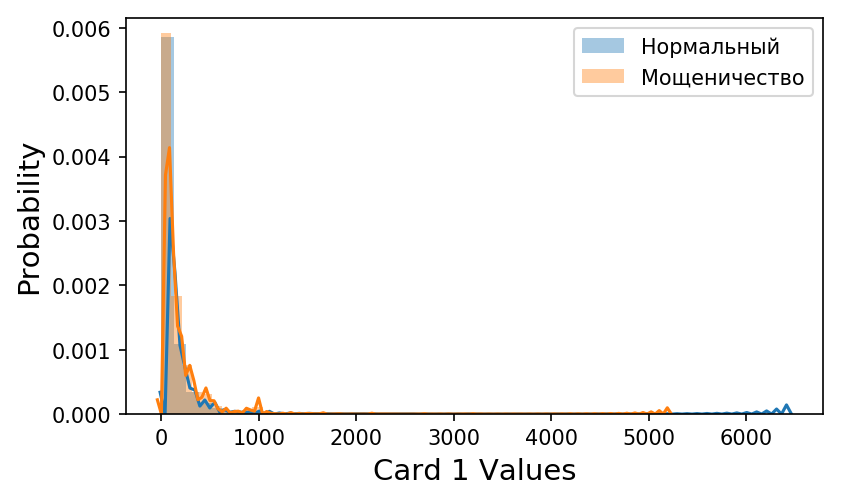

In [37]:
plt.figure(figsize=(6,3.5),dpi=150)
g = sns.distplot(train[(train.isFraud == 0) & (train.TransactionAmt < 15000)]['TransactionAmt'], label='Нормальный')
g = sns.distplot(train[train.isFraud == 1]['TransactionAmt'], label='Мощеничество')
g.set_xlabel("Card 1 Values", fontsize=14)
g.set_ylabel("Probability", fontsize=14)
g.legend()

d:\program\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


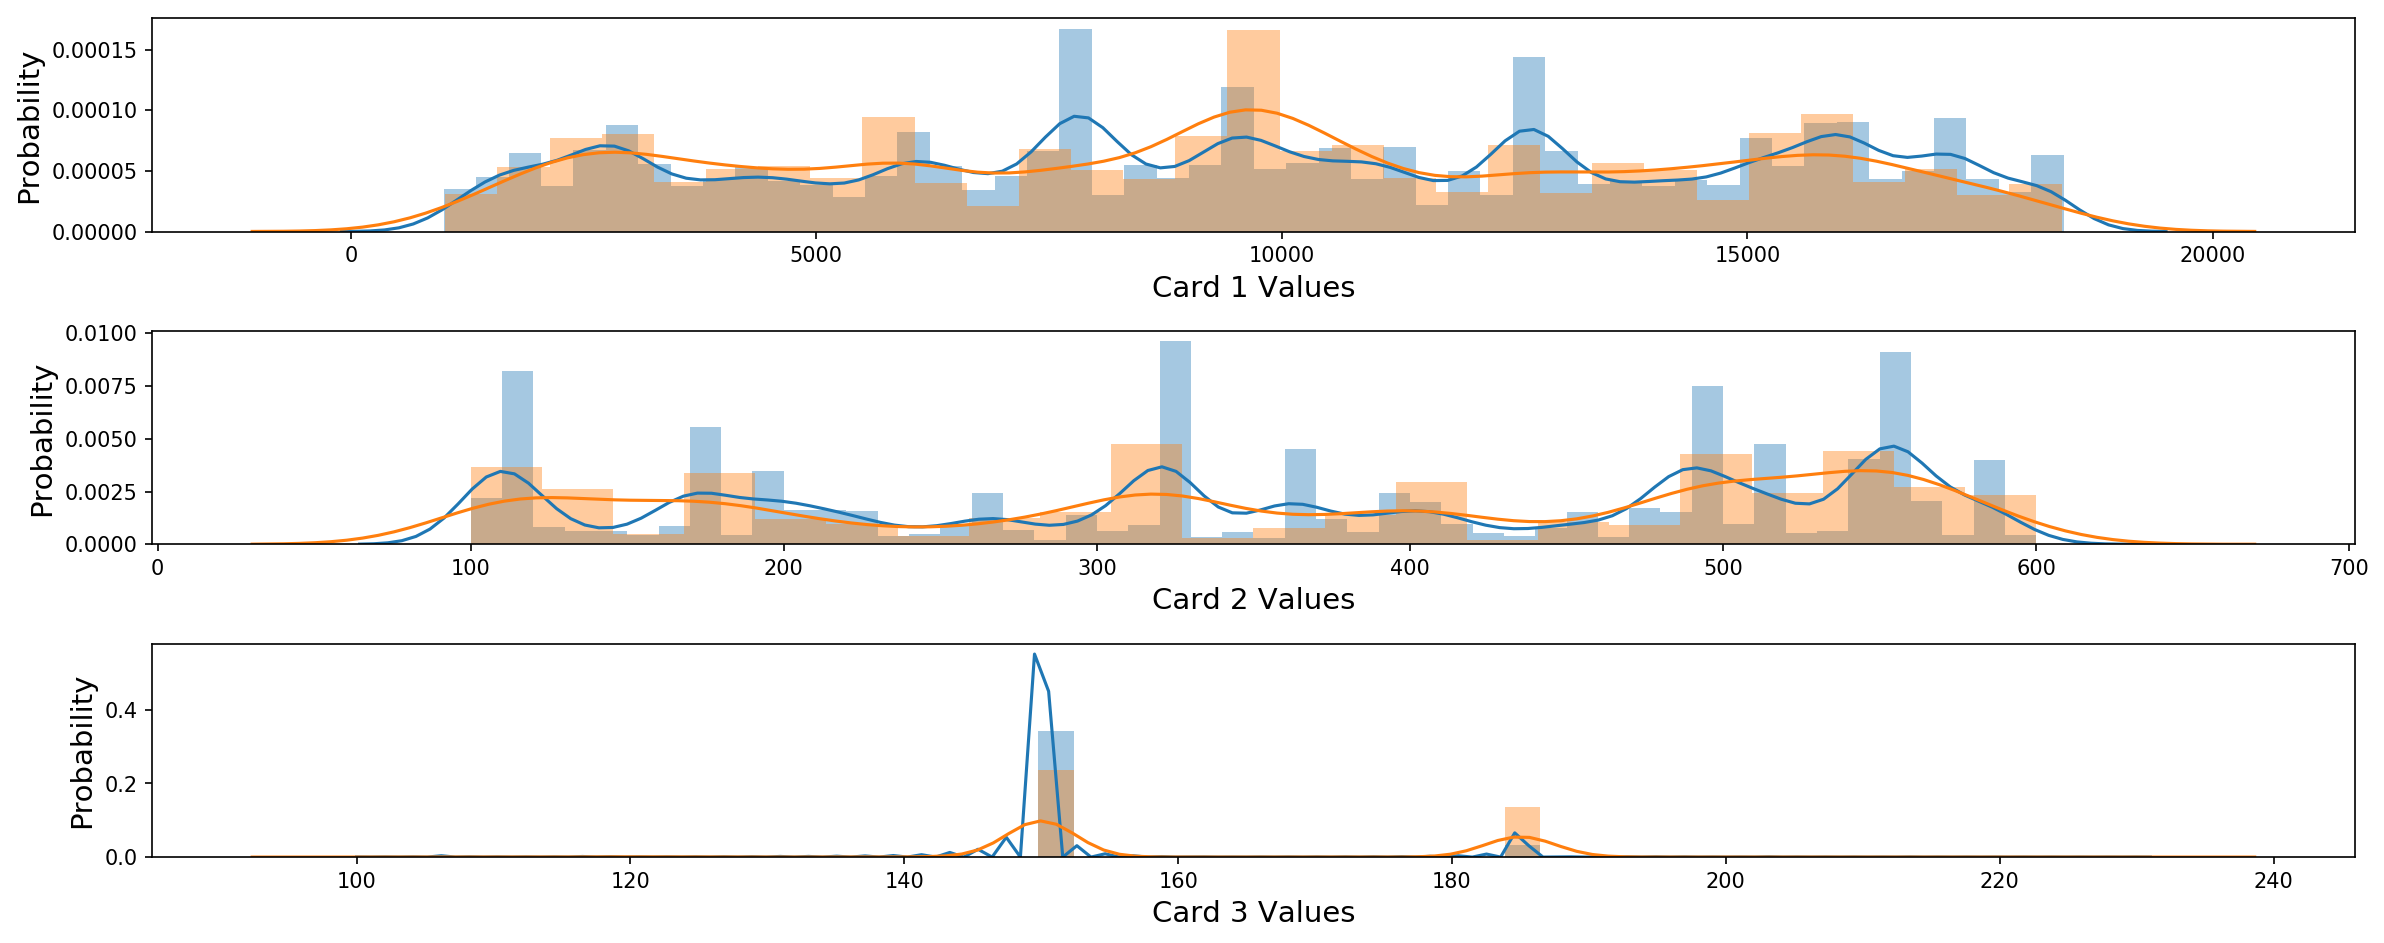

In [24]:
plt.figure(figsize=(16,8),dpi=150)
plt.subplot(411)
g = sns.distplot(train[train.isFraud == 0]['card1'], label='Нормальный')
g = sns.distplot(train[train.isFraud == 1]['card1'], label='Мощеничество')
g.set_xlabel("Card 1 Values", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(412)
g = sns.distplot(train[train.isFraud == 0]['card2'].dropna(), label='Нормальный')
g = sns.distplot(train[train.isFraud == 1]['card2'].dropna(), label='Мощеничество')
g.set_xlabel("Card 2 Values", fontsize=14)
g.set_ylabel("Probability", fontsize=14)

plt.subplot(413)
g = sns.distplot(train[train.isFraud == 0]['card3'].dropna(), label='Нормальный')
g = sns.distplot(train[train.isFraud == 1]['card3'].dropna(), label='Мощеничество')
g.set_xlabel("Card 3 Values", fontsize=14)
g.set_ylabel("Probability", fontsize=14)
plt.tight_layout()

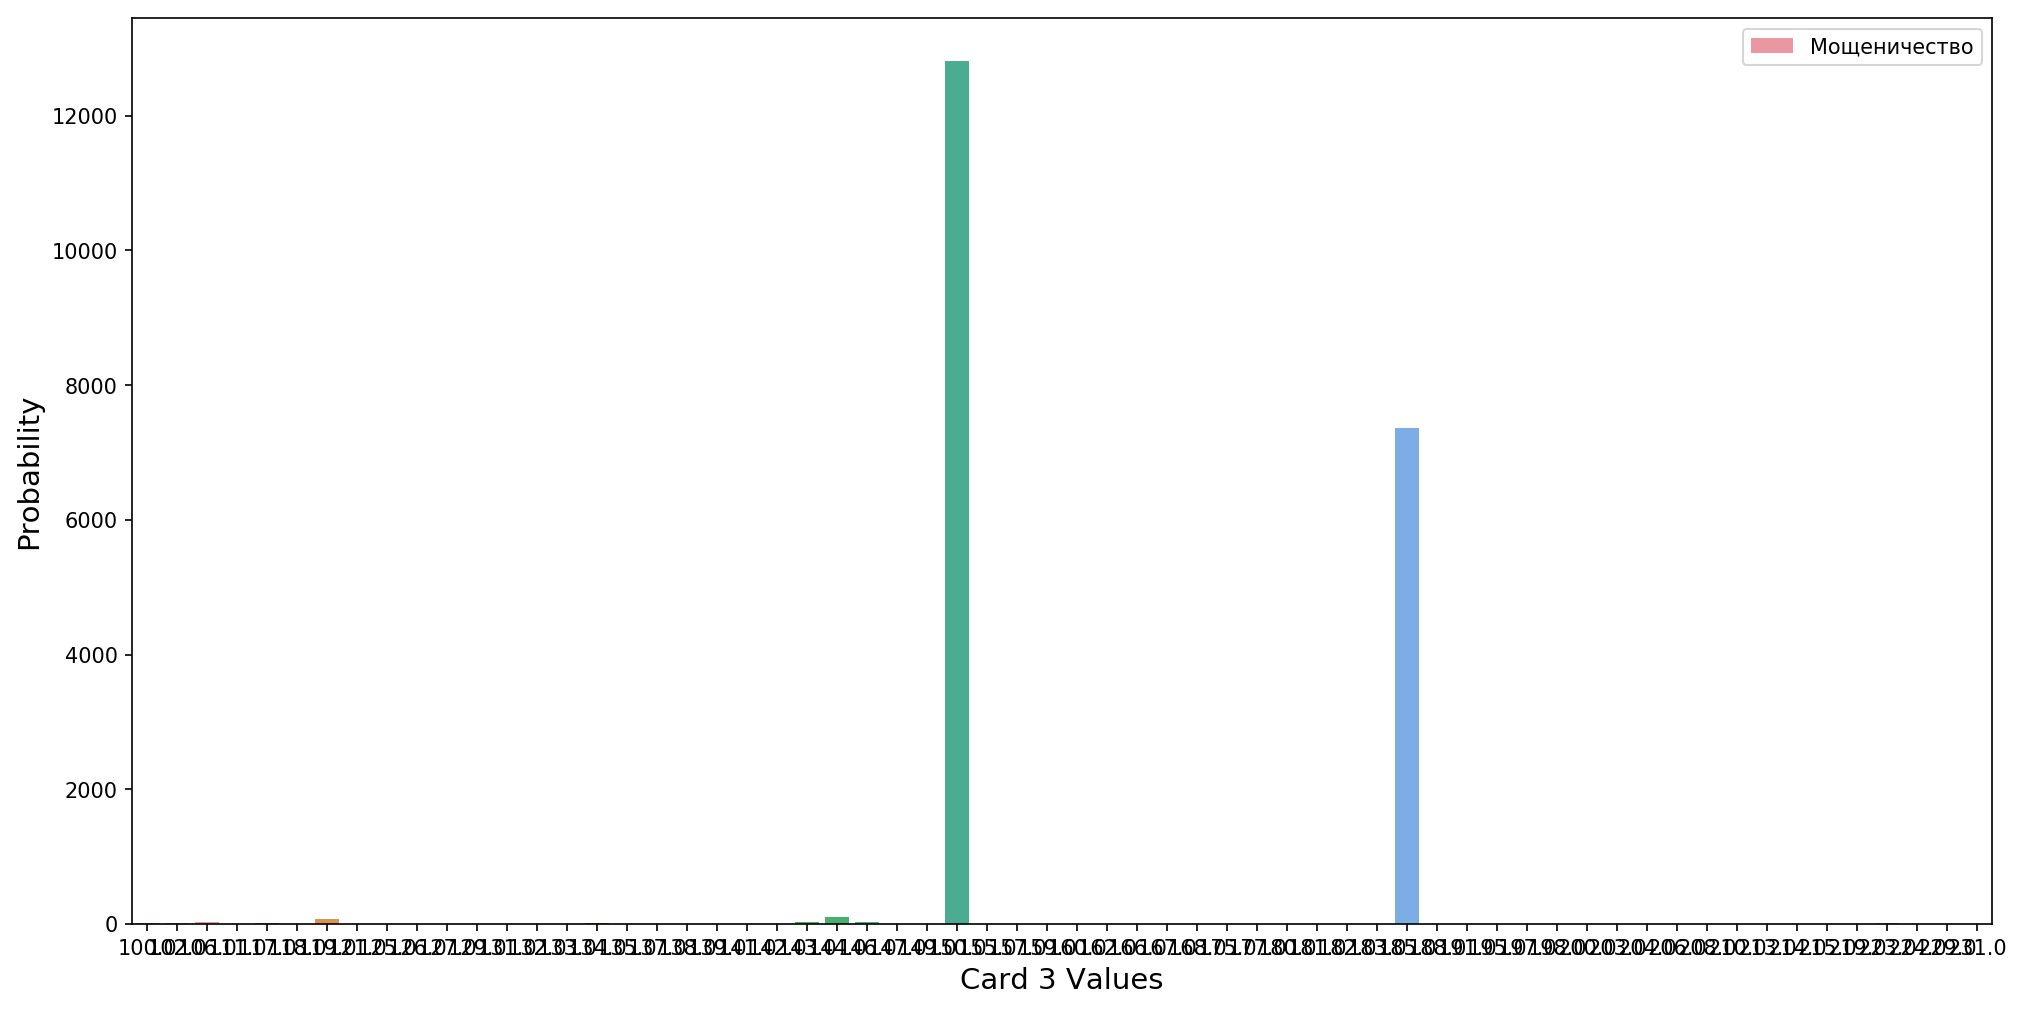

In [18]:
plt.figure(figsize=(16,8),dpi=150)

# g = sns.countplot(train[train.isFraud == 0]['card3'].dropna(), label='Нормальный')
g = sns.countplot(train[train.isFraud == 1]['card3'].dropna(), label='Мощеничество')
g.set_xlabel("Card 3 Values", fontsize=14)
g.set_ylabel("Probability", fontsize=14)
g.legend()
# g.set_xticks()

### Категориальные признаки

In [45]:
cat_cols = train.columns[train.dtypes == object].values
cat_cols

array(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain',
       'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12',
       'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'], dtype=object)

#### Признак id_30 -Тип операционной системы

In [11]:
print('id_30 - операционная система устройства')
print('Пустых записей :', train.id_30.isna().sum())
print('Количество уникальных ОС: {}, включает NA'.format(len(train.id_30.unique())))
print('Проверка количества:', train.groupby('id_30').count()['TransactionID'].sum()+train.id_30.isna().sum())

id_30 - операционная система устройства
Пустых записей : 512975
Количество уникальных ОС: 76, включает NA
Проверка количества: 590540


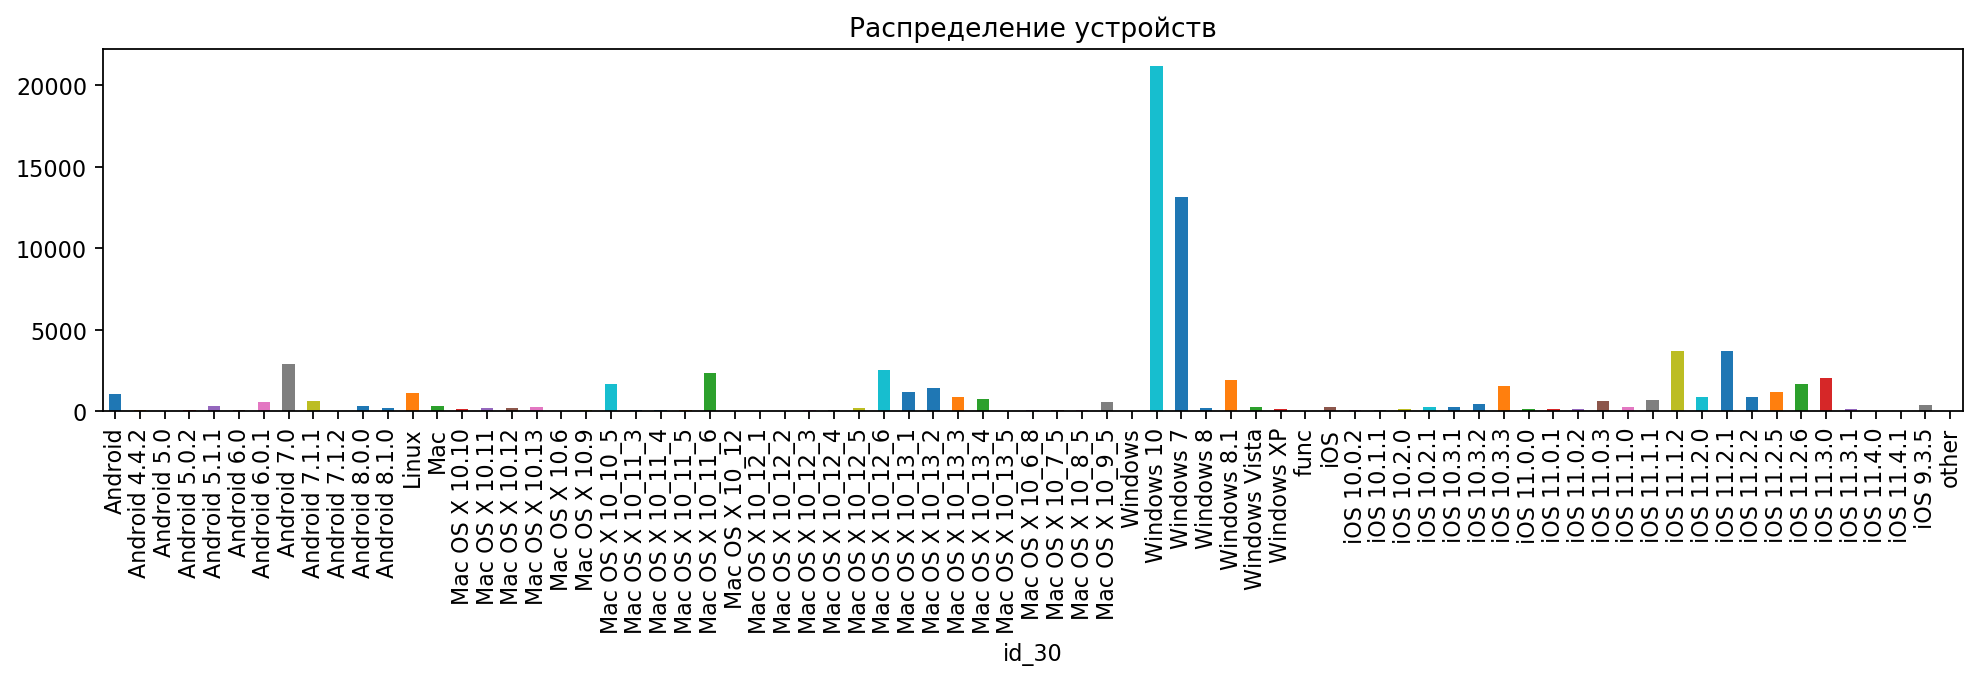

In [28]:
fig = plt.figure(dpi = 160, figsize=(15,3))
train.groupby('id_30').count()['TransactionID'].plot.bar(title='Распределение устройств')

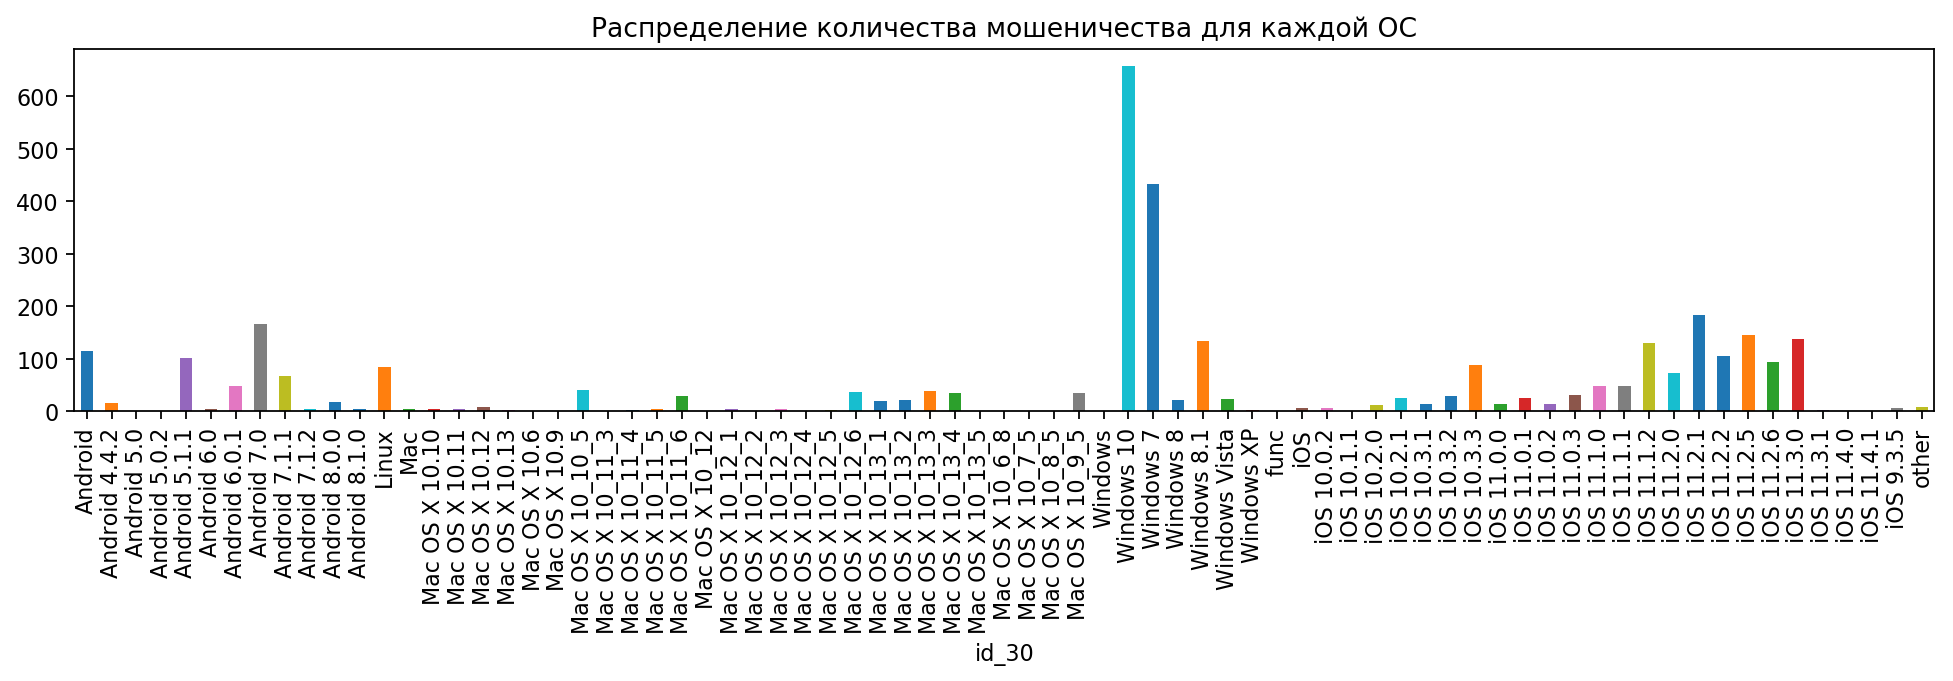

In [31]:
fig = plt.figure(dpi = 160, figsize=(15,3))
train.groupby('id_30')['isFraud'].sum().plot.bar(title='Распределение количества мошеничества для каждой ОС')

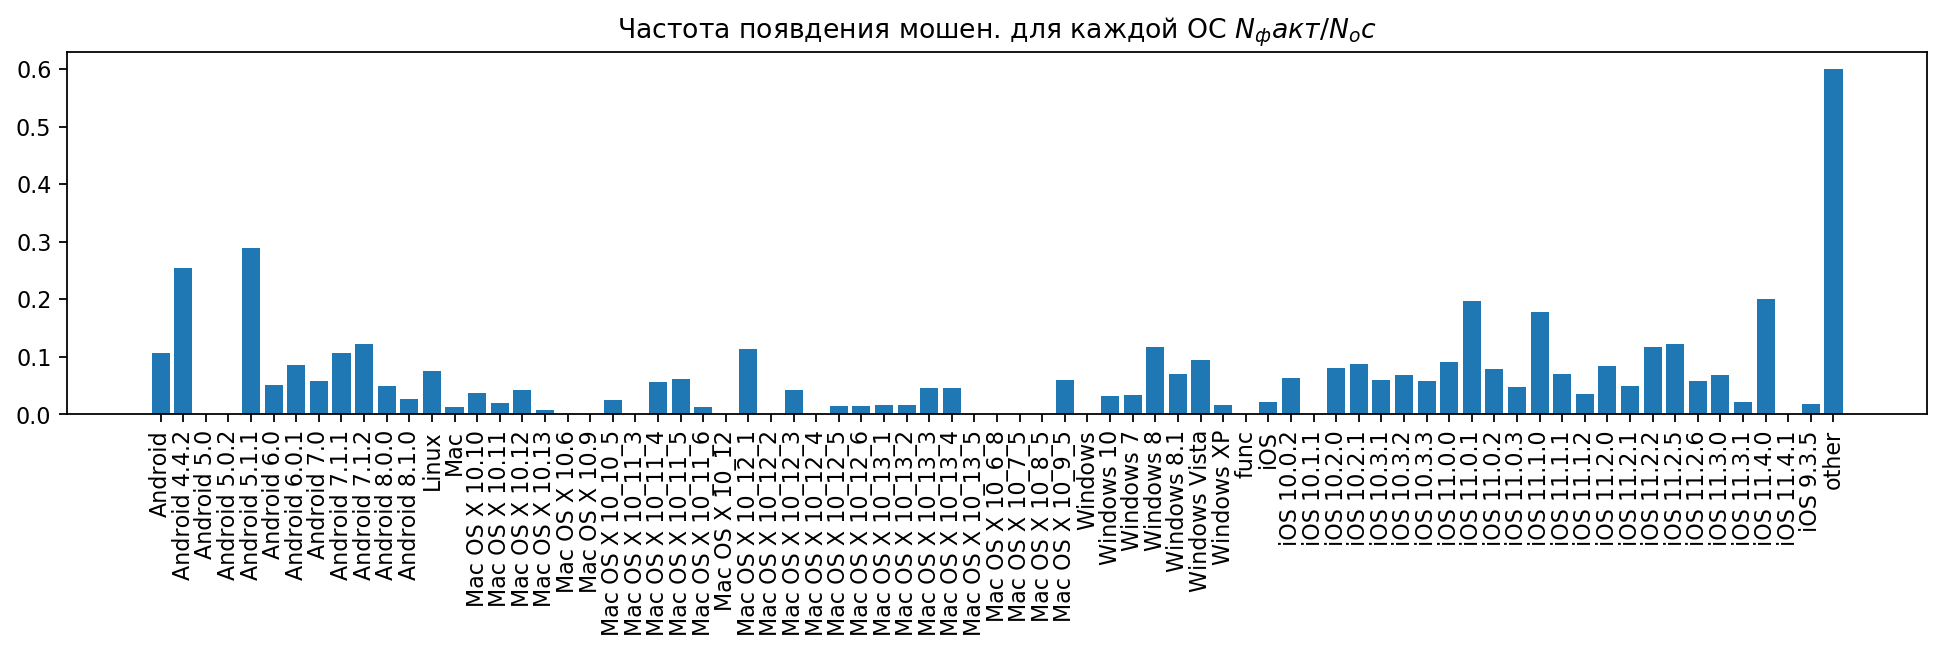

In [32]:
fig = plt.figure(dpi = 160, figsize=(15,3))
plt.bar(train.groupby('id_30').count()['TransactionID'].index,
            train.groupby('id_30')['isFraud'].sum().values/train.groupby('id_30').count()['TransactionID'].values)
plt.title('Частота появдения мошен. для каждой ОС $N_факт/N_ос$')
plt.xticks(rotation='vertical');

#### Признак id_30 -Тип браузера

In [52]:
print('Тип используемоего браузера')
print('Количество уникальныйх: ',len(train.id_31.unique()) - 1)
print('Количество записей:', train.groupby('id_31').count()['TransactionID'].sum())

Тип используемоего браузера
Количество уникальныйх:  130
Количество записей: 140282


(array([0.]), array([130.89]))

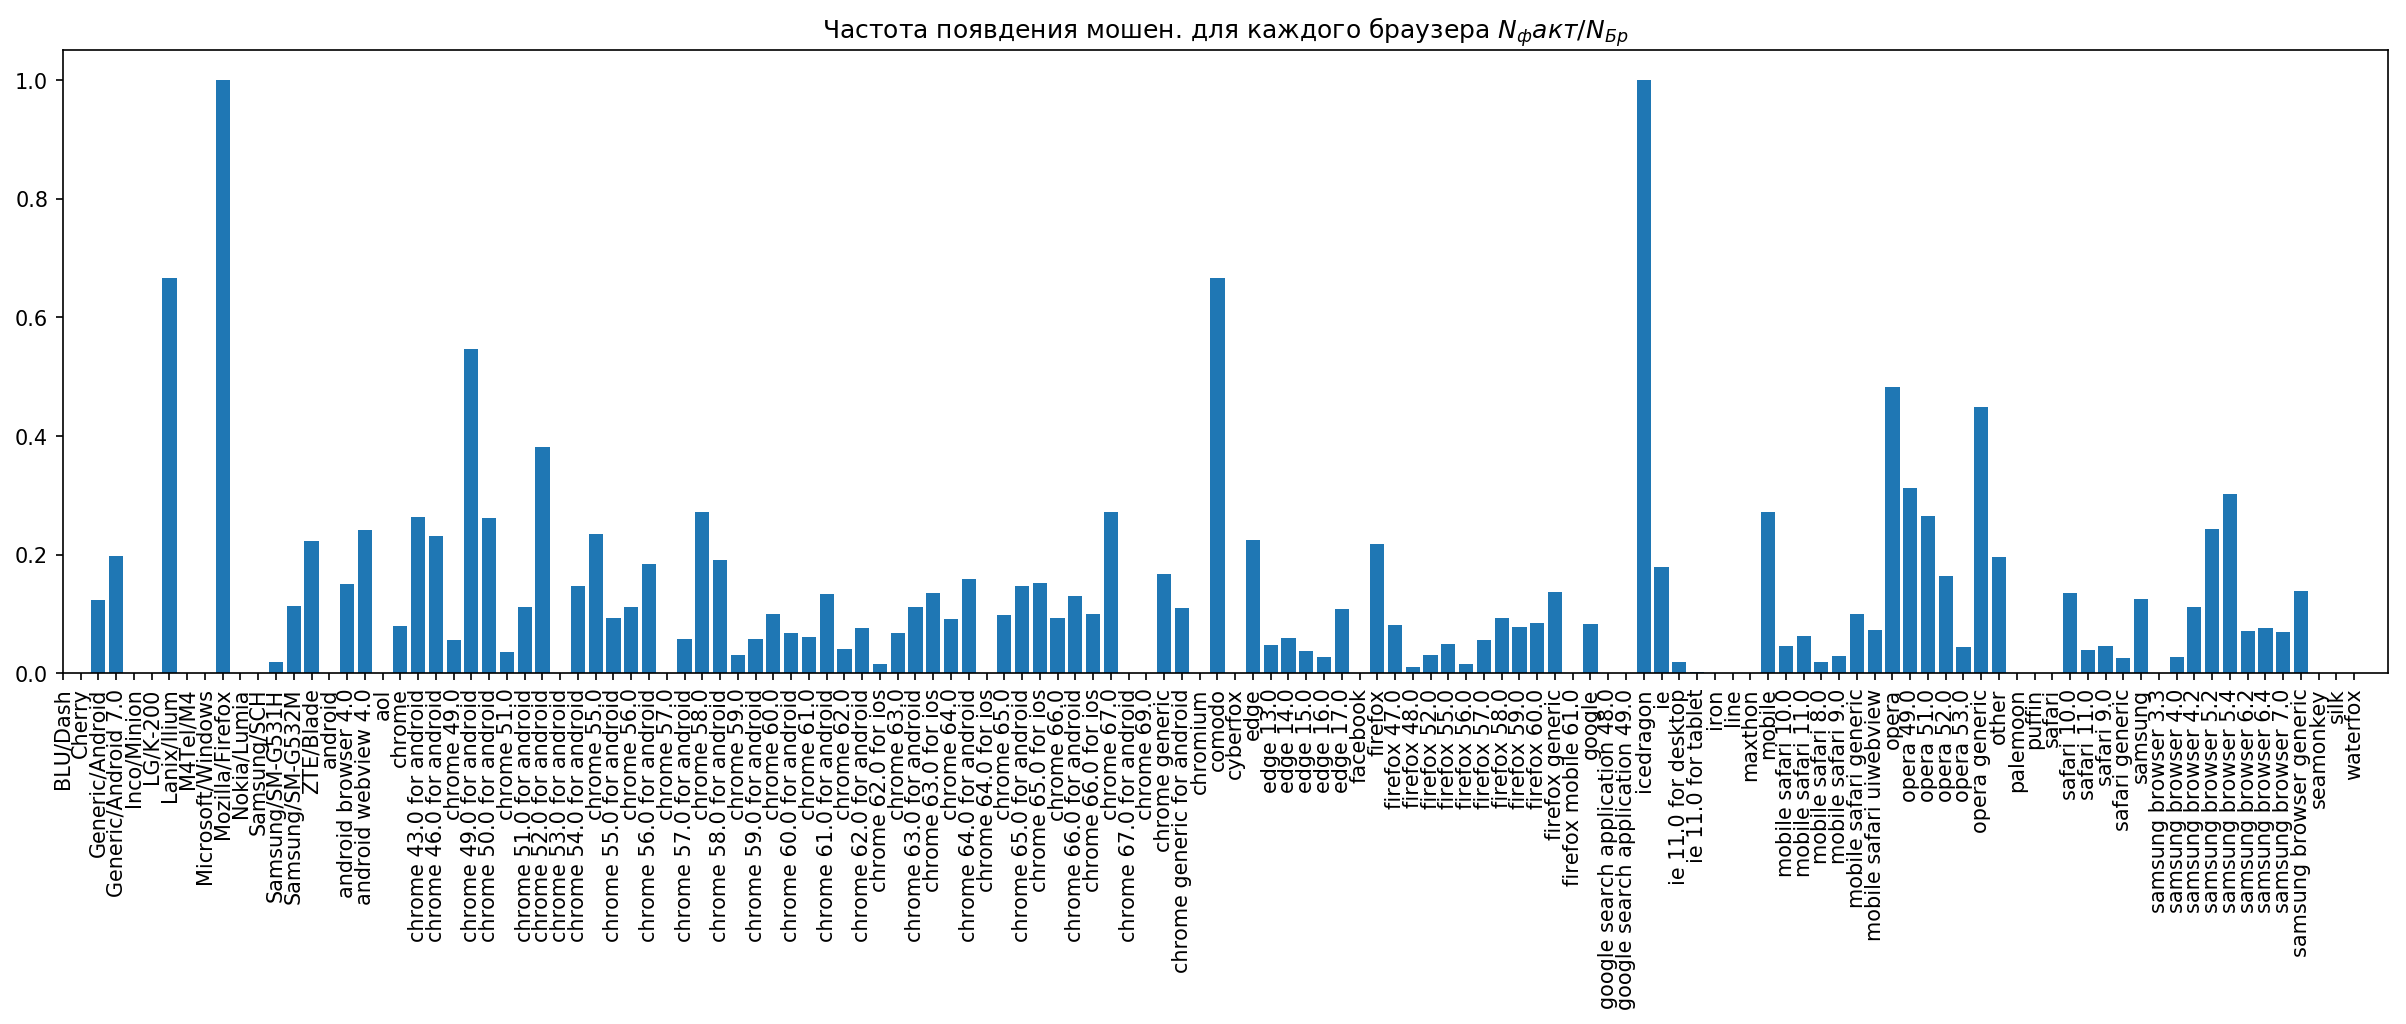

In [100]:
fig = plt.figure(dpi = 150, figsize=(20,5.5))
plt.bar(train.groupby('id_31').count()['TransactionID'].index,
        train.groupby('id_31')['isFraud'].sum().values/train.groupby('id_31').count()['TransactionID'].values,
#         orientation='horizontal'
        )
plt.title('Частота появдения мошен. для каждого браузера $N_факт/N_{Бр}$')
plt.xticks(rotation='vertical');
plt.xlim(0,fig.get_axes()[0].get_xlim()[1]-5)

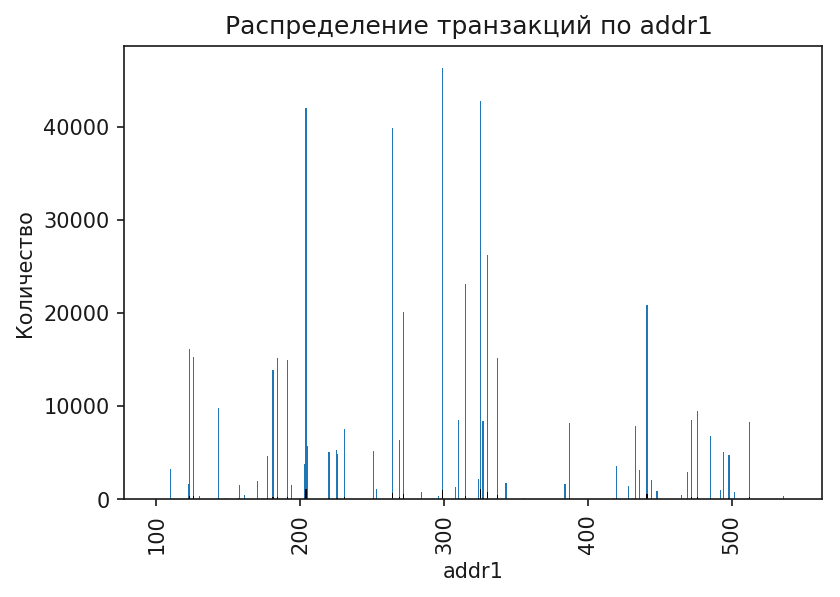

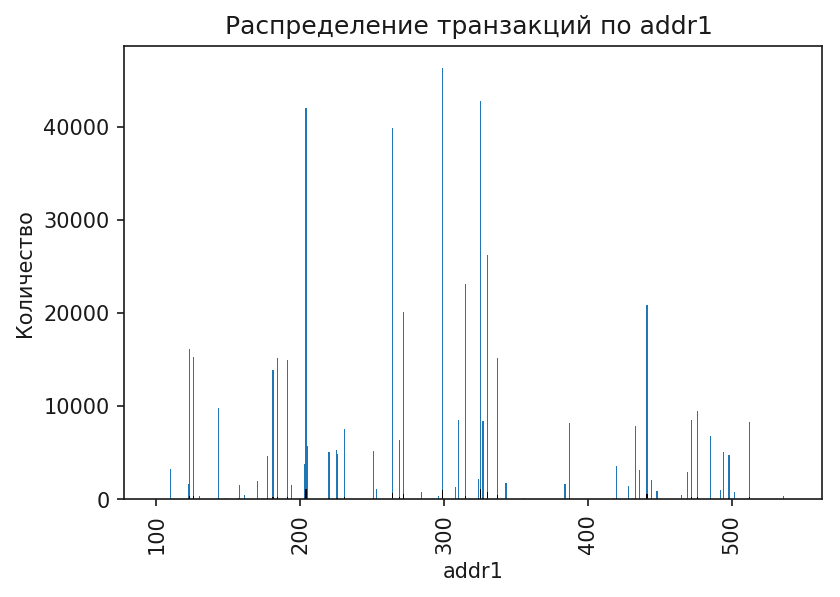

In [115]:
plotting_bar_plot_for_dates(train,'addr1')

In [10]:
for col in cat_cols:
    print(col,len(train[col].unique()), len(test[col].unique()))

ProductCD 5 5
card4 5 5
card6 5 4
P_emaildomain 60 61
R_emaildomain 61 61
M1 3 3
M2 3 3
M3 3 3
M4 4 4
M5 3 3
M6 3 3
M7 3 3
M8 3 3
M9 3 3
id_12 3 3
id_15 4 4
id_16 3 3
id_23 4 4
id_27 3 3
id_28 3 3
id_29 3 3
id_30 76 87
id_31 131 136
id_33 261 391
id_34 5 3
id_35 3 3
id_36 3 3
id_37 3 3
id_38 3 3
DeviceType 3 3
DeviceInfo 1787 2227


### Время - TransactionDT

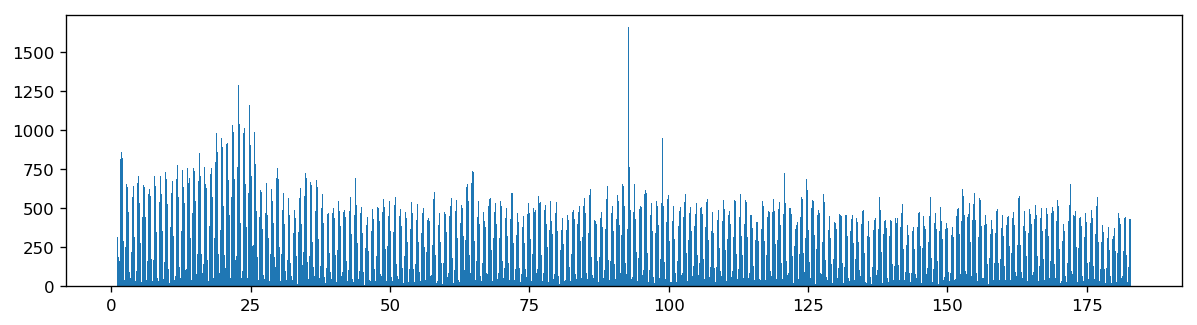

In [12]:
fig = plt.figure(dpi=120, figsize=(12,3))
vals = plt.hist(train['TransactionDT'] / (3600*24), bins=1800)

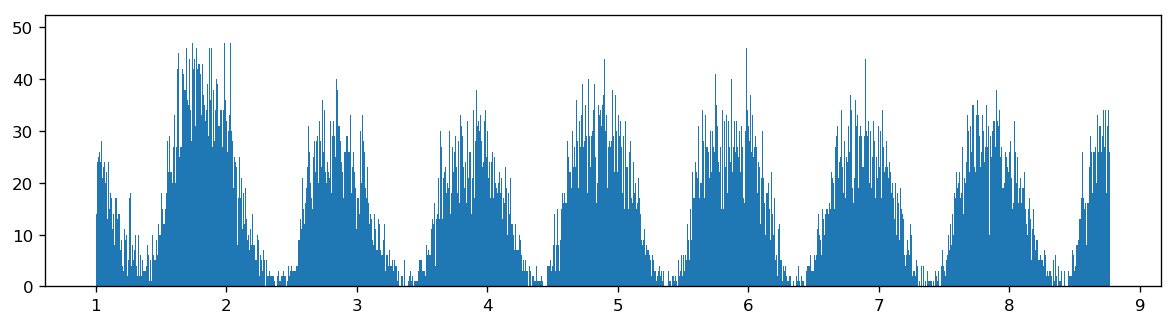

In [13]:
fig = plt.figure(dpi=120, figsize=(12,3))
vals = plt.hist ((train['TransactionDT']/(3600*24))[:30000], bins=1800)

In [46]:
import datetime

In [47]:
START_DATE = '2017-12-01' # От стартовой точки зависит распределение

startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d") #разбирает строку с датой

train["Date"] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

train['_Weekdays'] = train['Date'].dt.dayofweek
train['_Hours'] = train['Date'].dt.hour
train['_Days'] =  train['Date'].dt.day

In [48]:
test["Date"] = test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

test['_Weekdays'] = test['Date'].dt.dayofweek
test['_Hours'] = test['Date'].dt.hour
test['_Days'] =  test['Date'].dt.day

In [49]:
def plotting_bar_plot_for_dates(df,col, logscale=False):
    fig = plt.figure(dpi=150,)
    
    sns.set_color_codes("pastel")

    g = sns.barplot(x=train.groupby(col).count()['TransactionID'].index,
            y=train.groupby(col).count()['TransactionID'])
    
    g = sns.barplot(x=train[train['isFraud']==1].groupby(col).count()['TransactionID'].index,
                y=train[train['isFraud']==1].groupby(col).count()['TransactionID'], color="black" , linewidth=0.5 )
    g.set_title(f"Распределение транзакций по {col} ",)
    g.set_ylabel('Количество')
    g.set_xlabel(f'{col}')
    if logscale == True:
        fig.get_axes()[0].set_yscale('log')

    plt.xticks(rotation=90)
    return fig

In [50]:
def plotting_bar_plot_for_dates(df,col, logscale=False):
    fig = plt.figure(dpi=150,)
    
    temp = df.groupby(col).count()['TransactionID']
    plt.bar(temp.index, temp)
    
    temp2 = df[df['isFraud'] == 1].groupby(col).count()['TransactionID']
    
    plt.bar(temp2.index, temp2, color="black" , linewidth=0.5 )
    
    plt.title(f"Распределение транзакций по {col} ",)
    plt.ylabel('Количество')
    plt.xlabel(f'{col}')

#     plt.xlim(min(min(temp.index),min(temp2.index)) , max(max(temp.index),max(temp2.index))+1)
#     positions=np.arange(min(min(temp.index),min(temp2.index)),max(max(temp.index),max(temp2.index)) )
#     plt.xticks(positions)

    if logscale == True:
        fig.get_axes()[0].set_yscale('log')

    plt.xticks(rotation=90)
    return fig

In [51]:
many_uniques = []
for col in train.columns:
    if len(train[col].unique()) < 40 and len(train[col].unique()) > 3:
        many_uniques.append(col)
print(len(many_uniques))

189


d:\program\anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


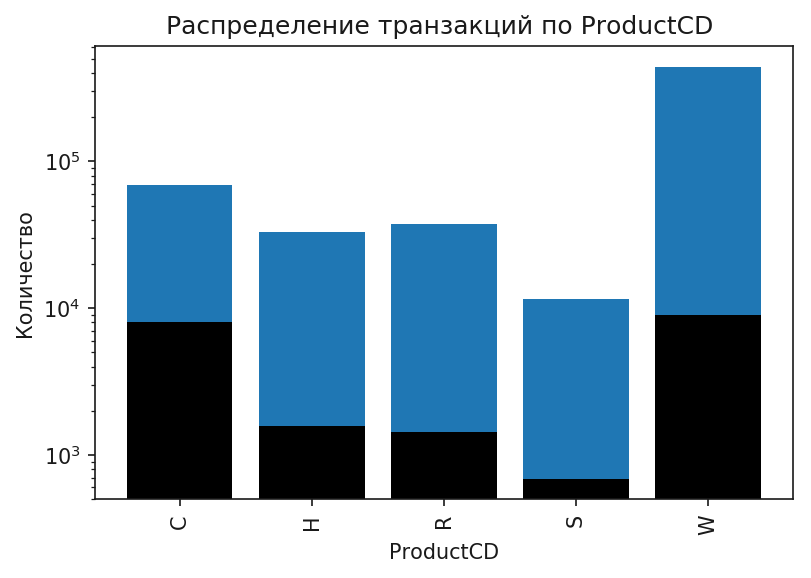

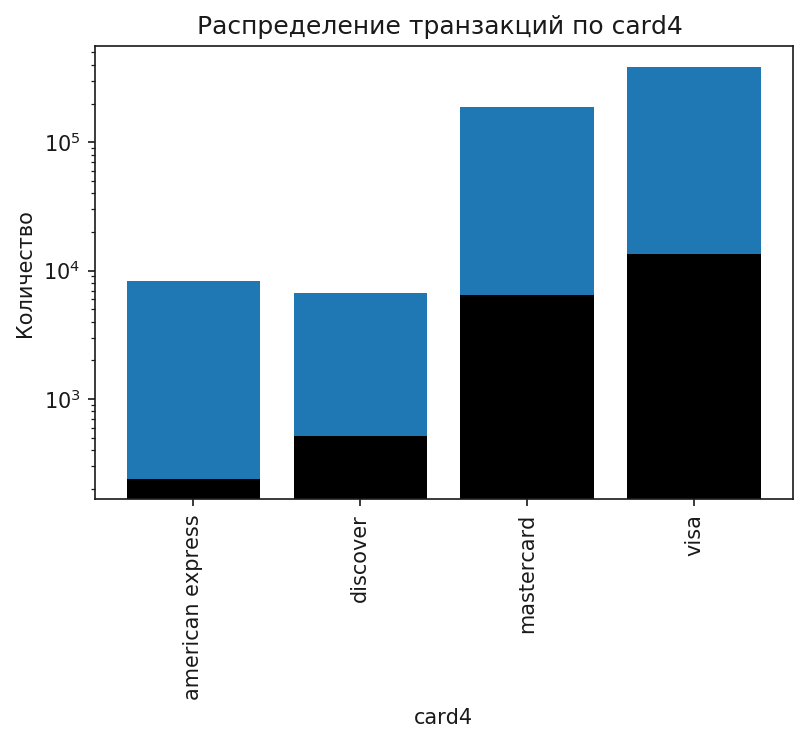

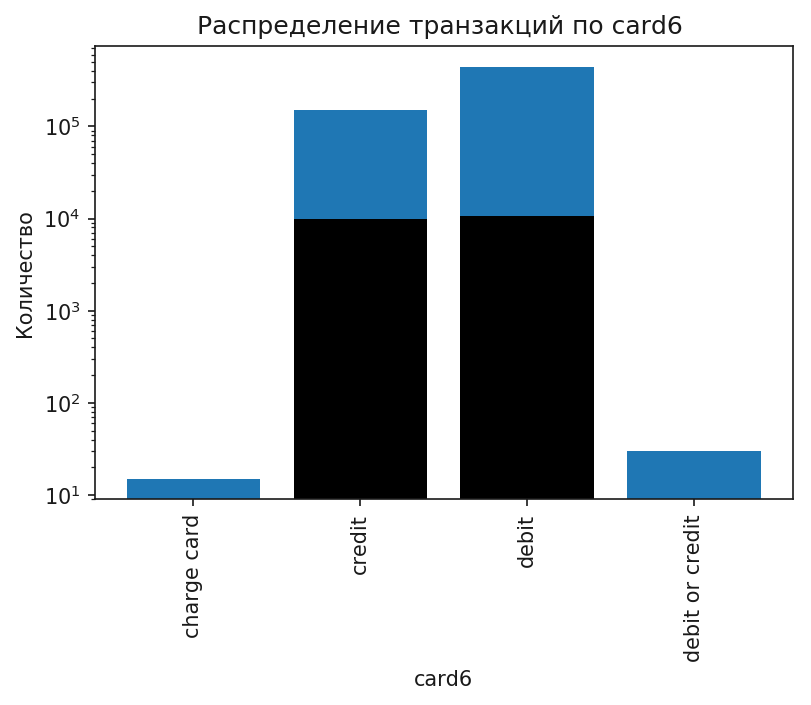

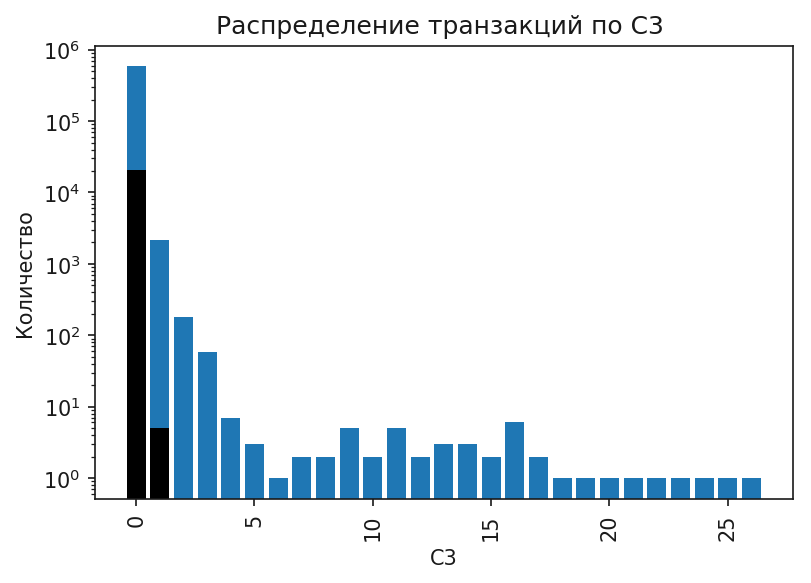

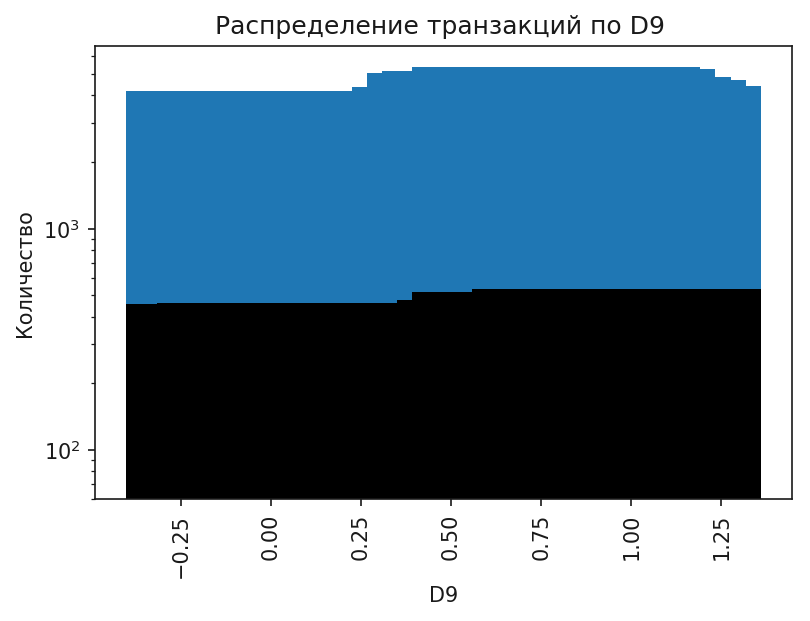

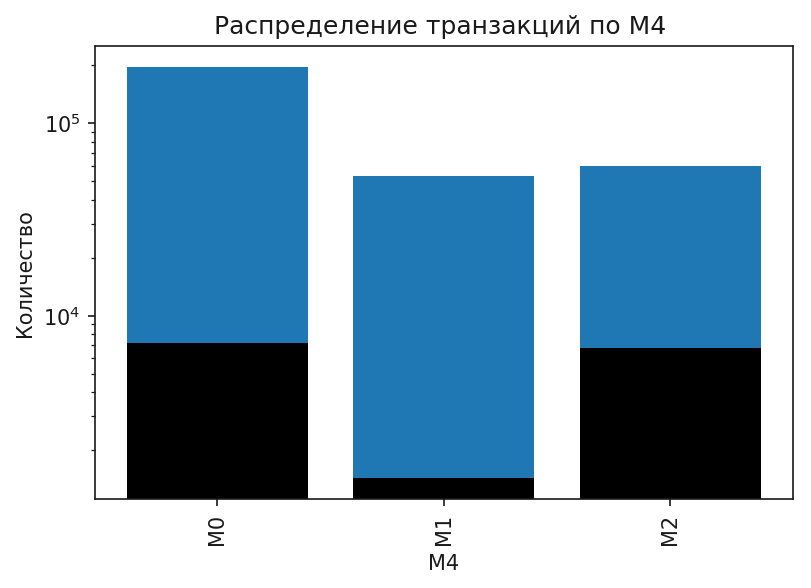

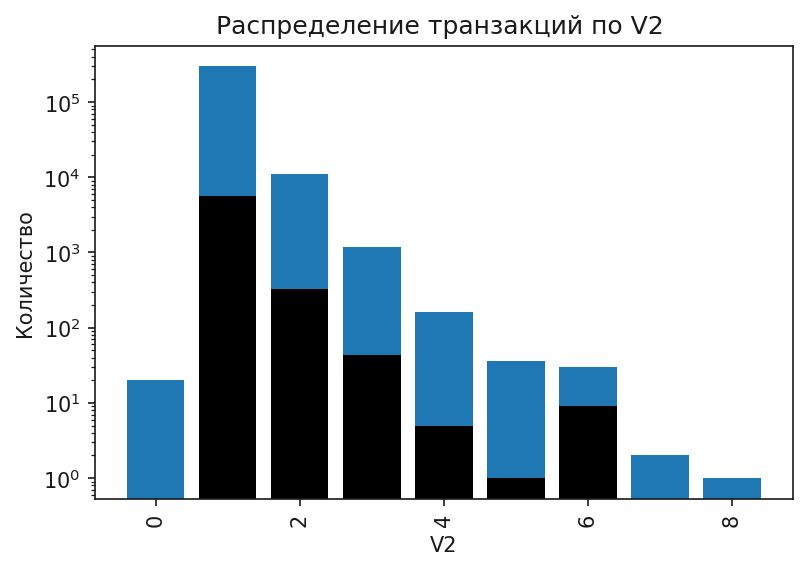

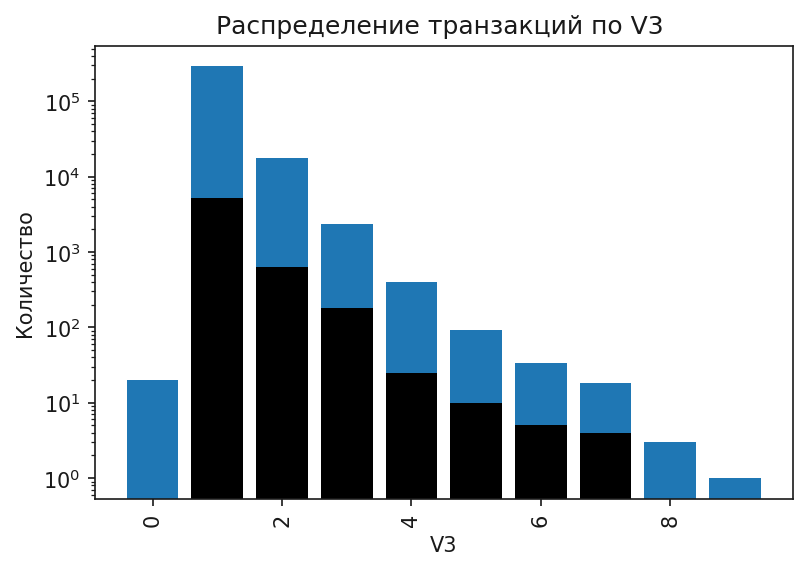

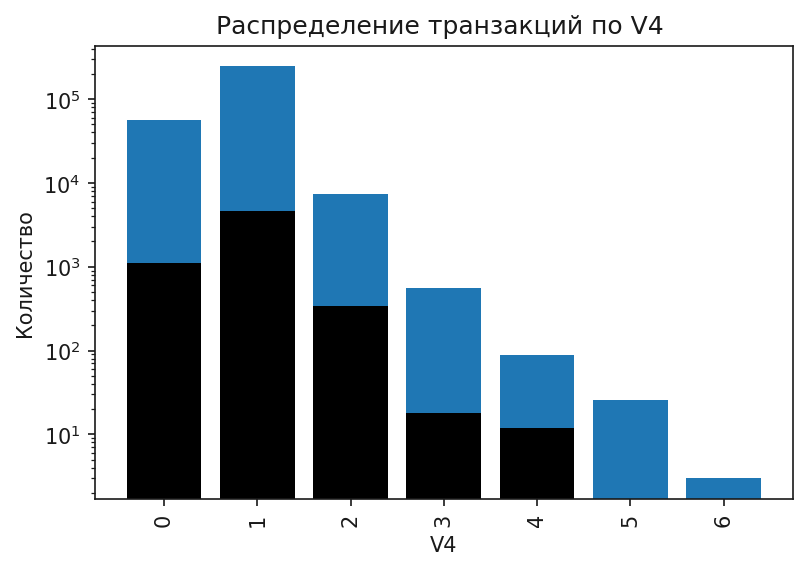

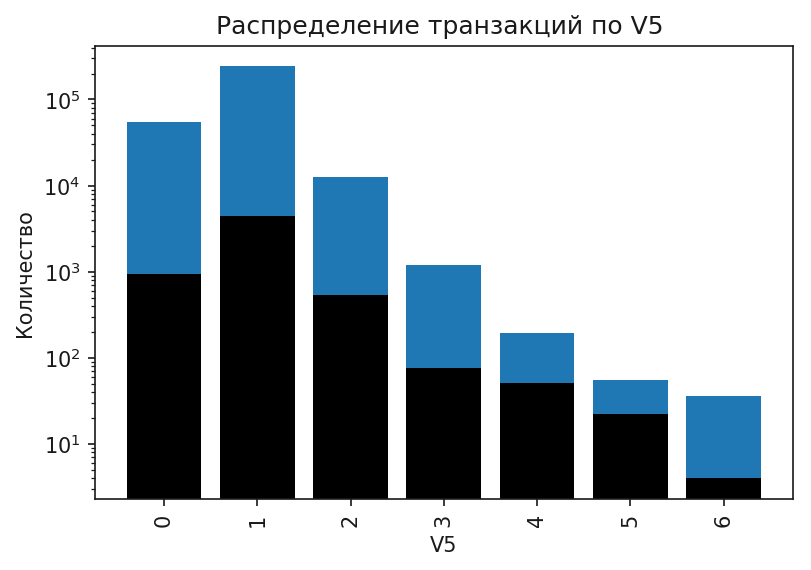

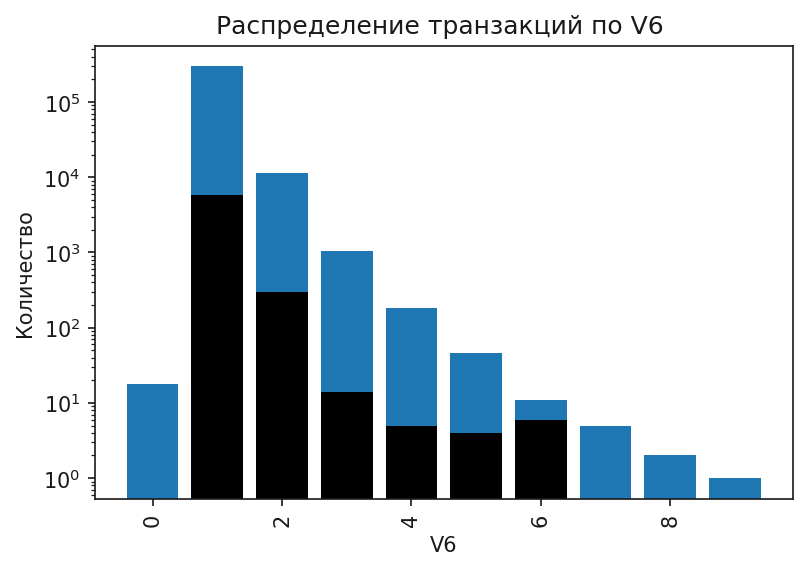

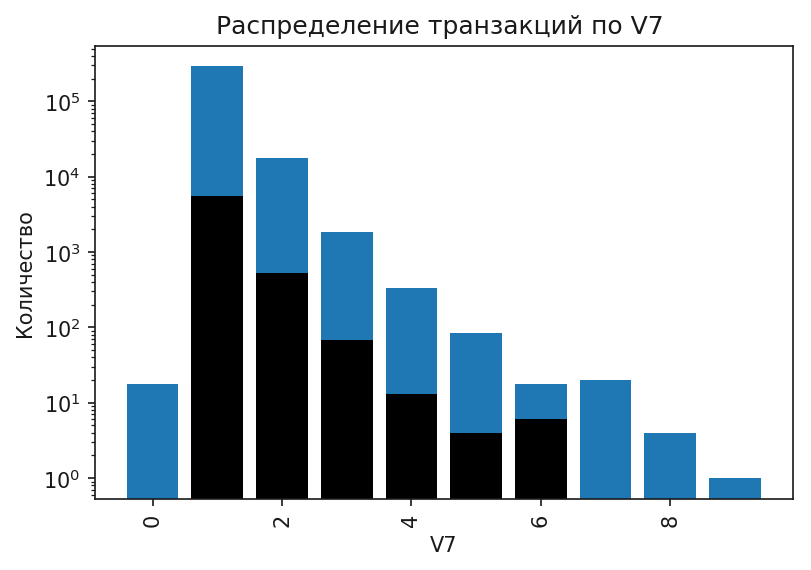

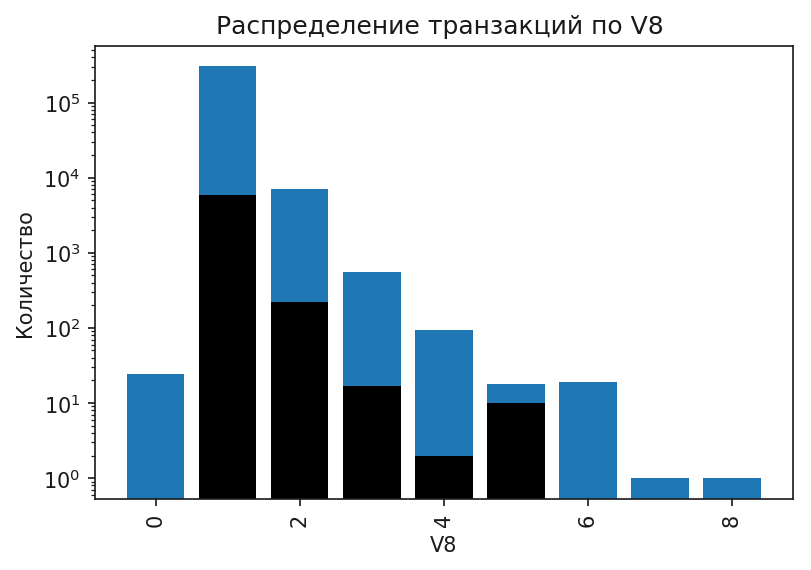

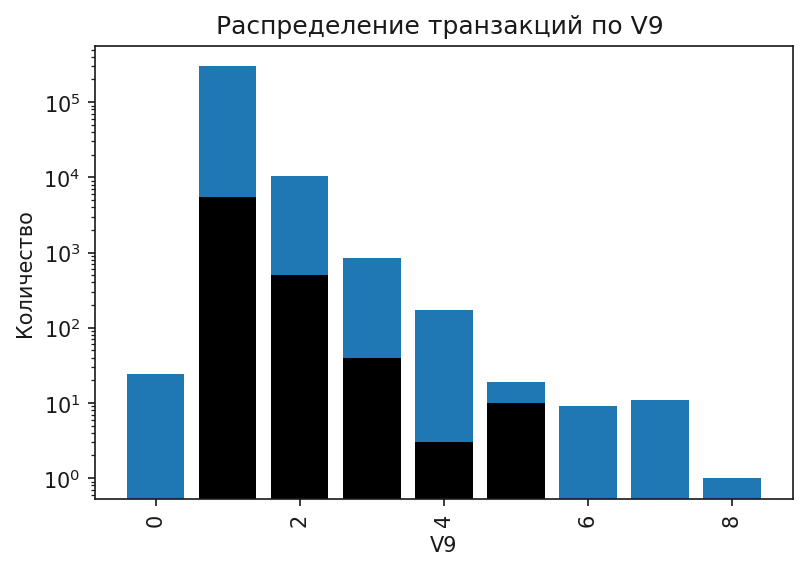

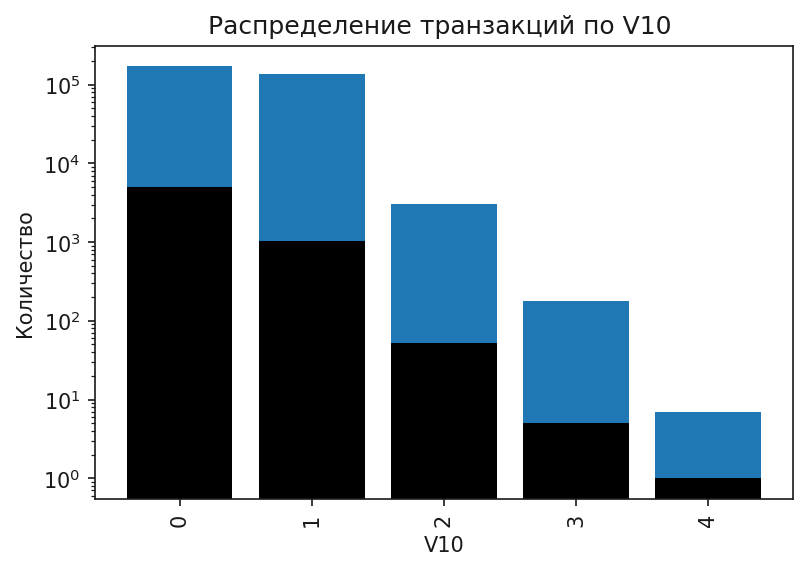

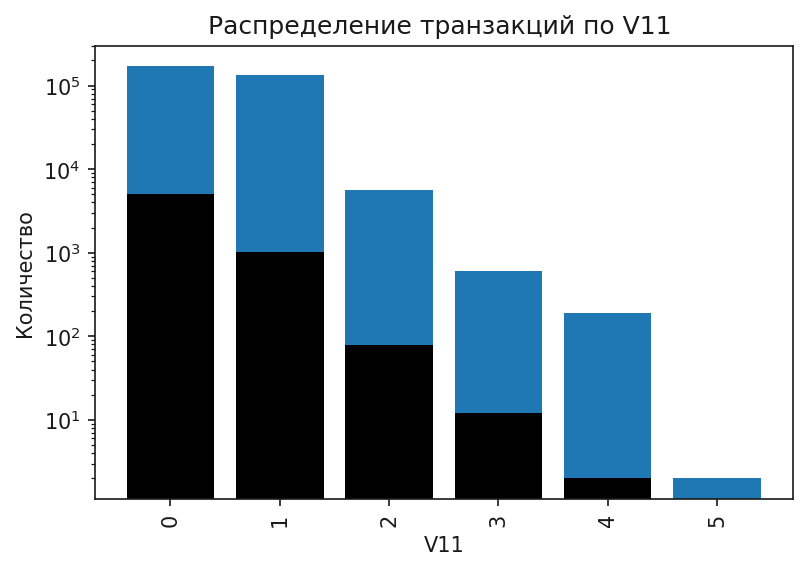

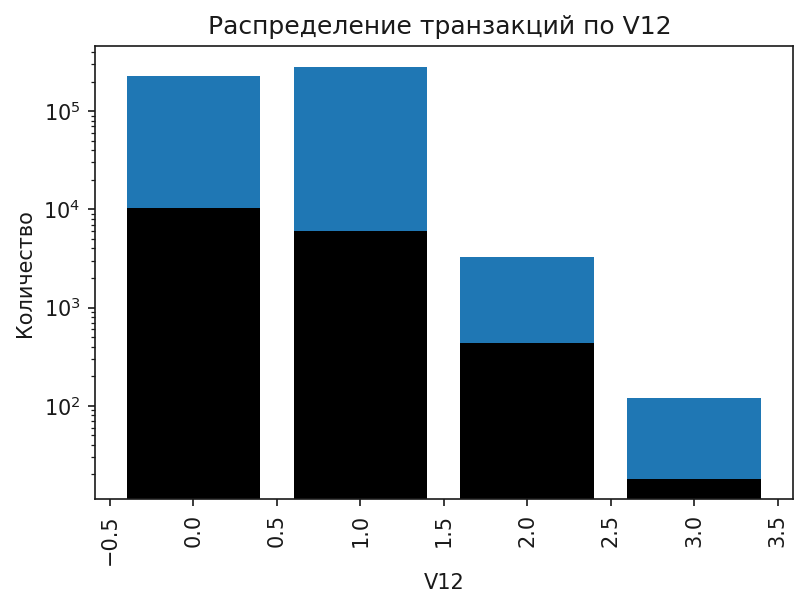

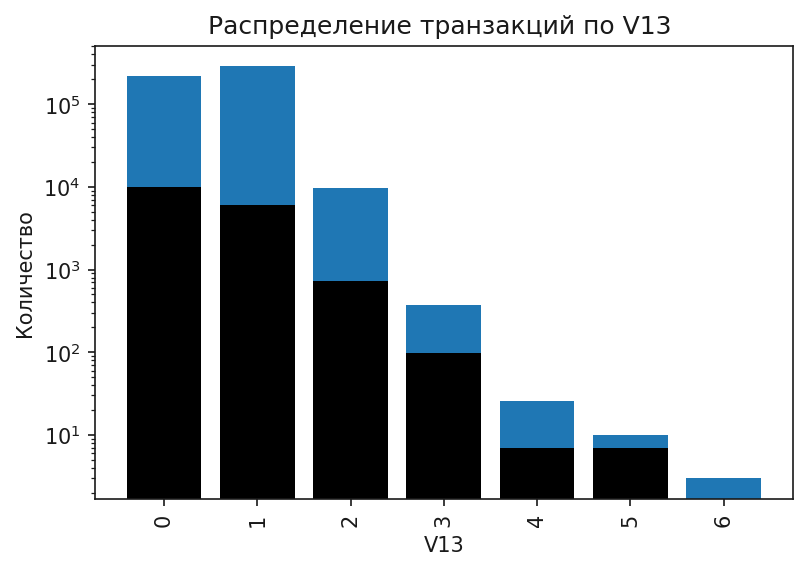

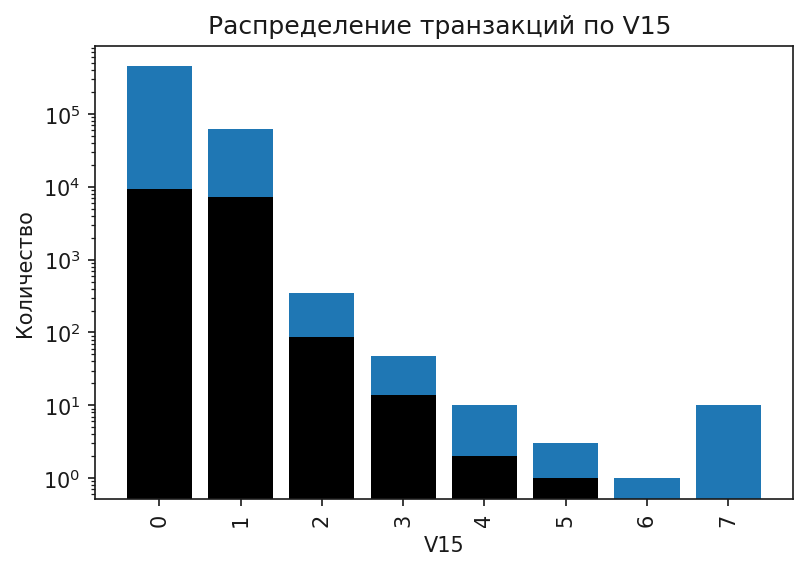

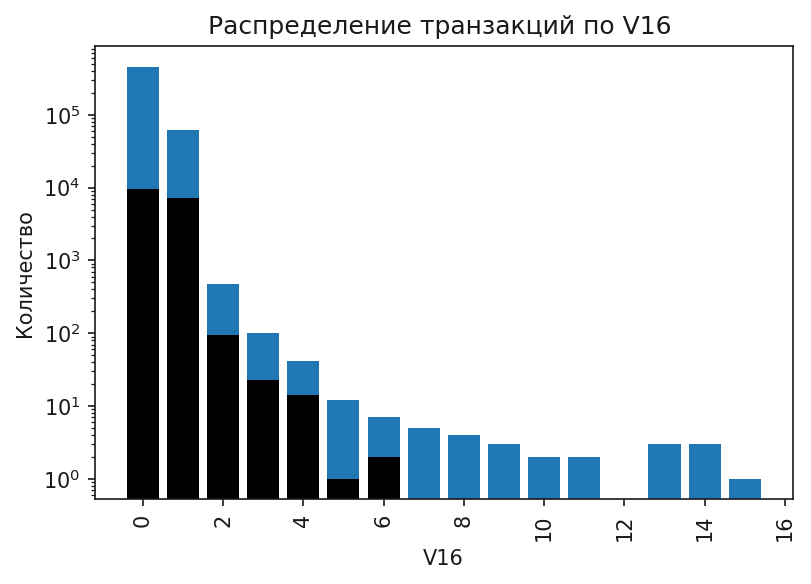

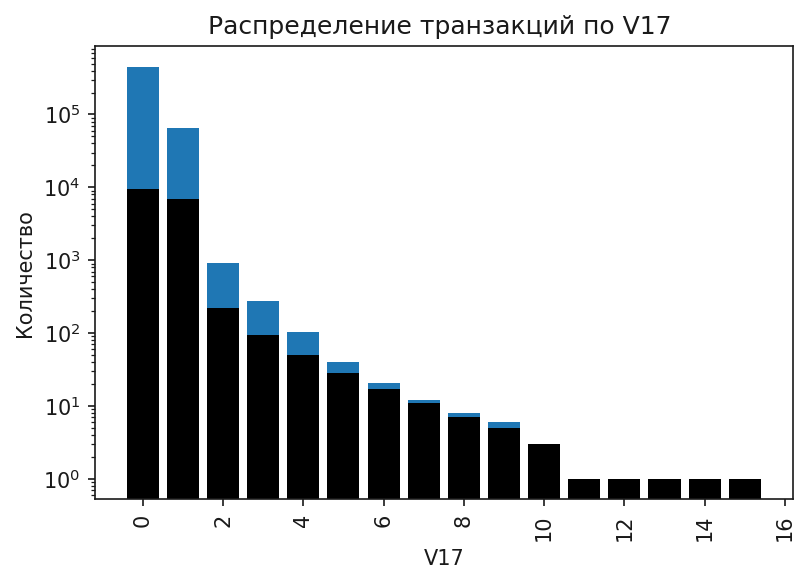

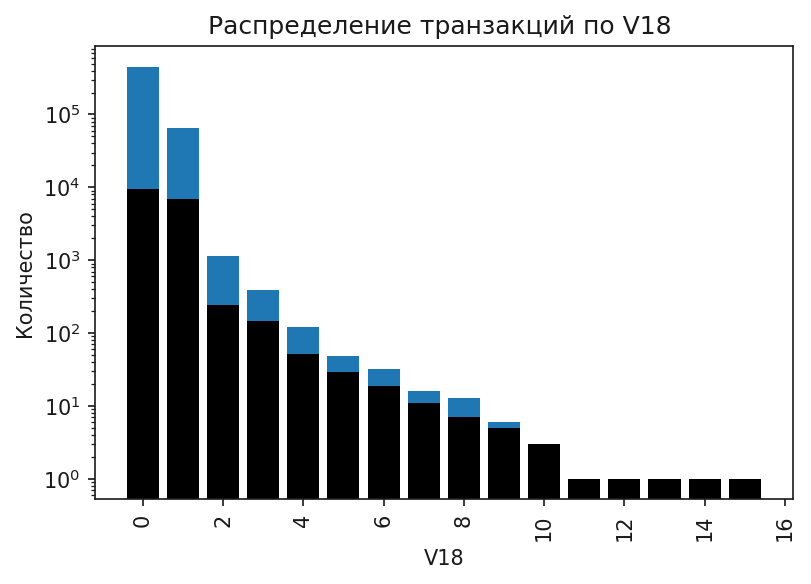

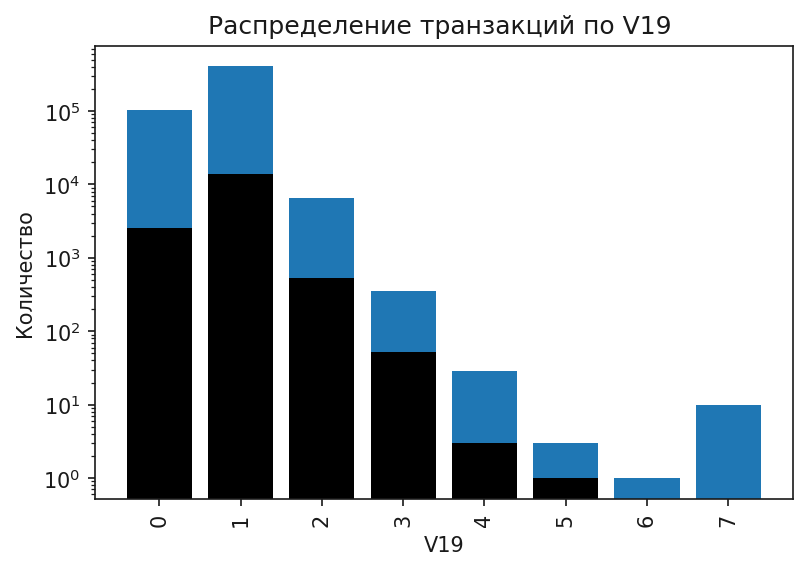

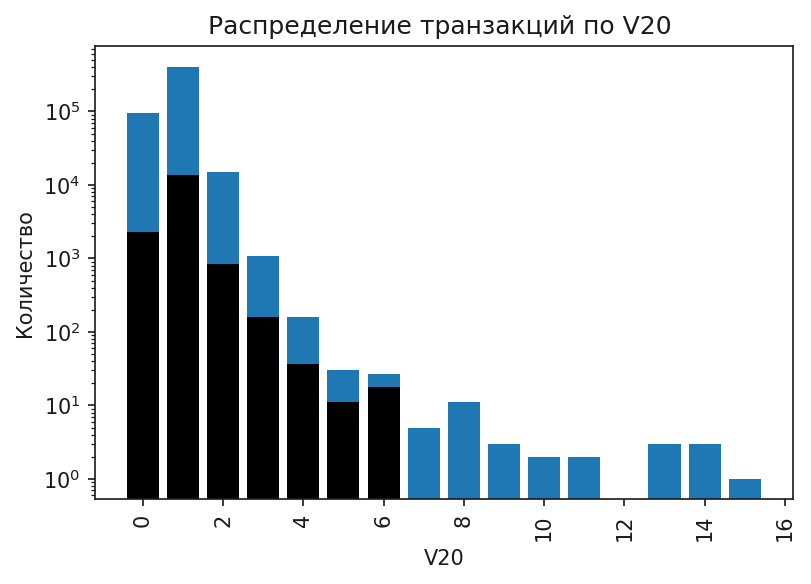

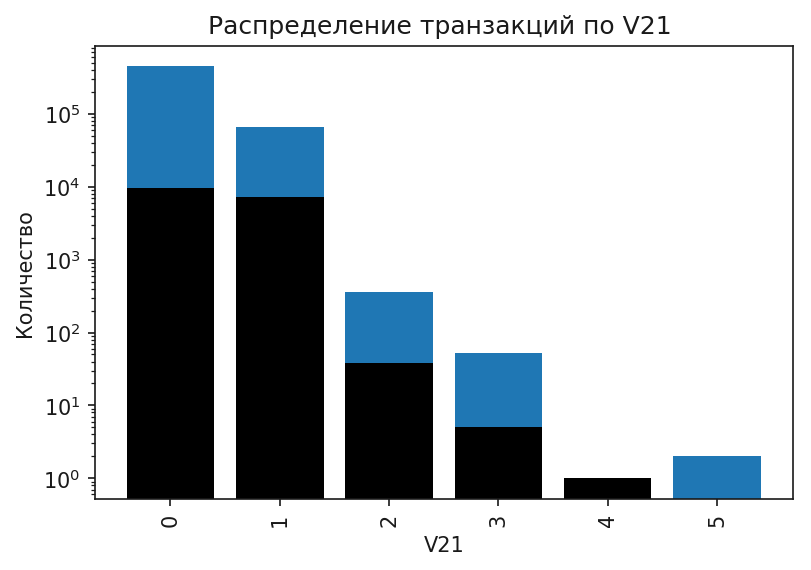

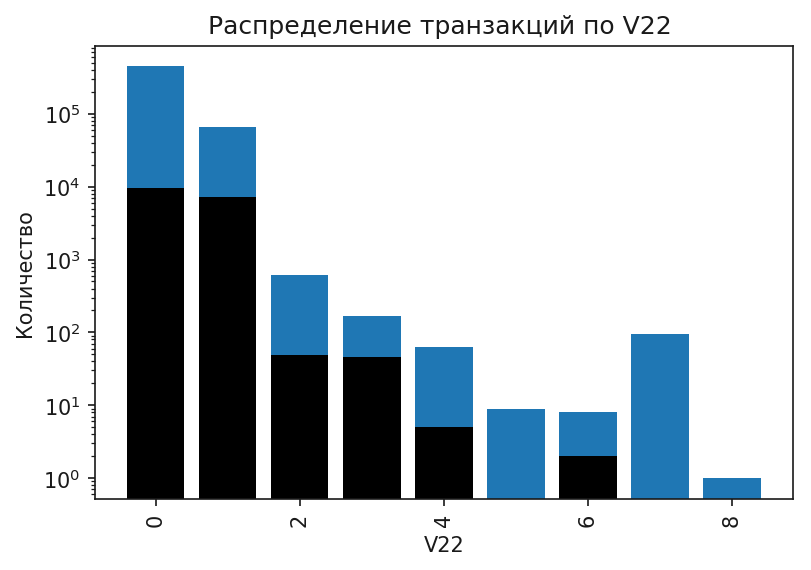

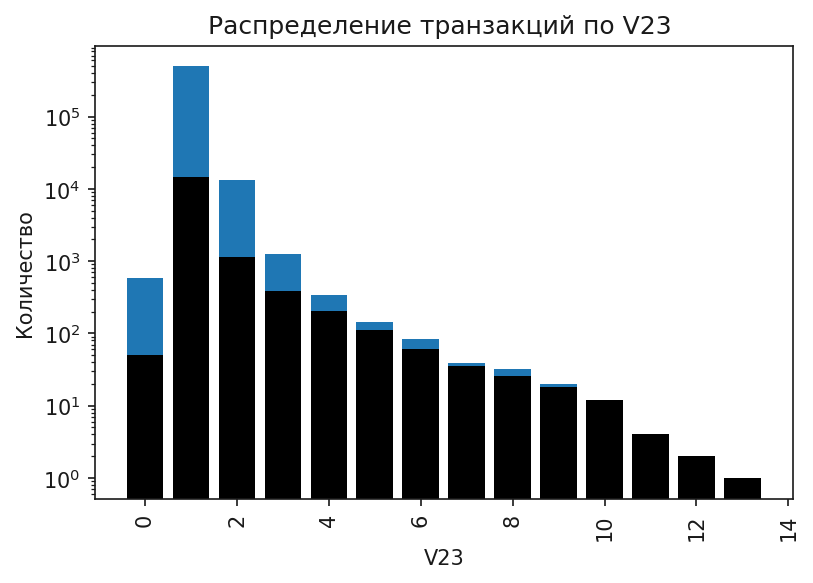

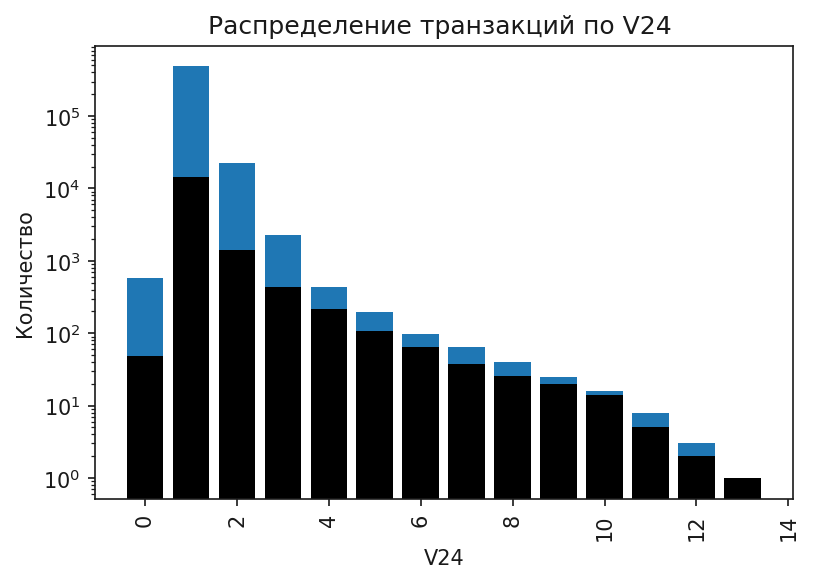

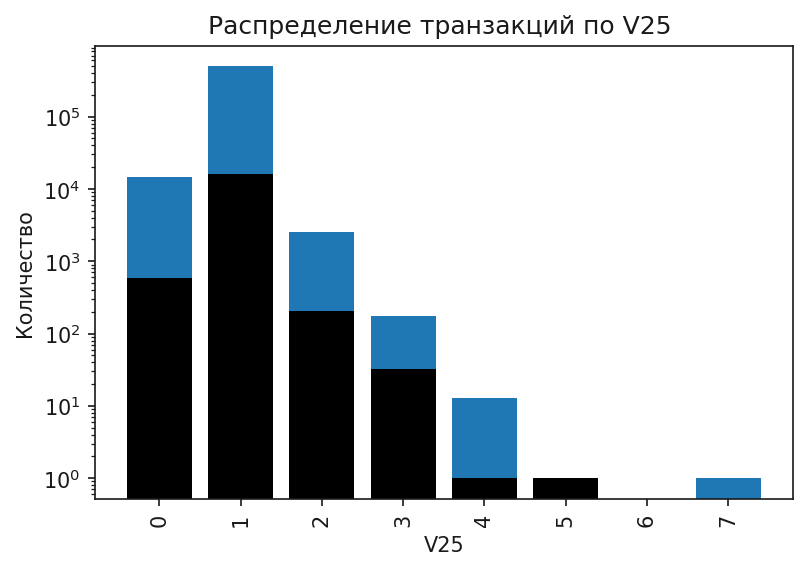

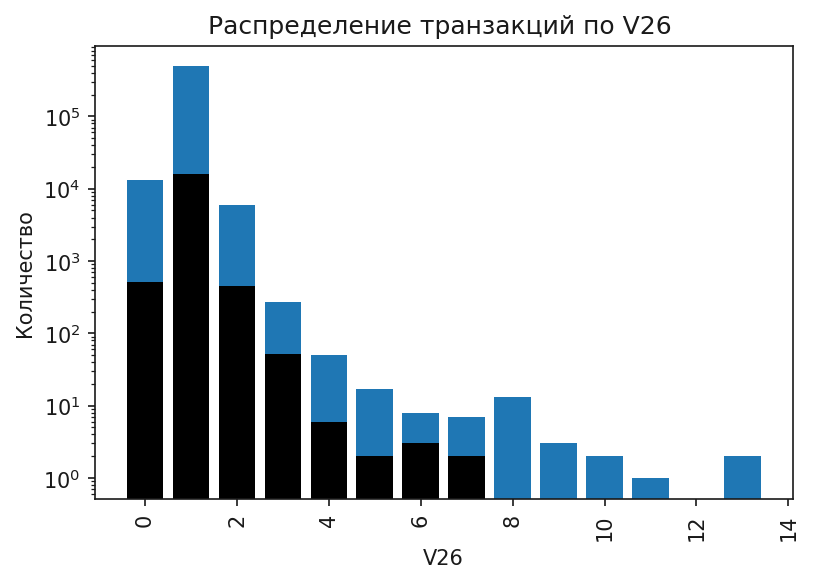

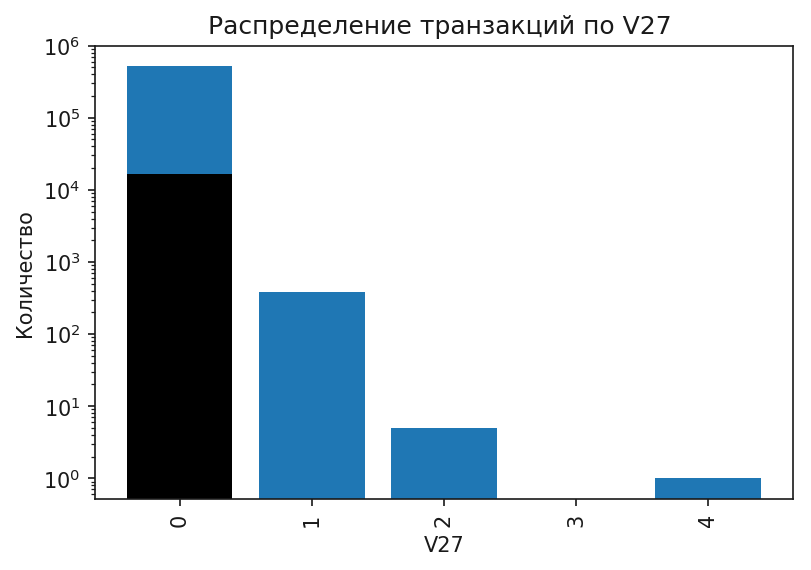

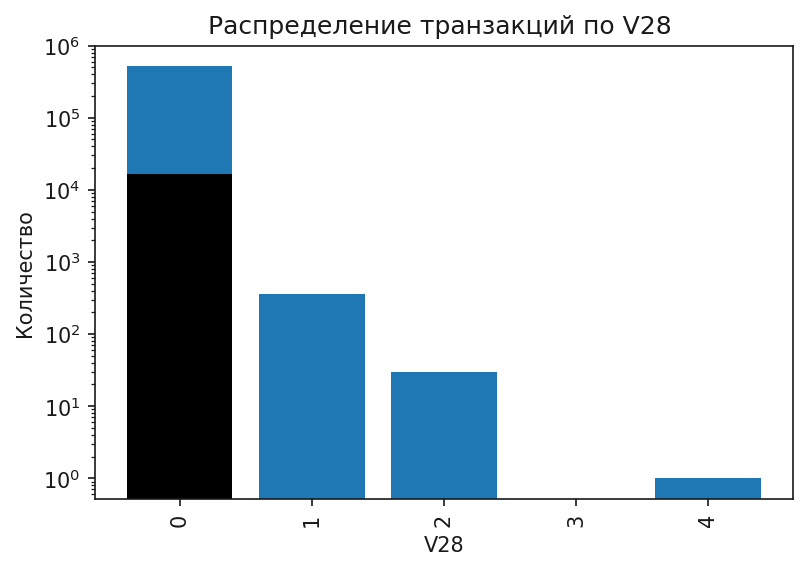

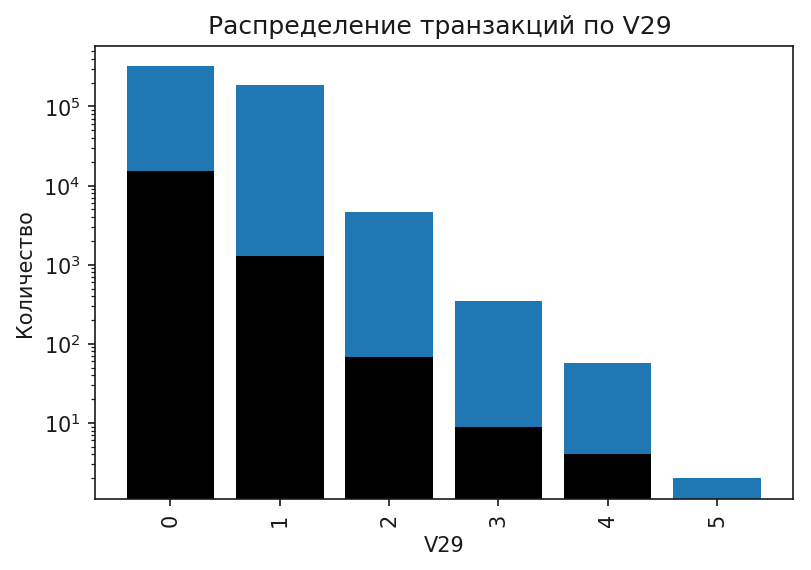

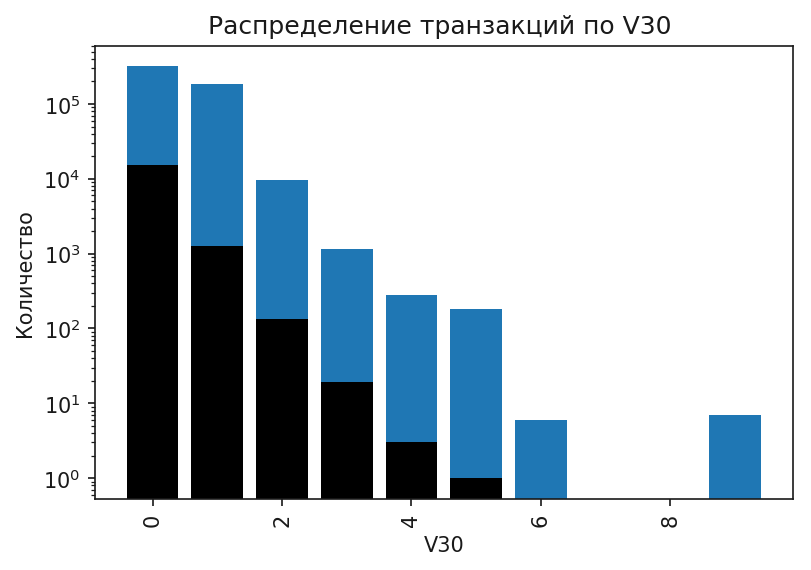

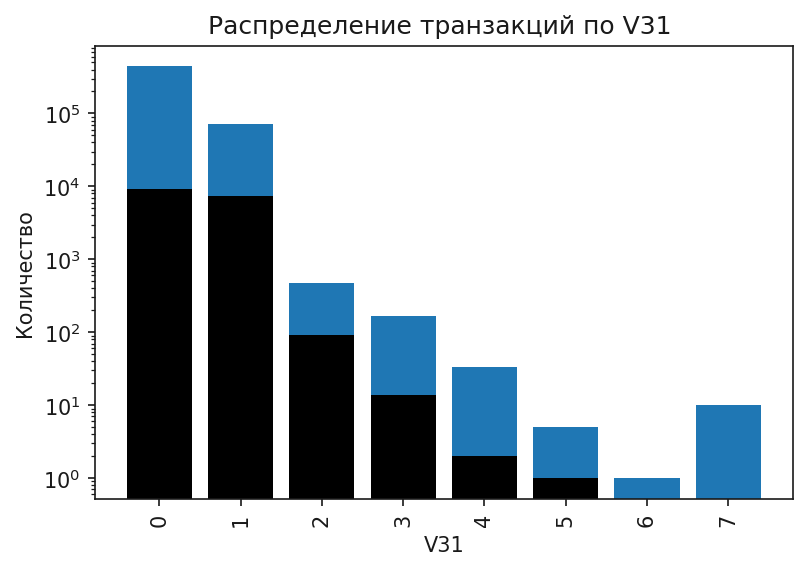

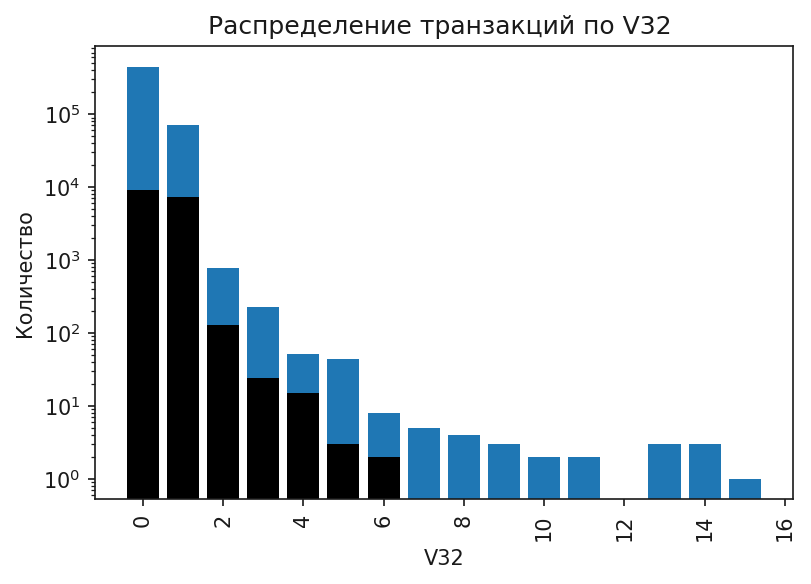

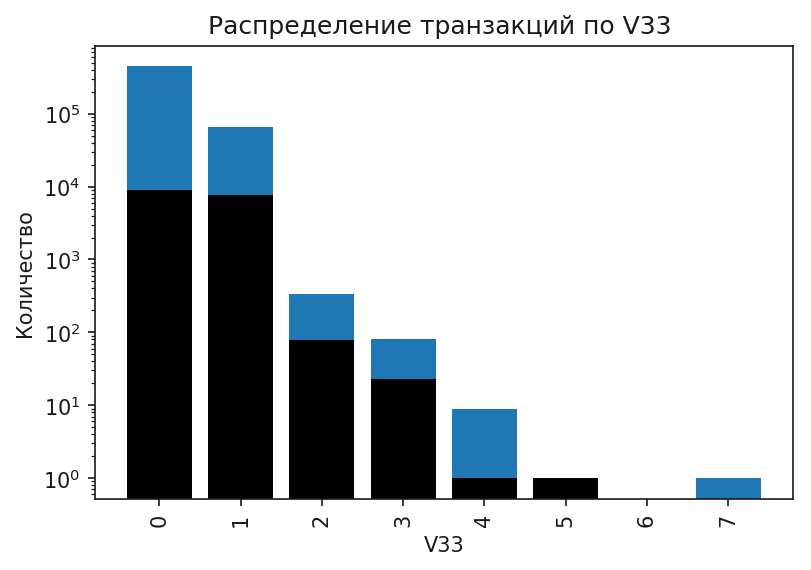

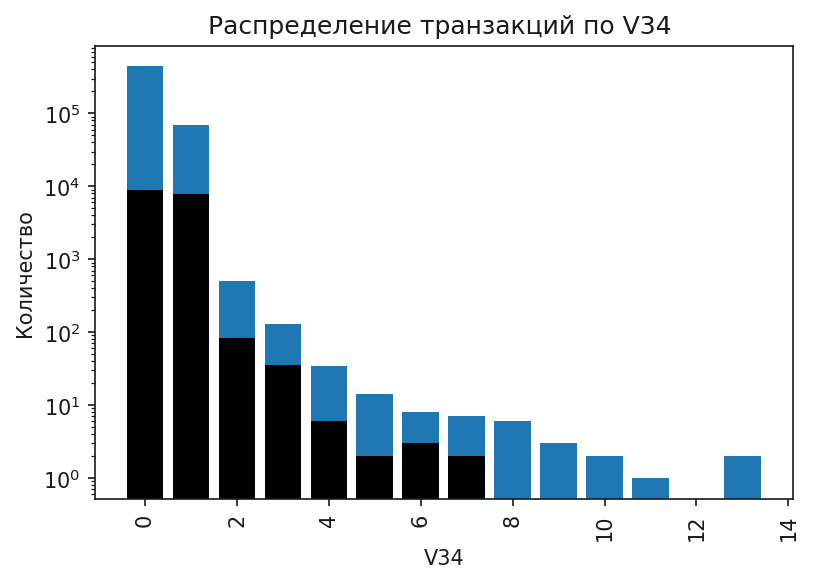

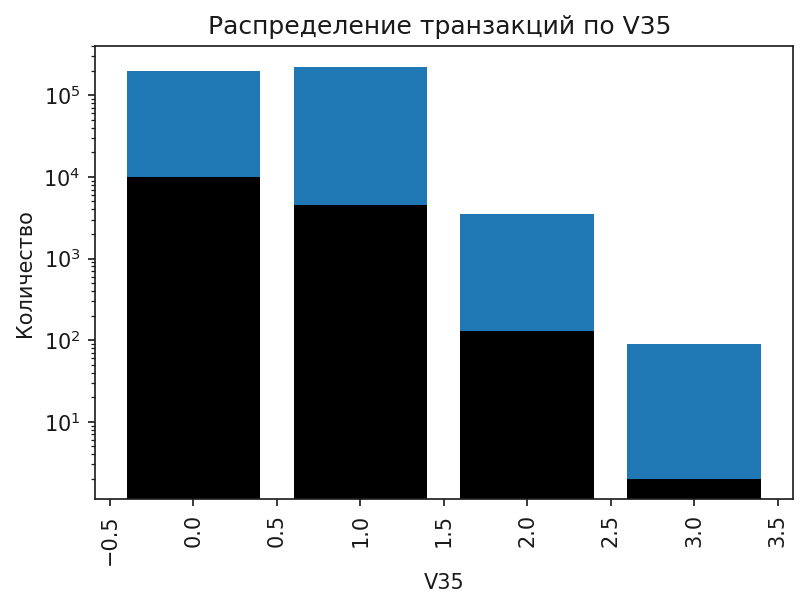

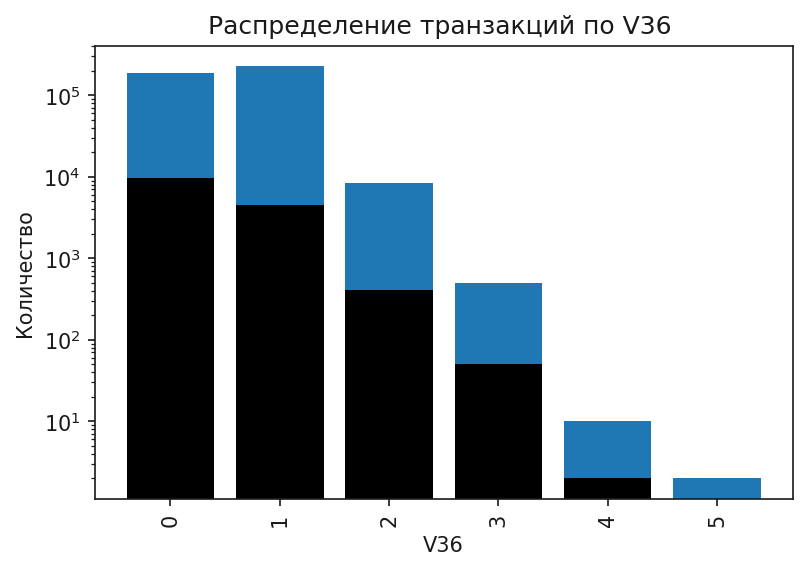

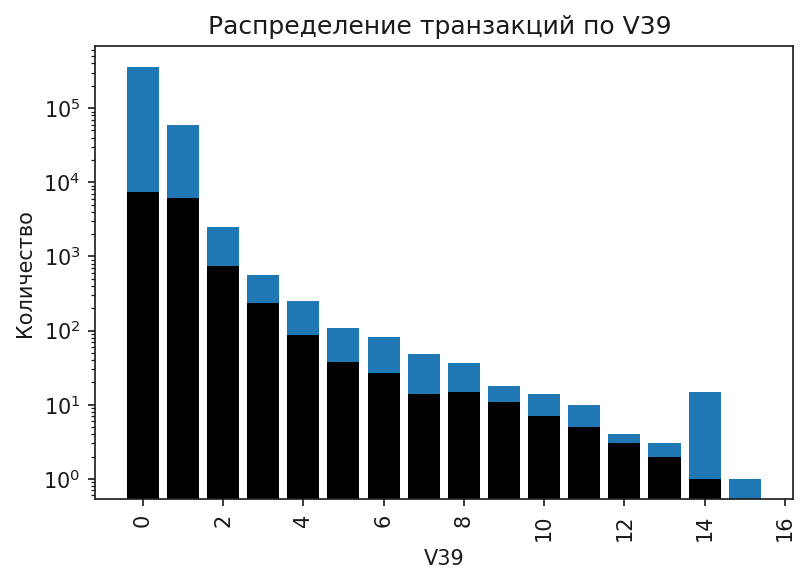

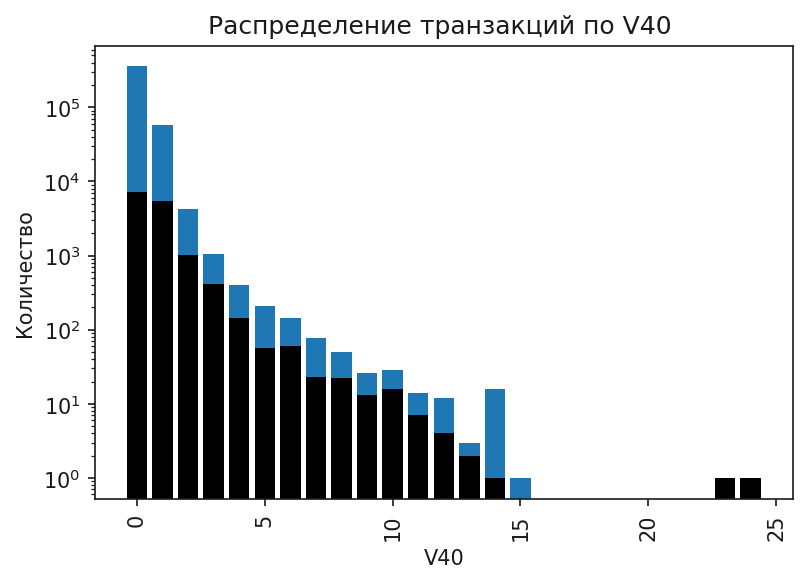

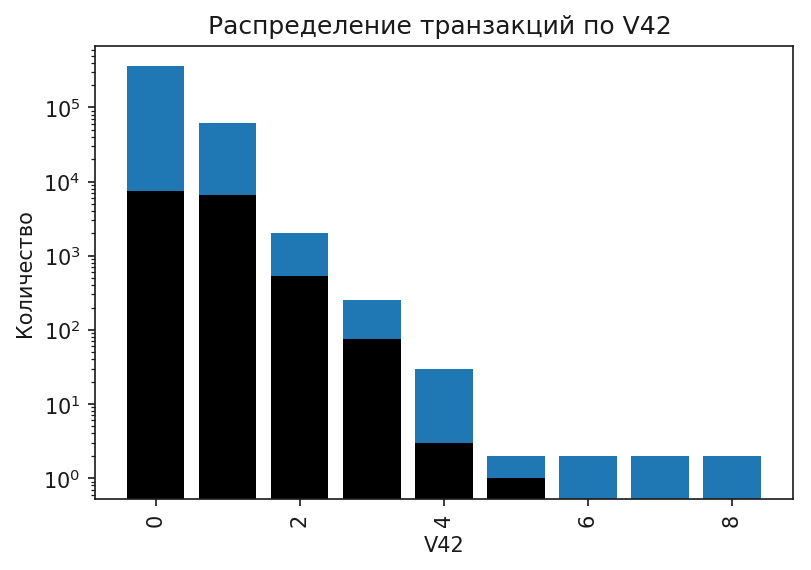

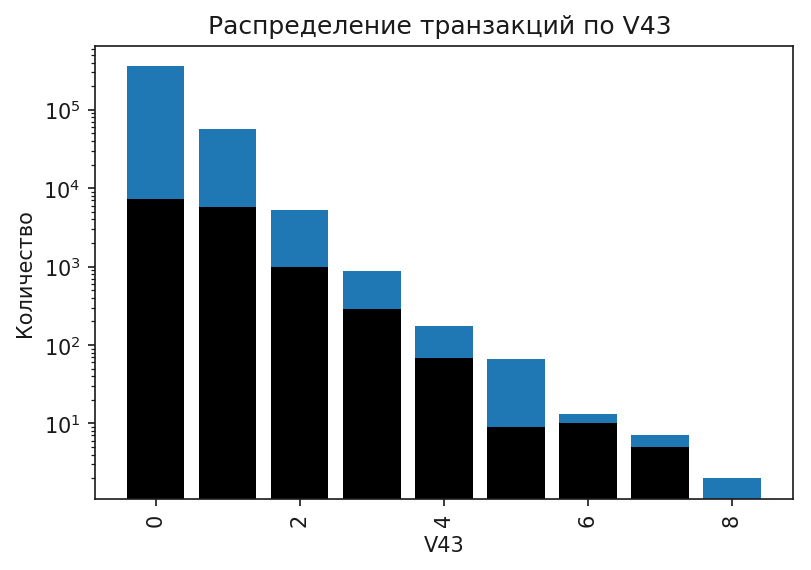

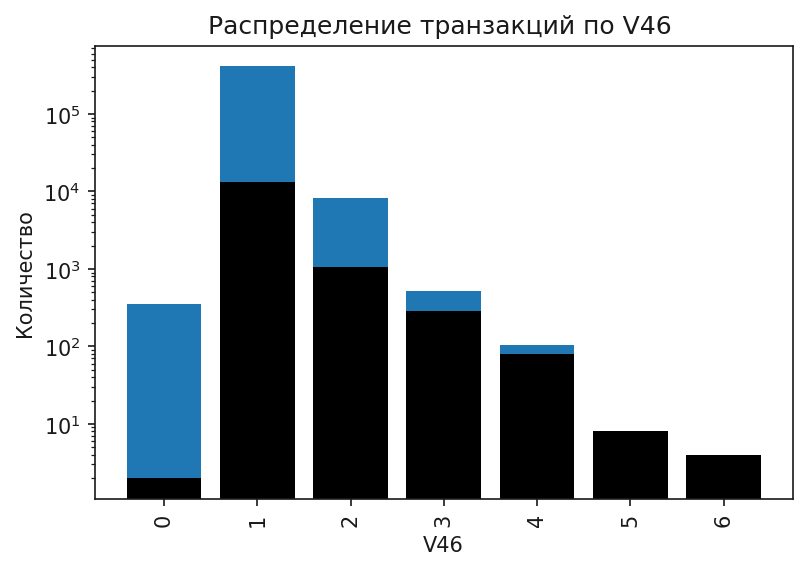

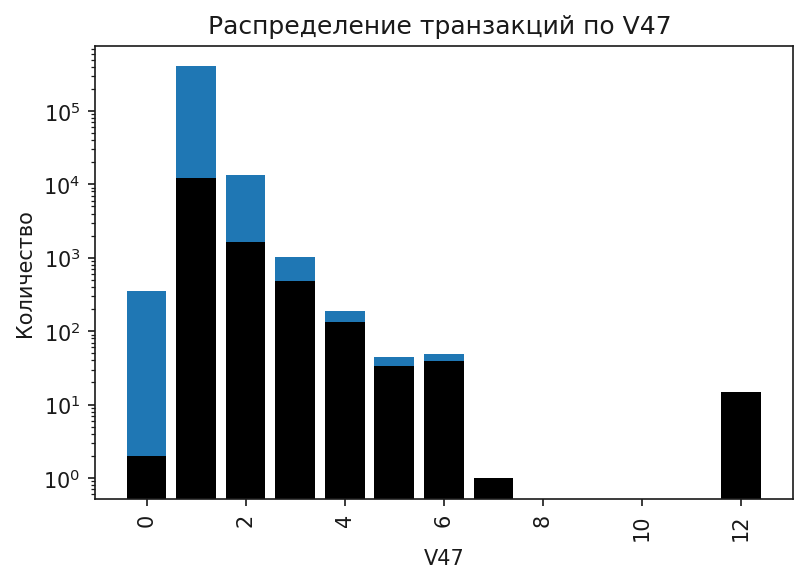

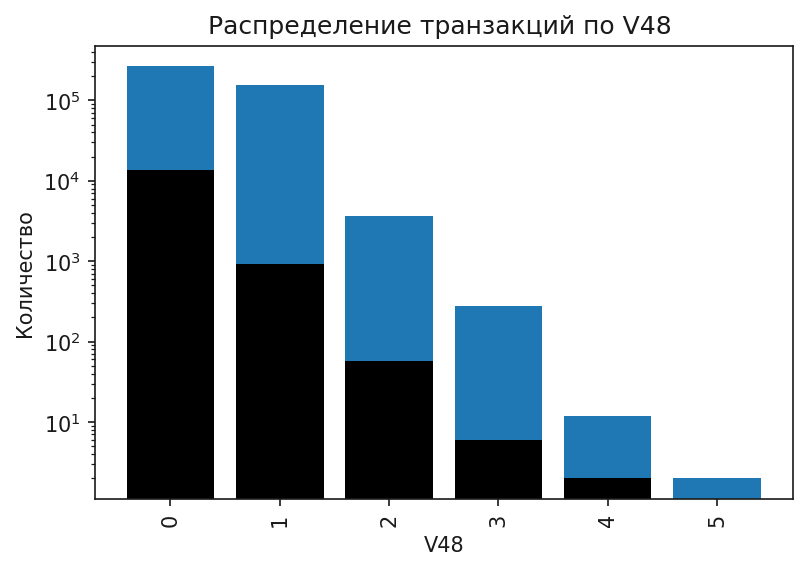

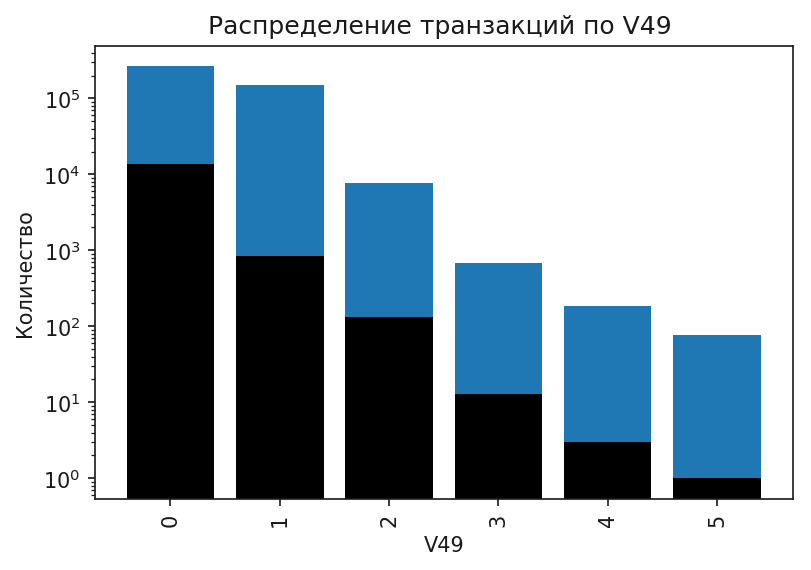

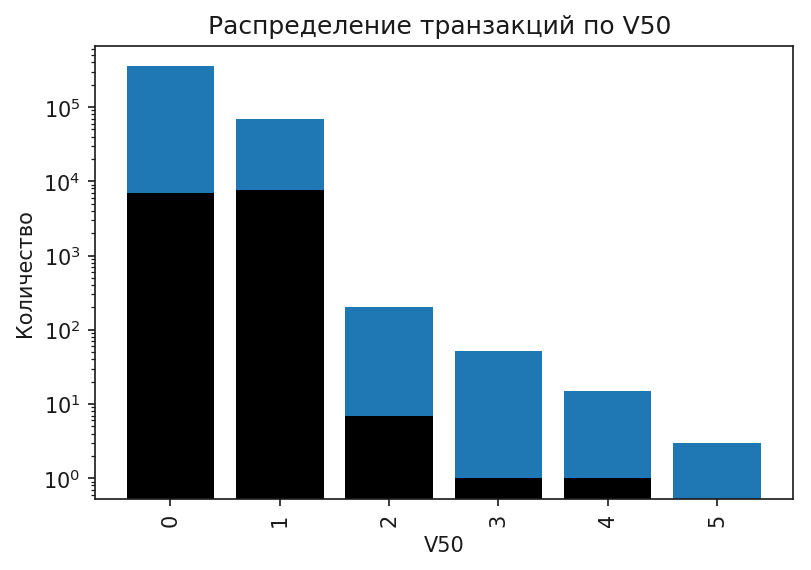

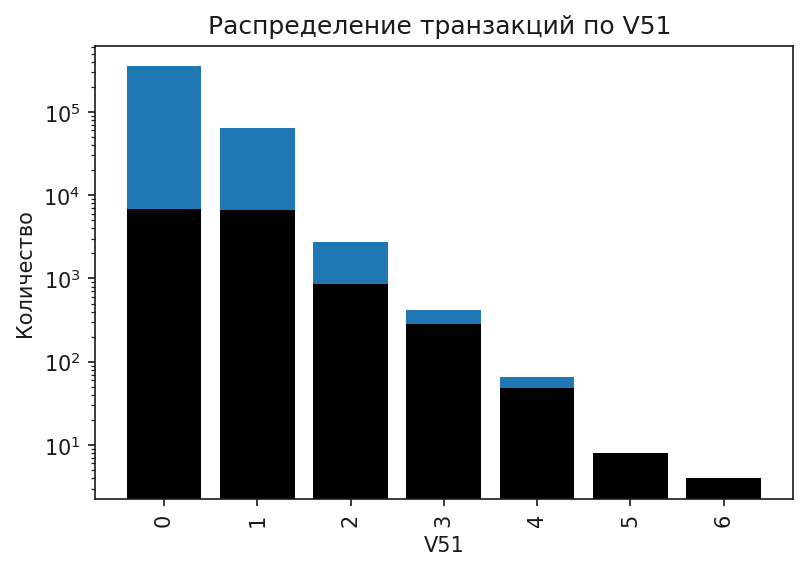

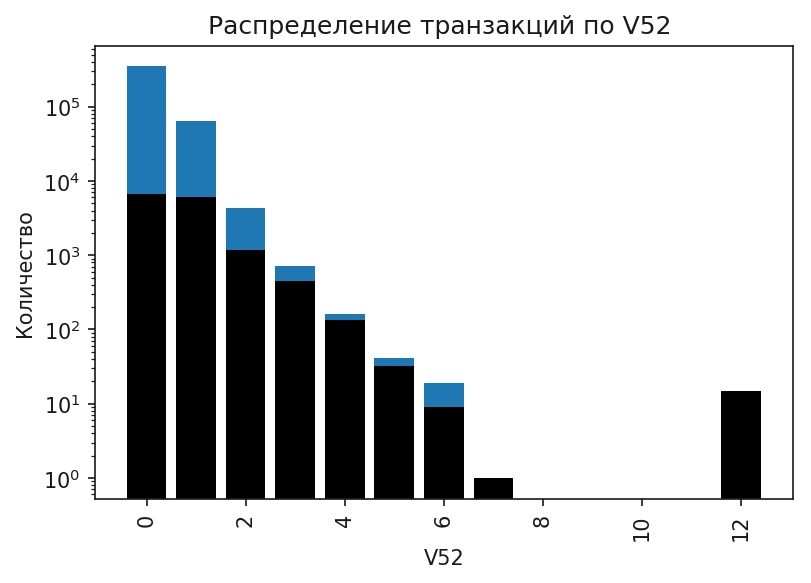

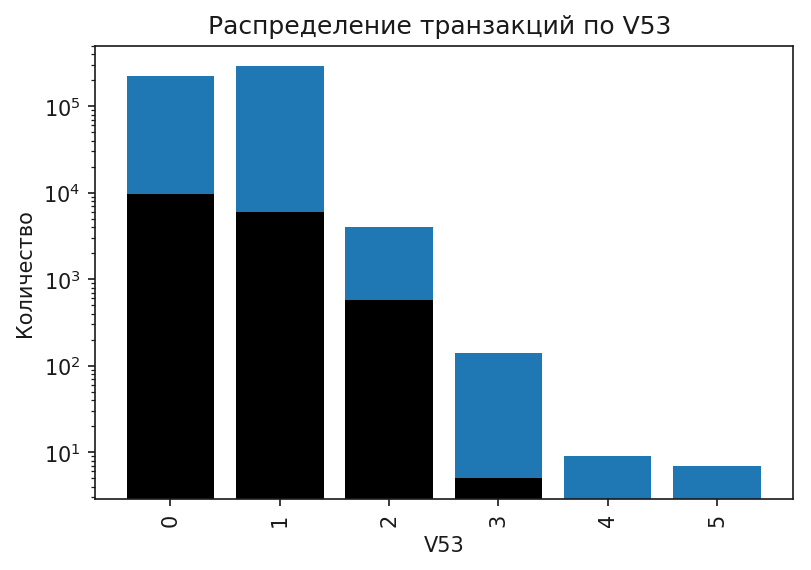

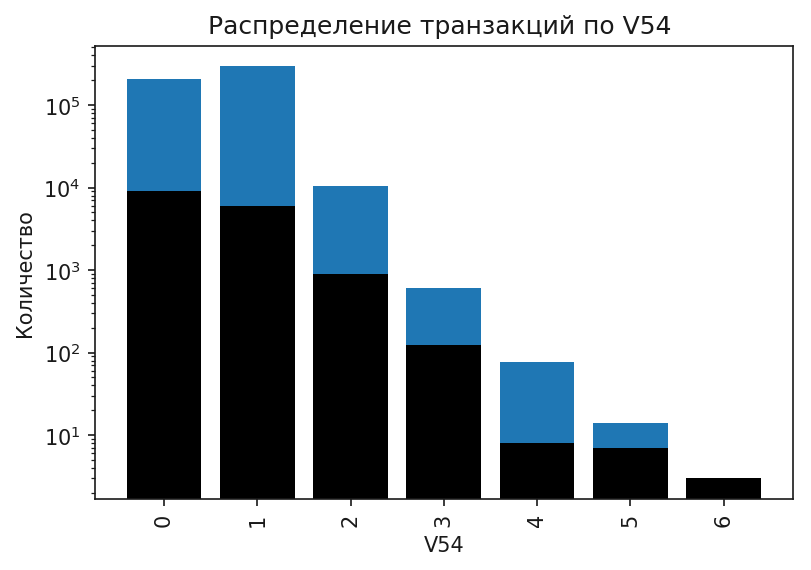

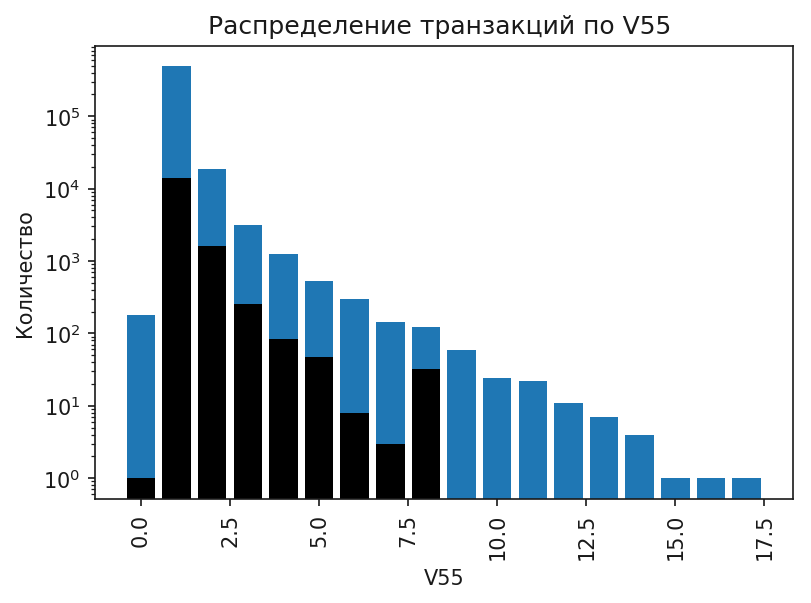

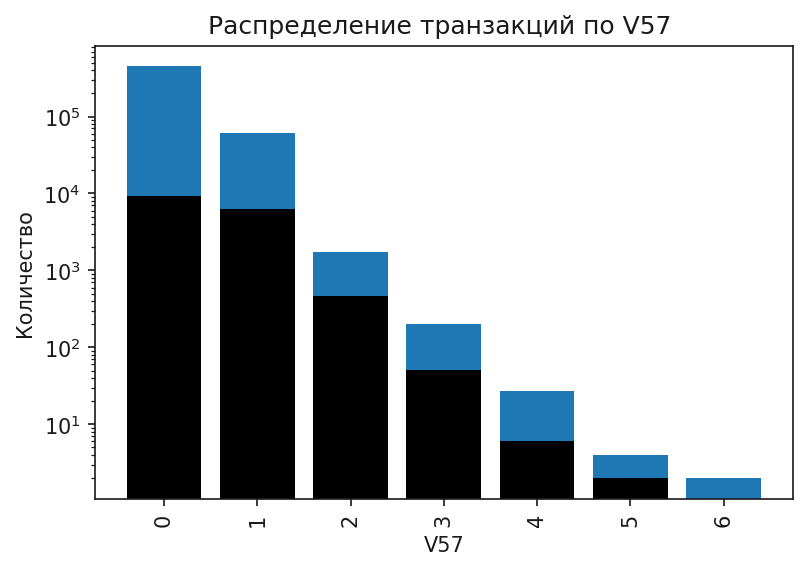

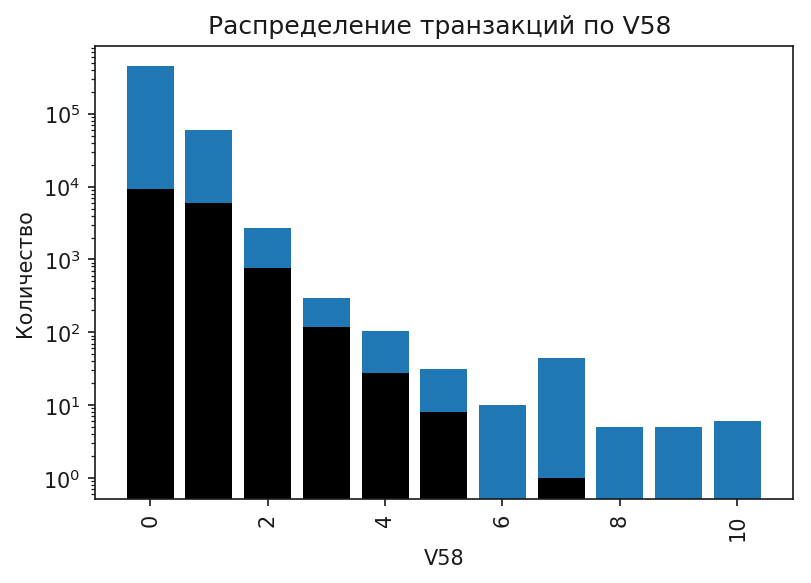

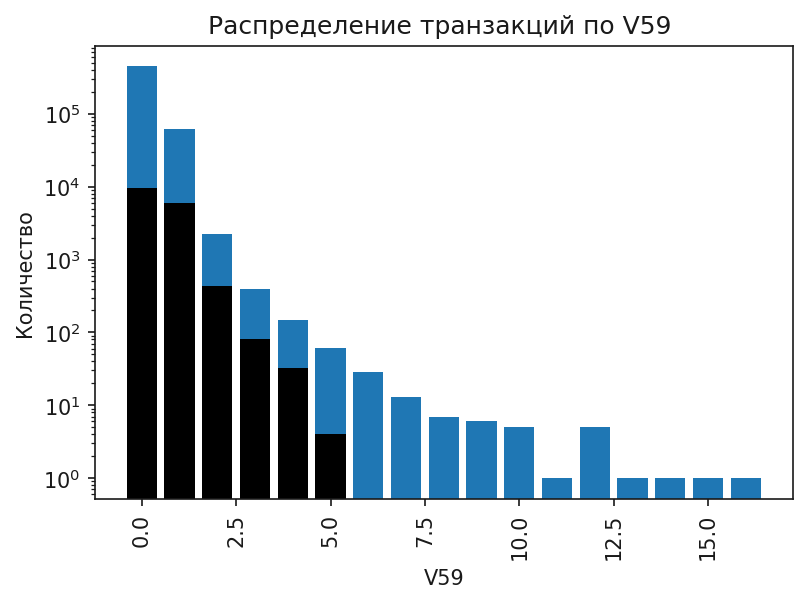

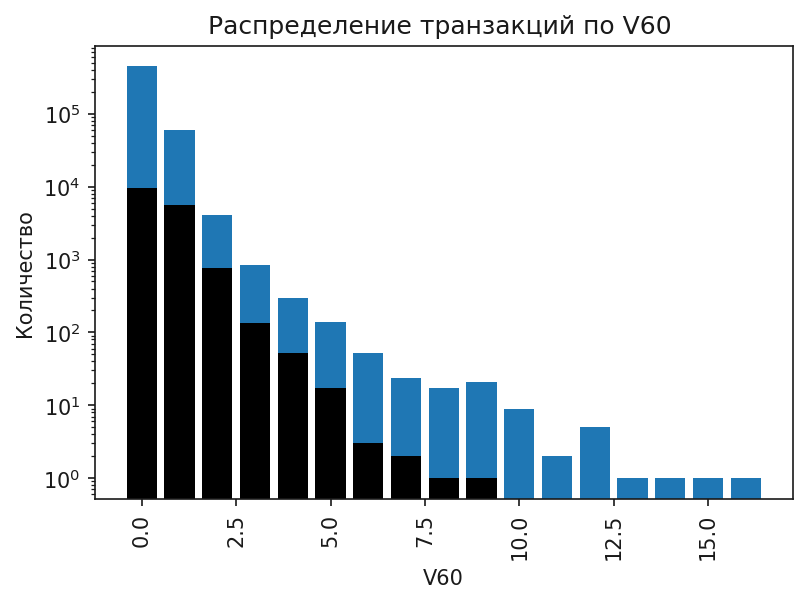

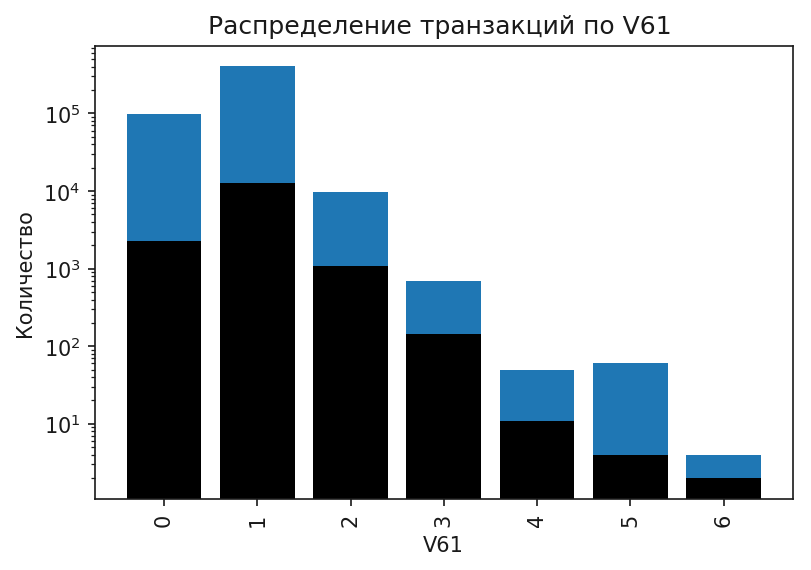

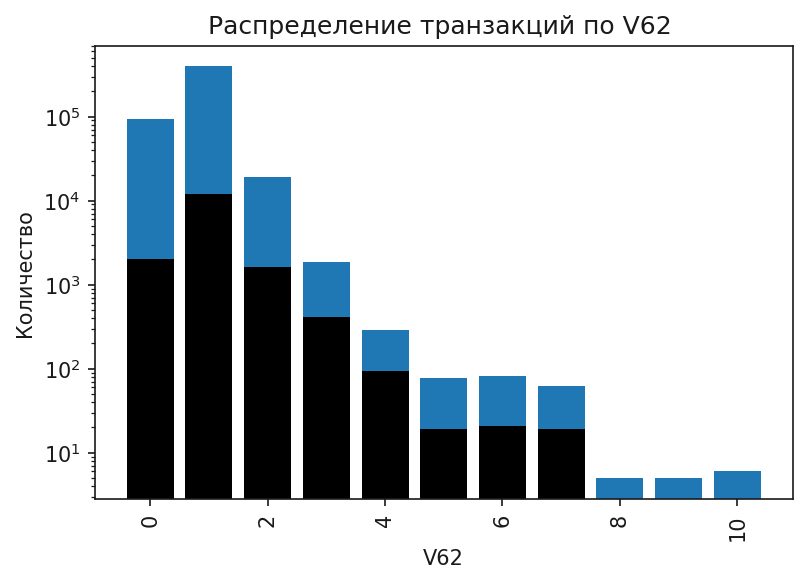

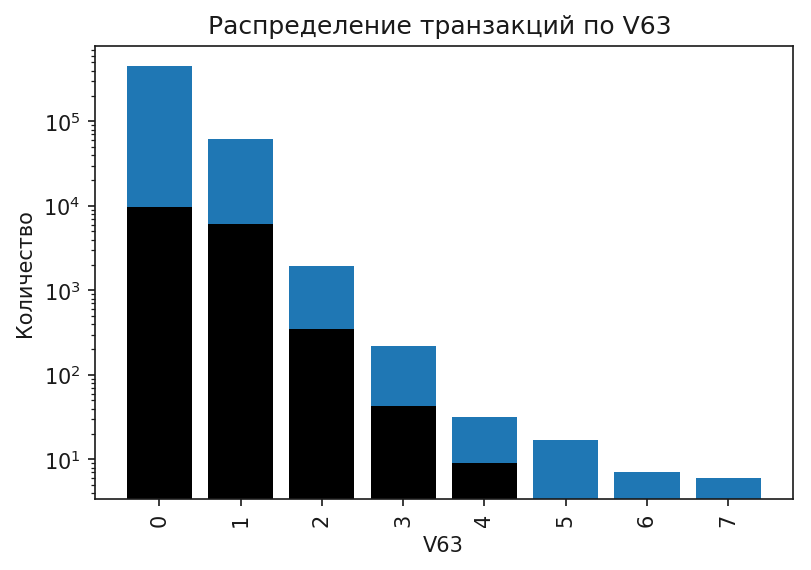

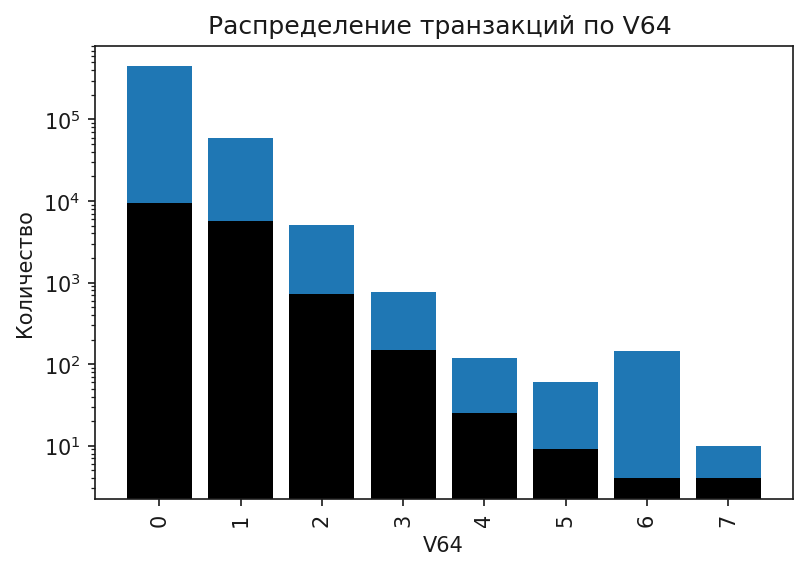

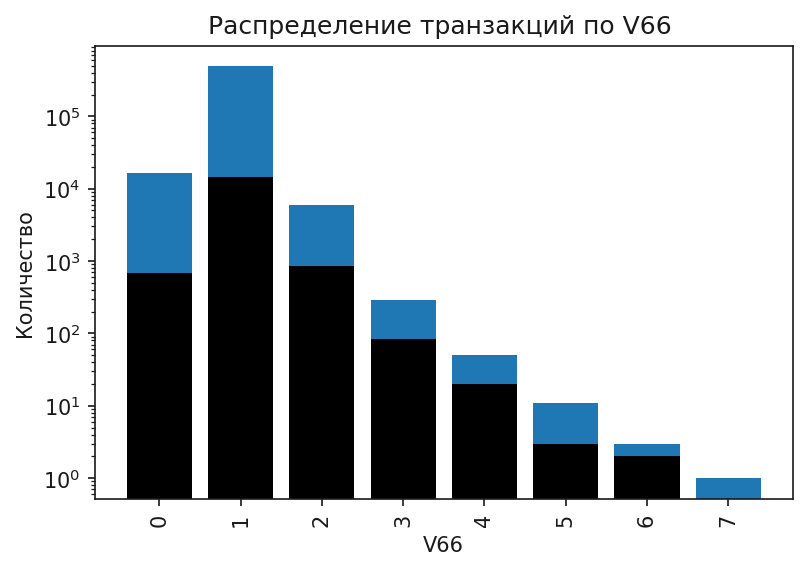

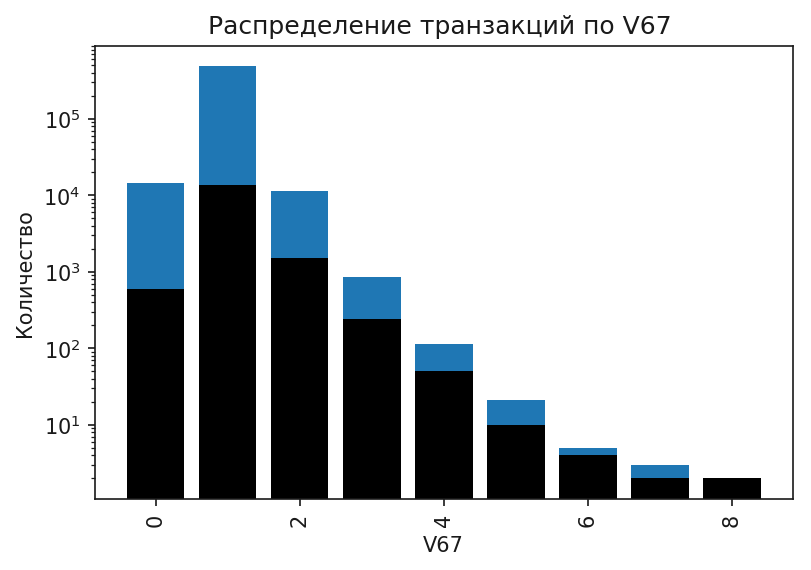

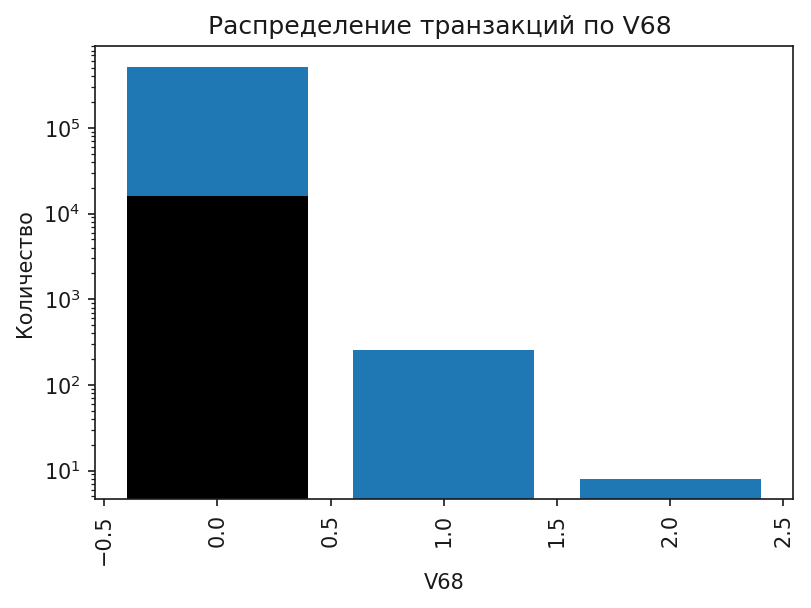

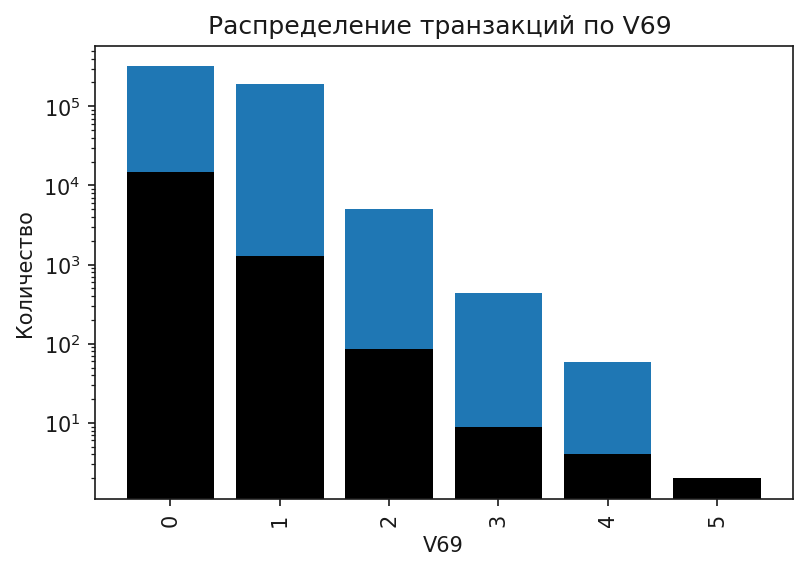

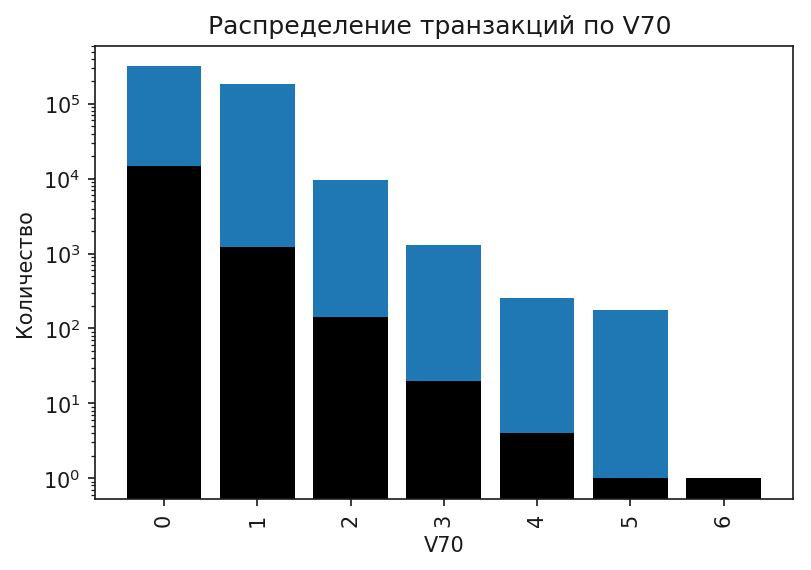

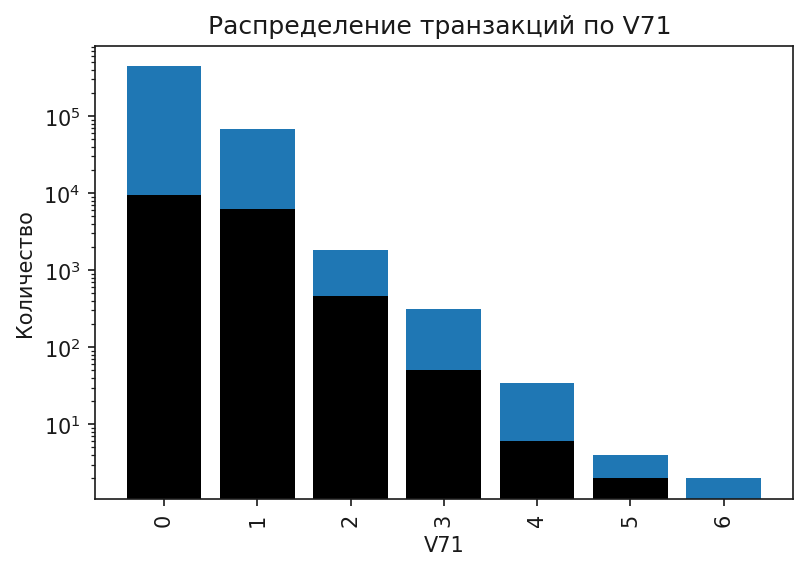

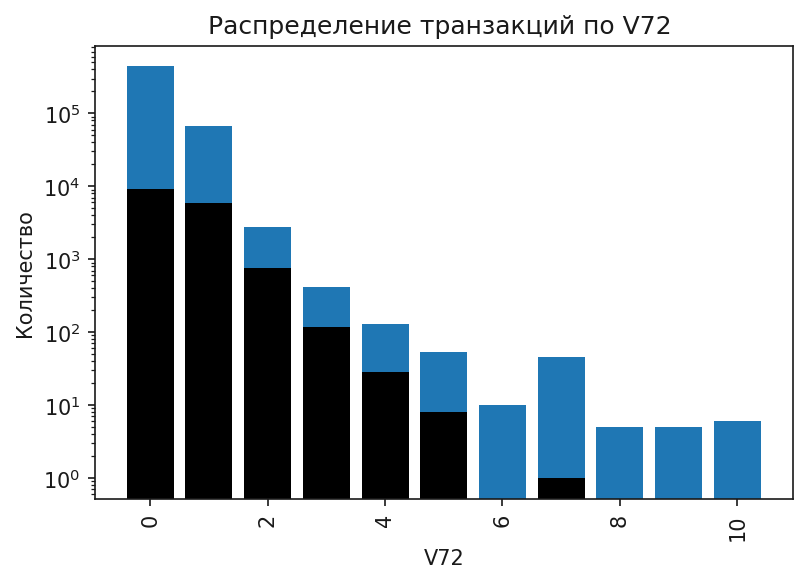

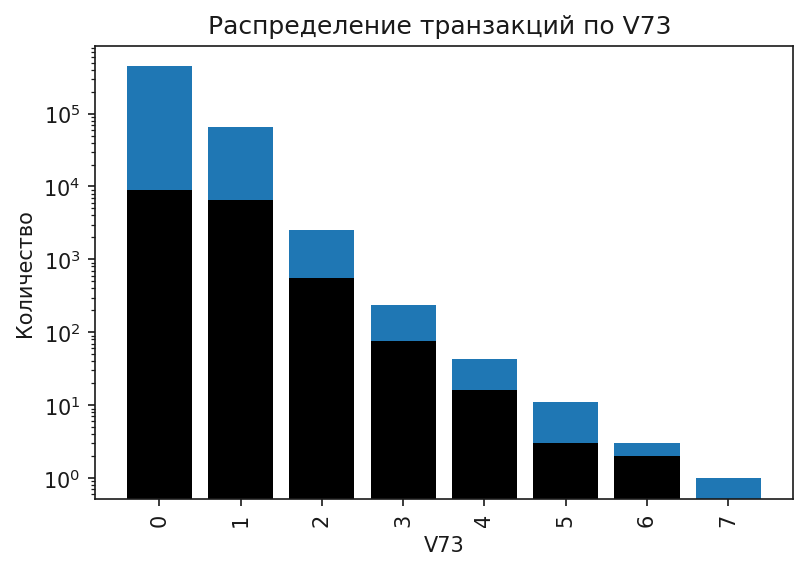

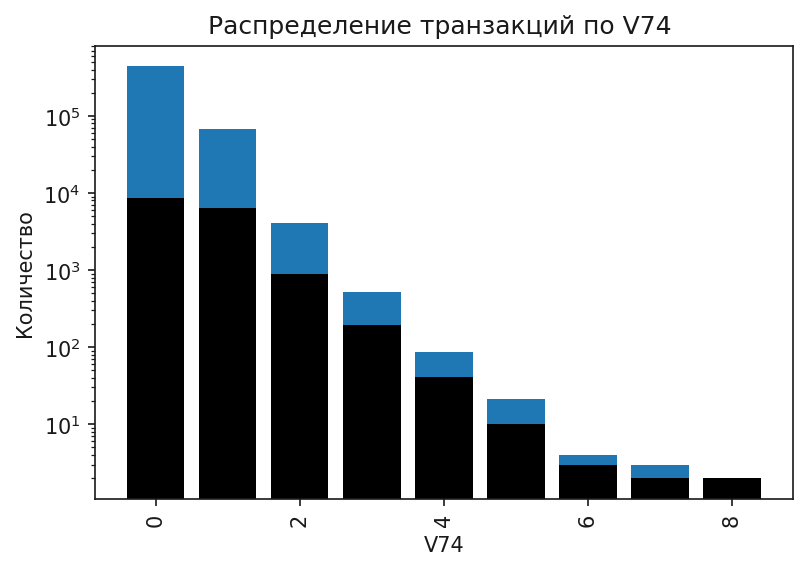

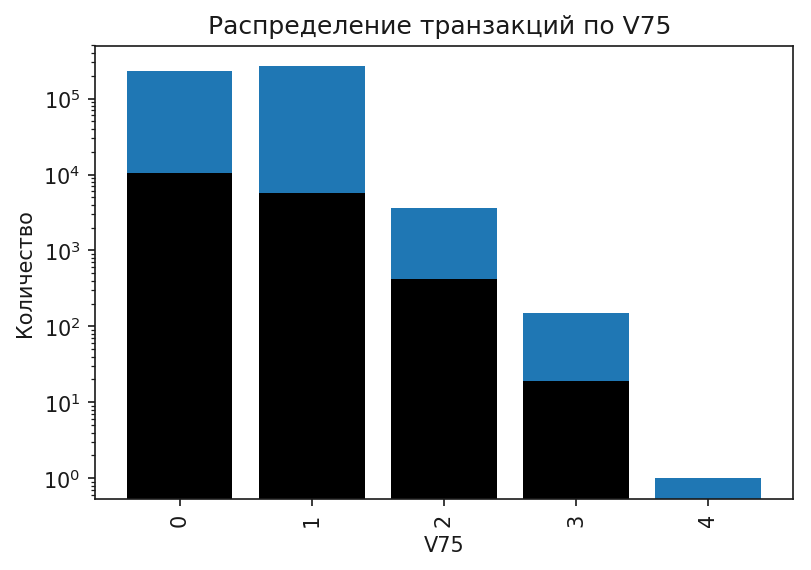

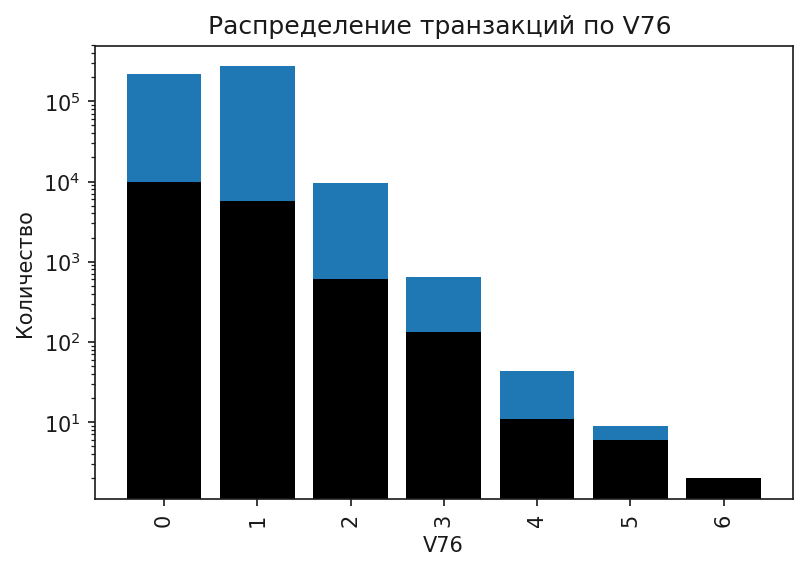

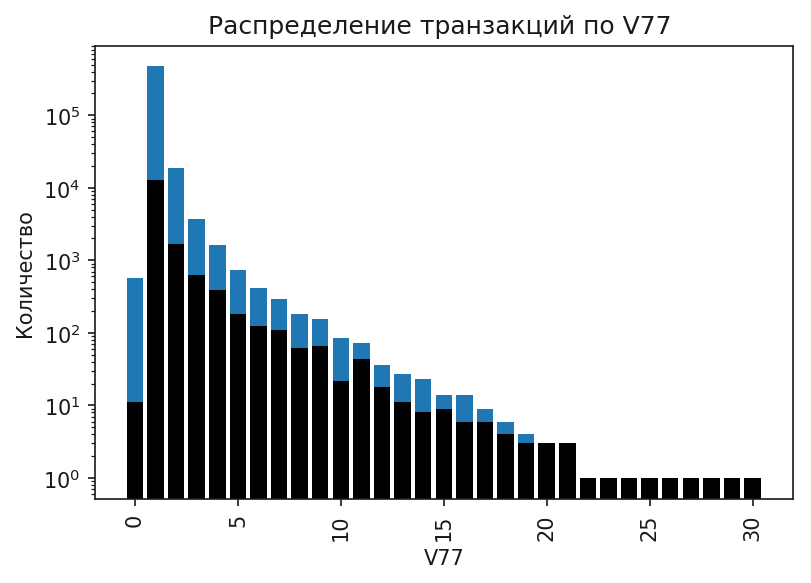

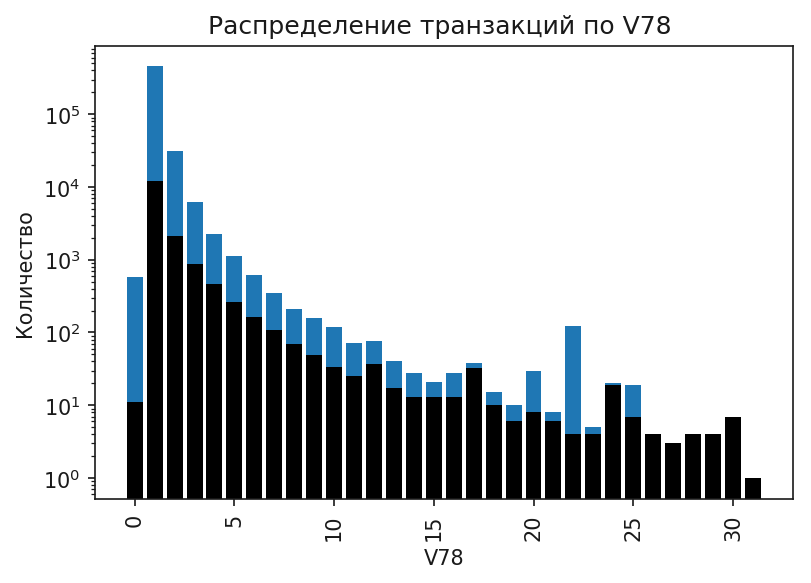

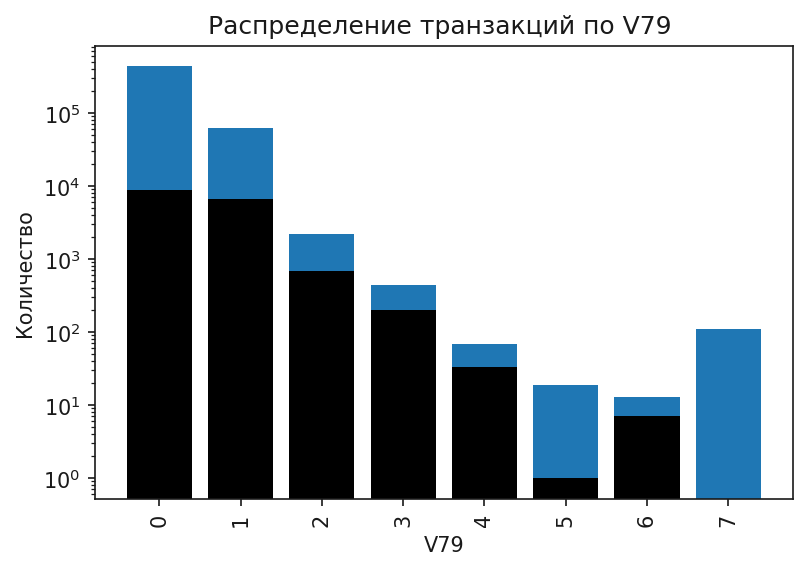

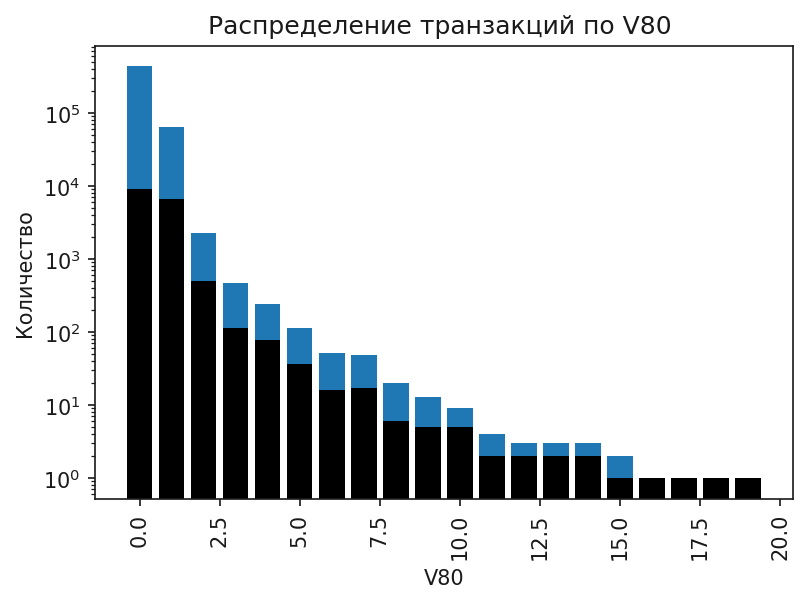

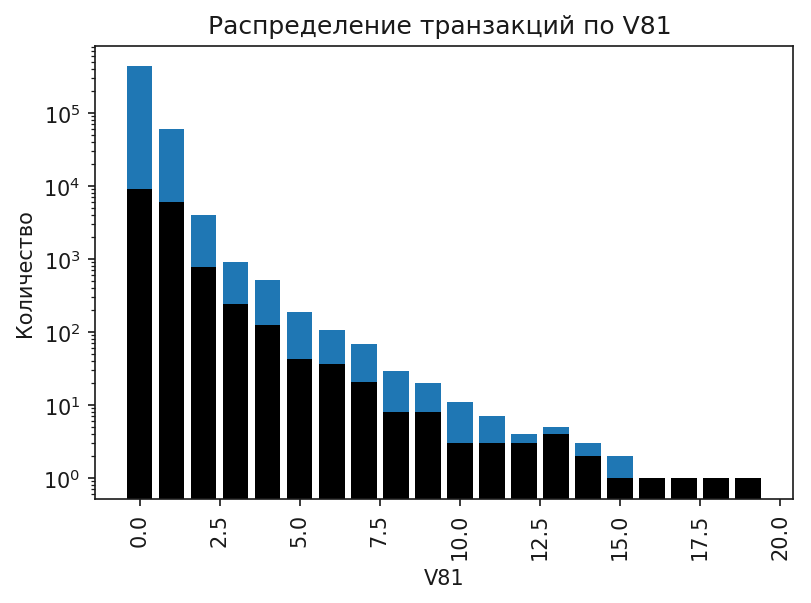

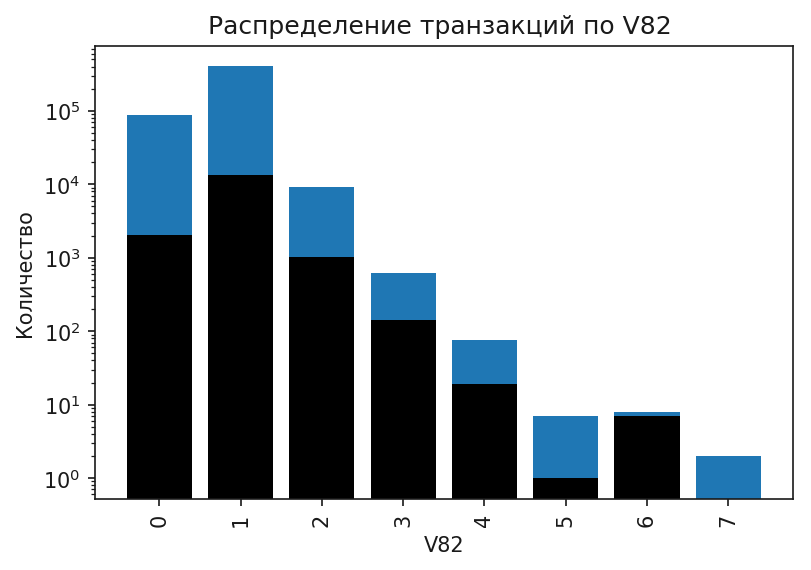

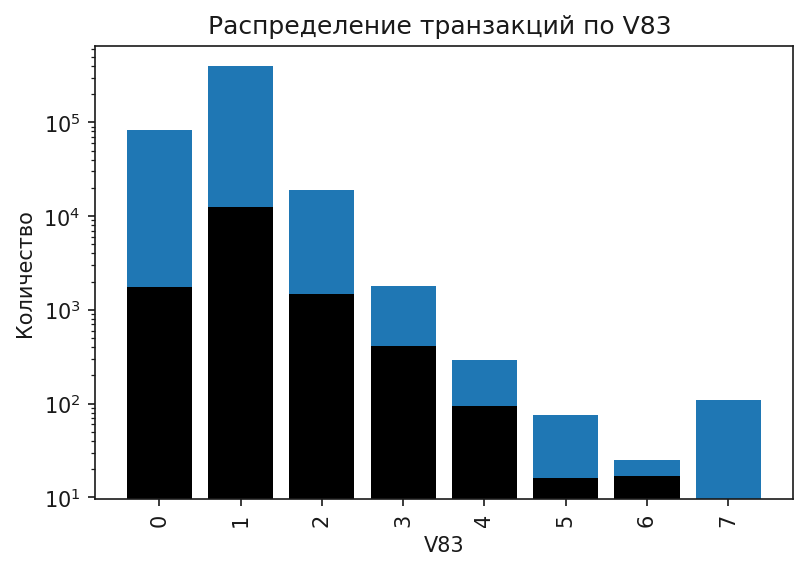

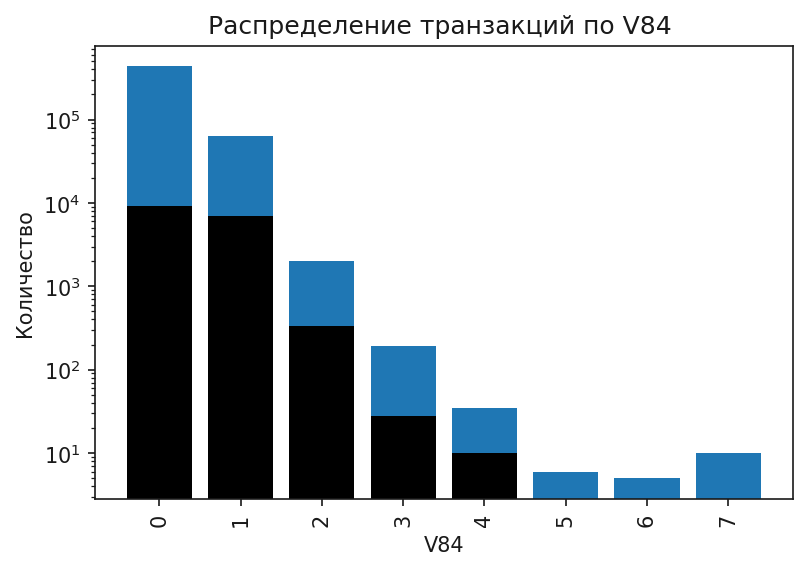

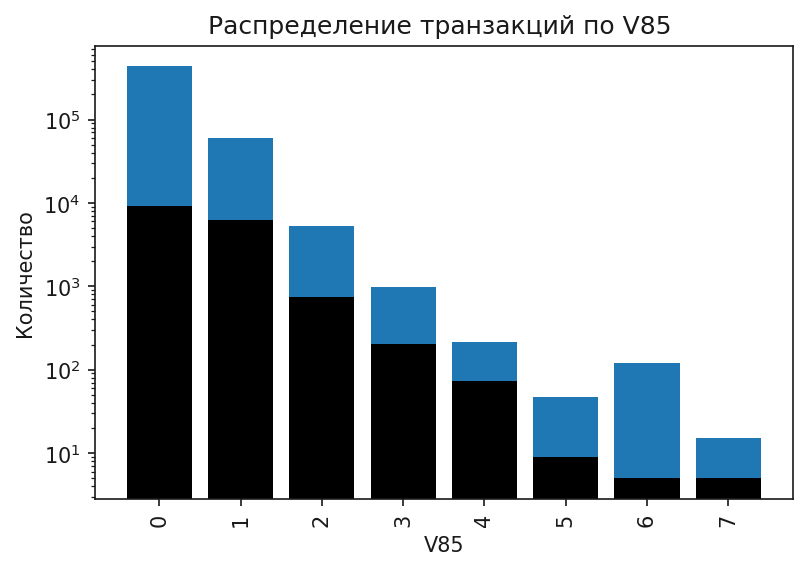

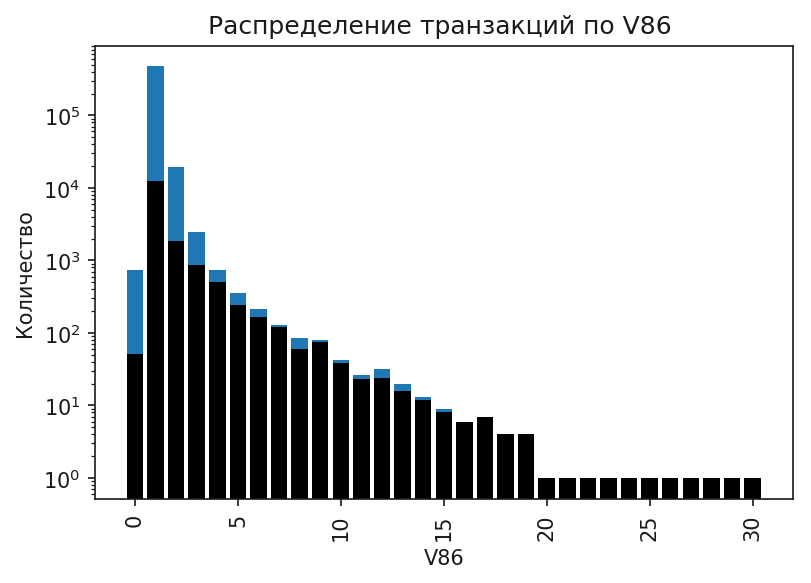

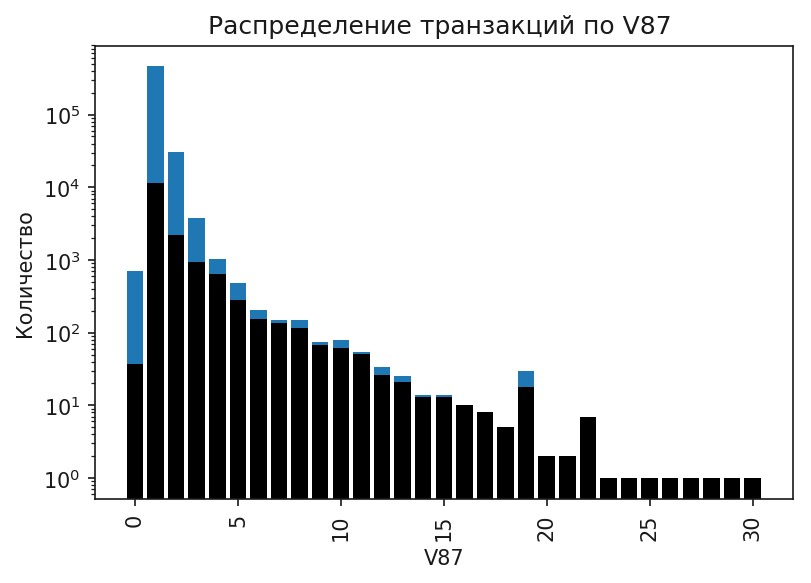

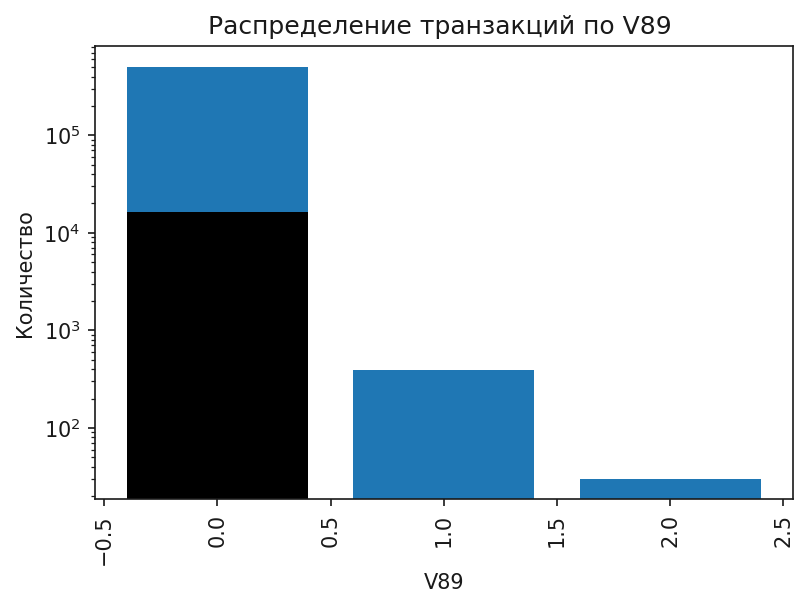

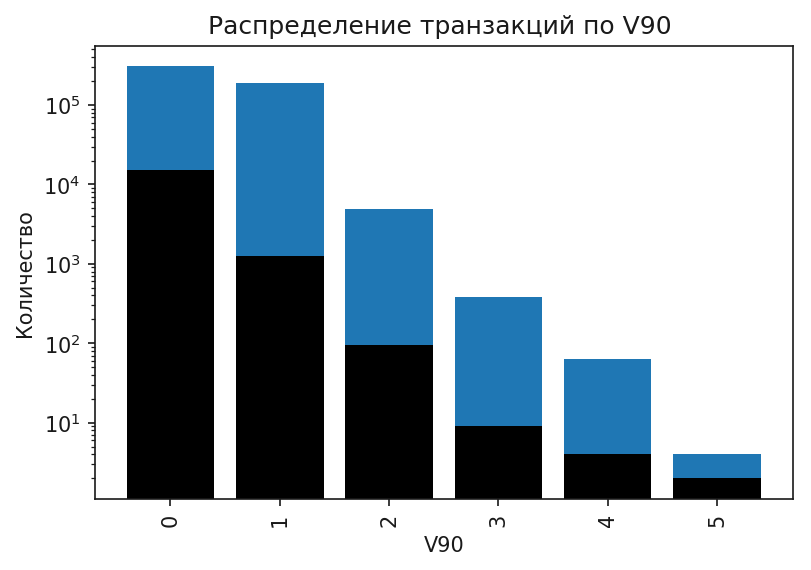

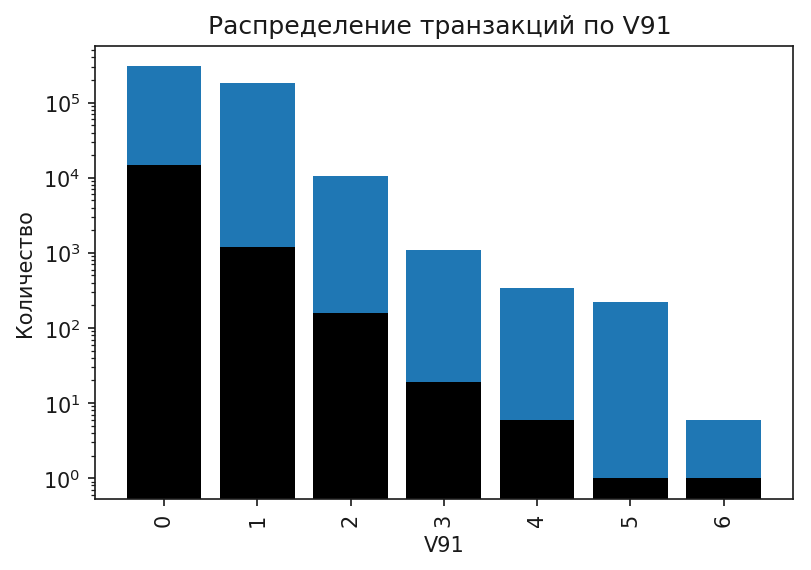

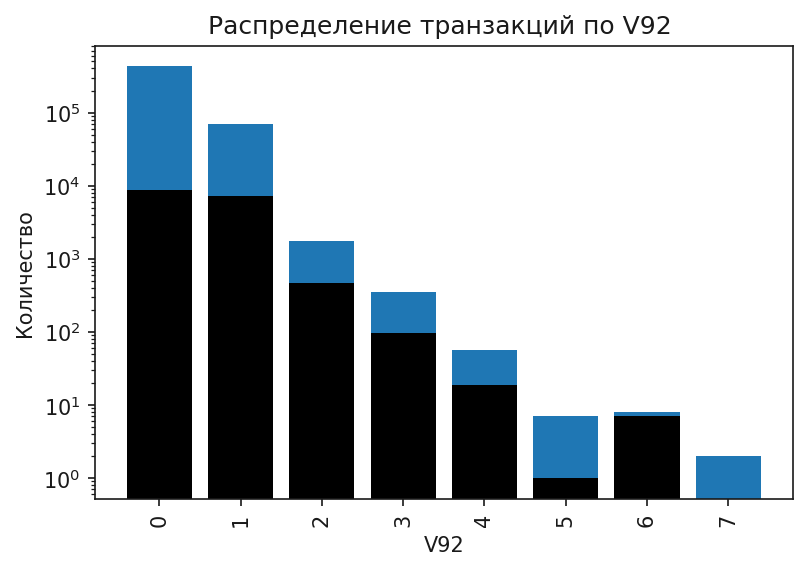

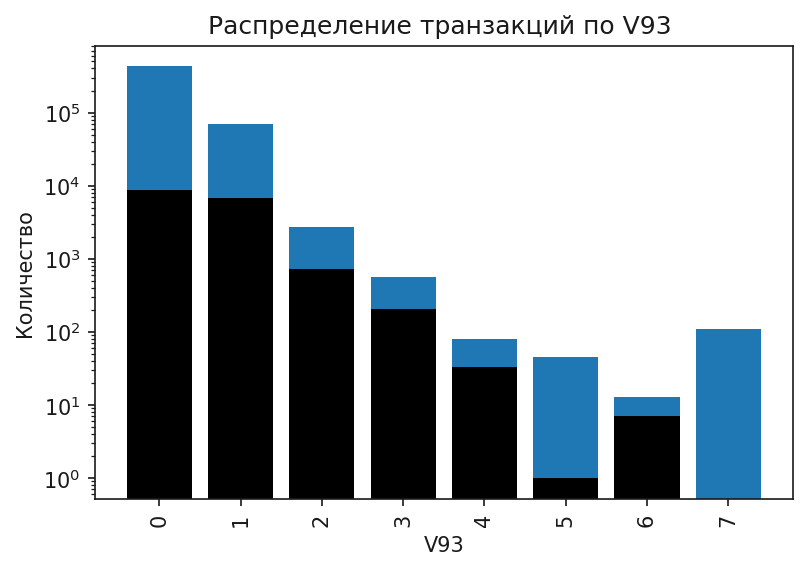

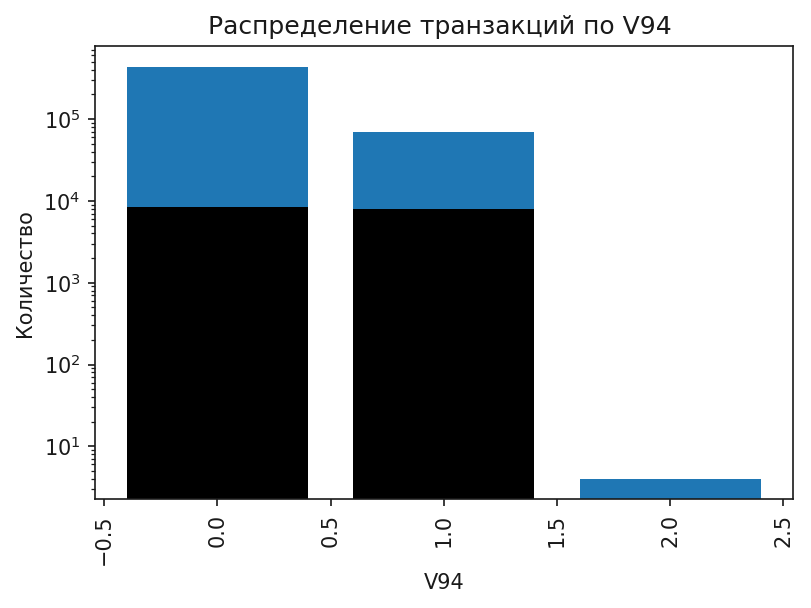

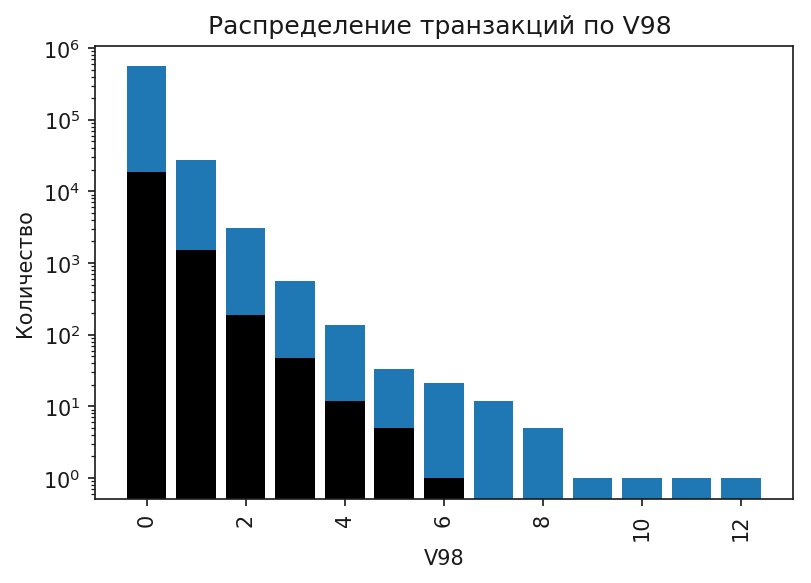

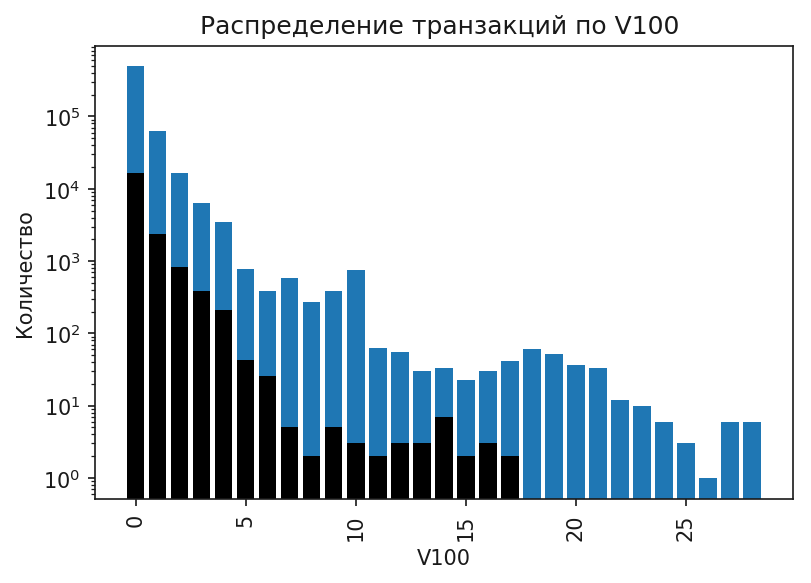

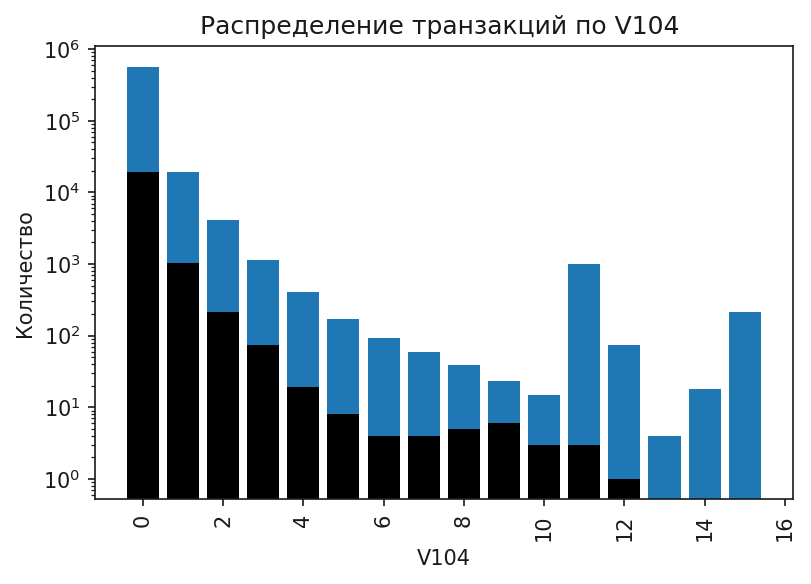

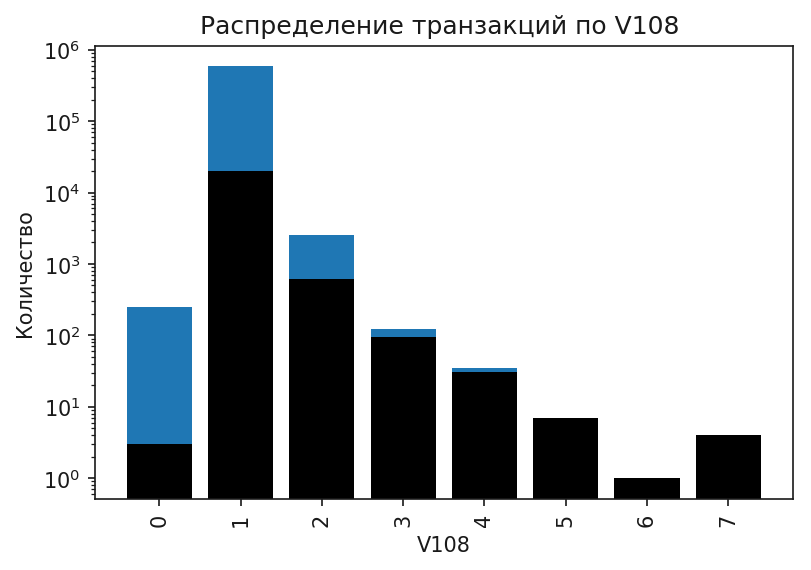

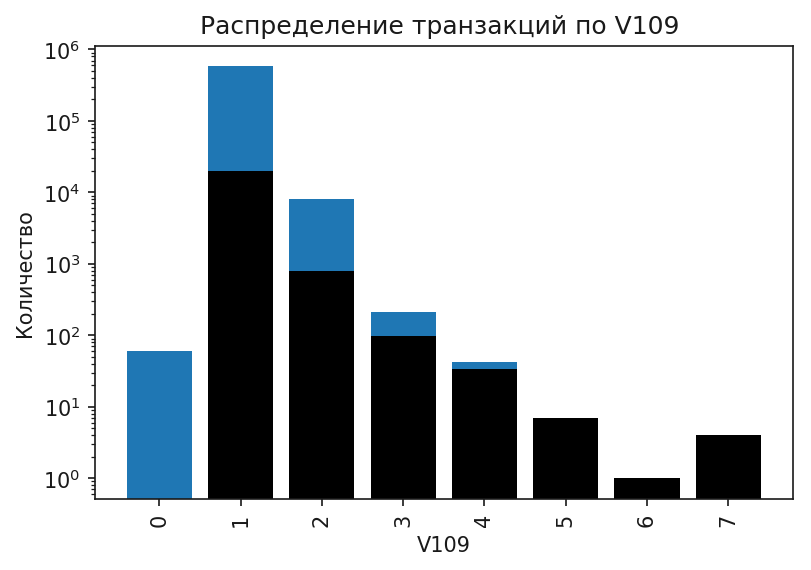

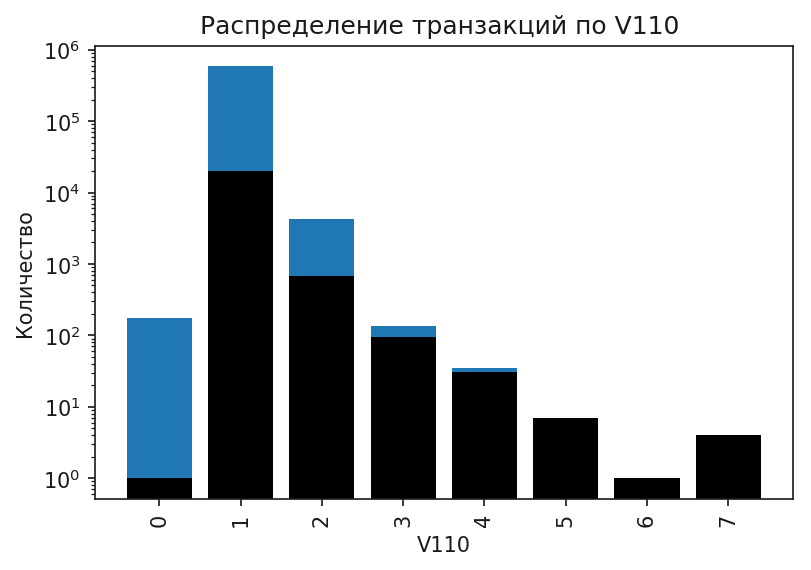

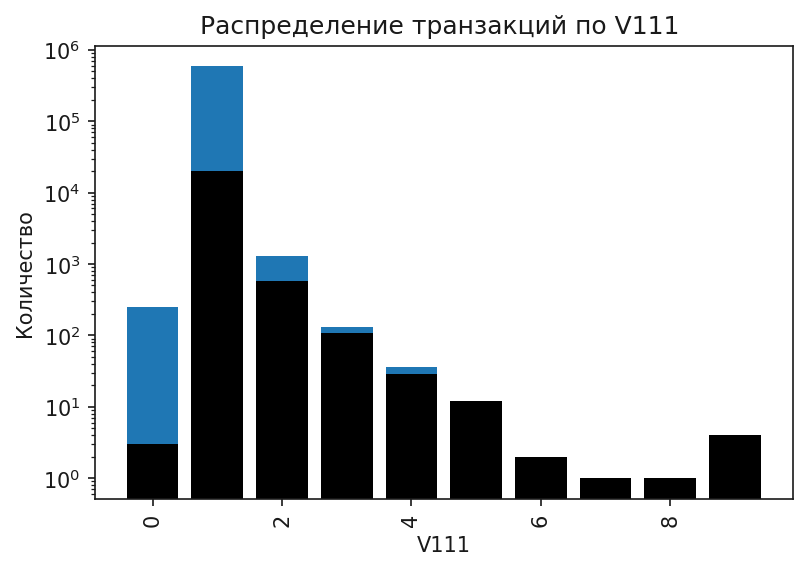

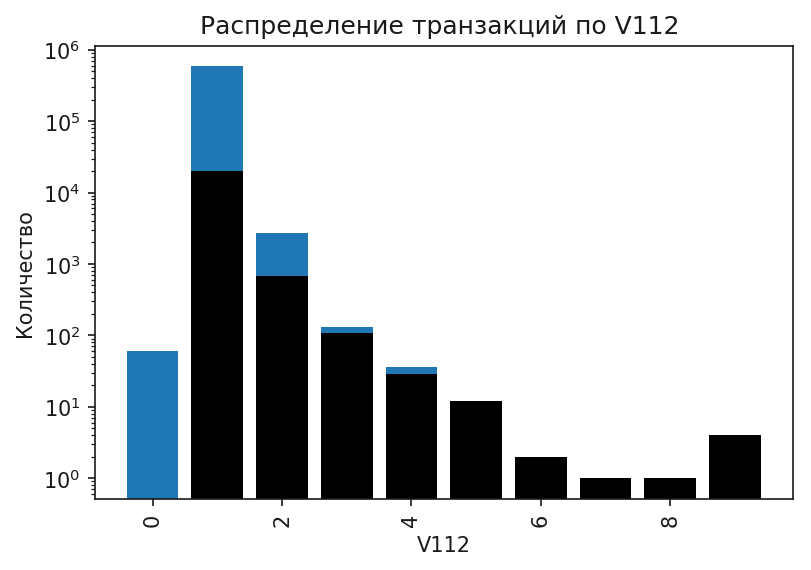

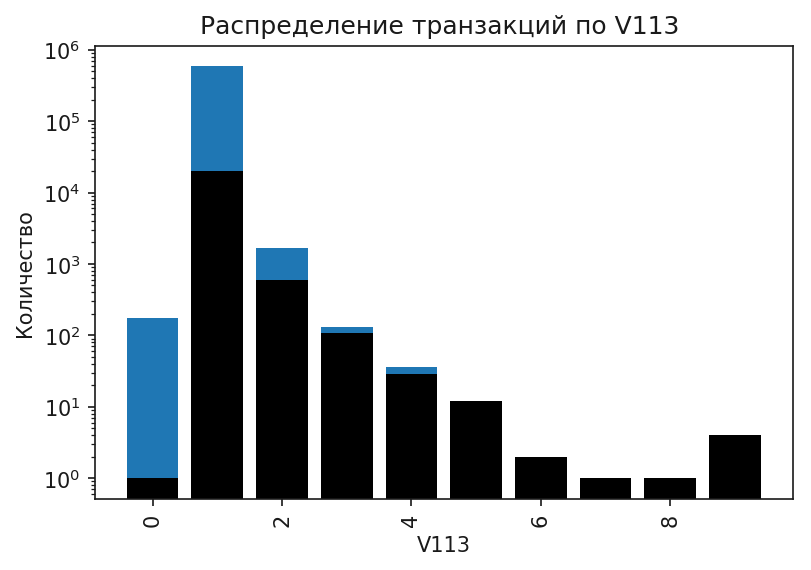

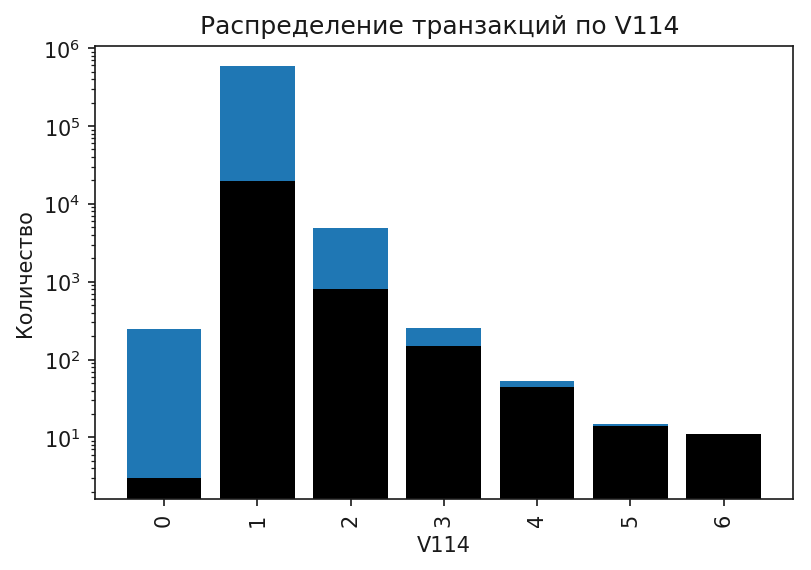

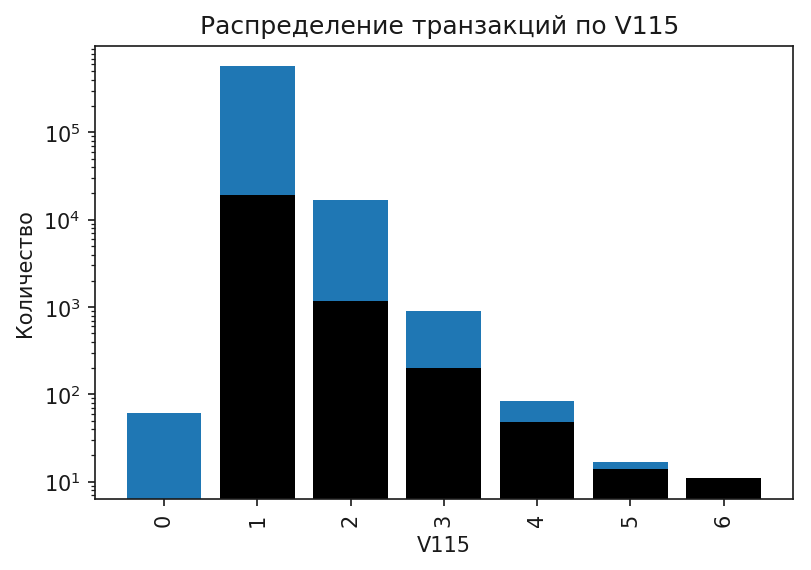

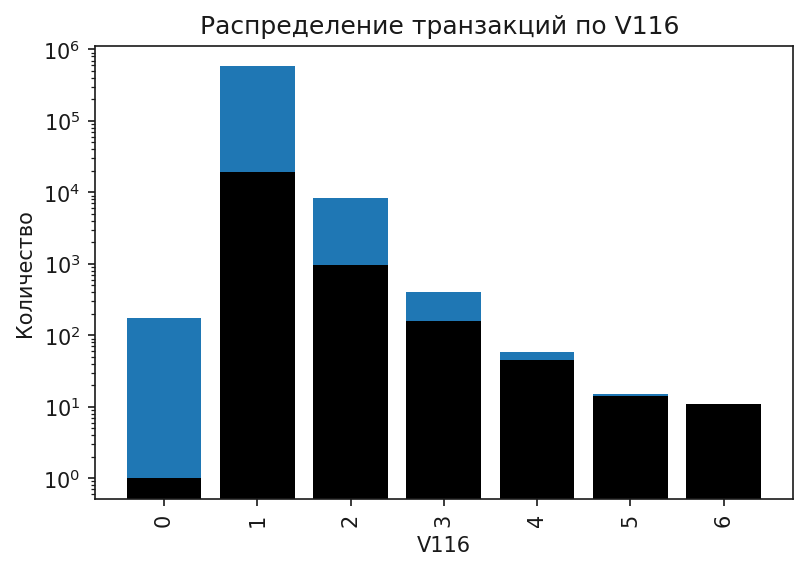

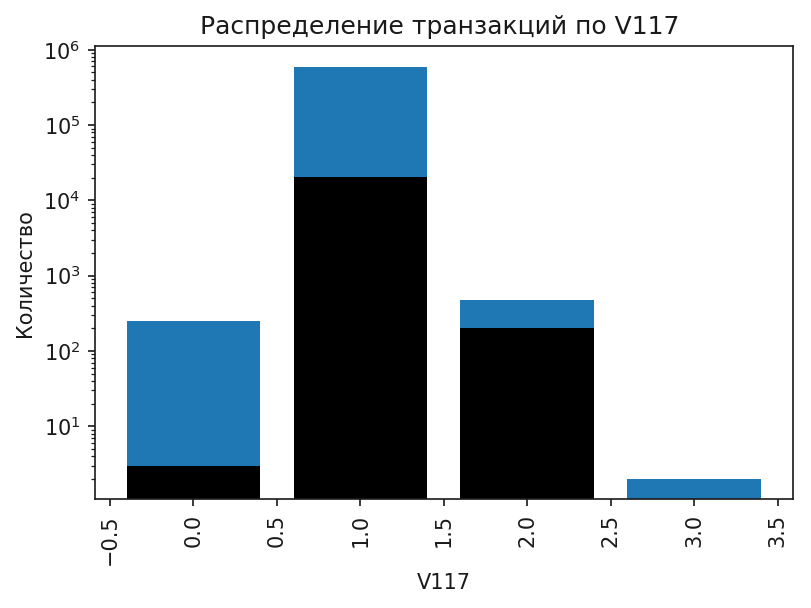

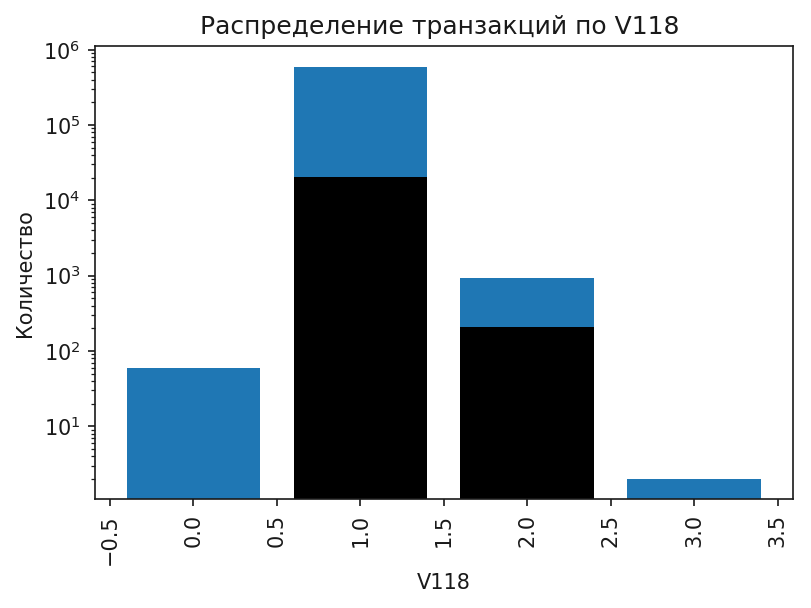

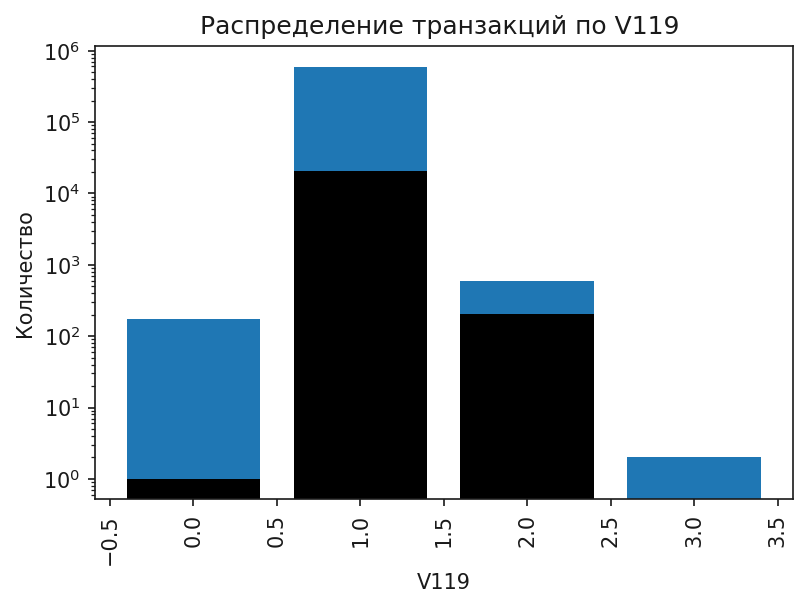

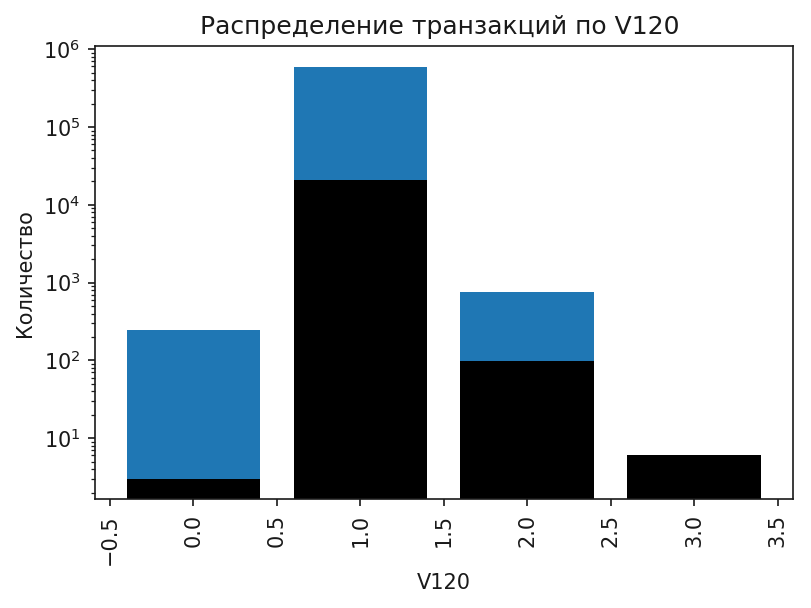

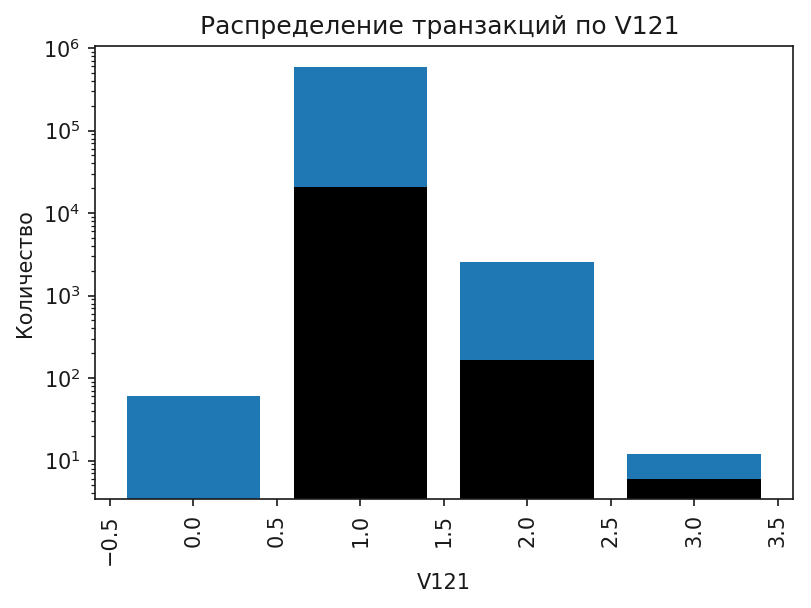

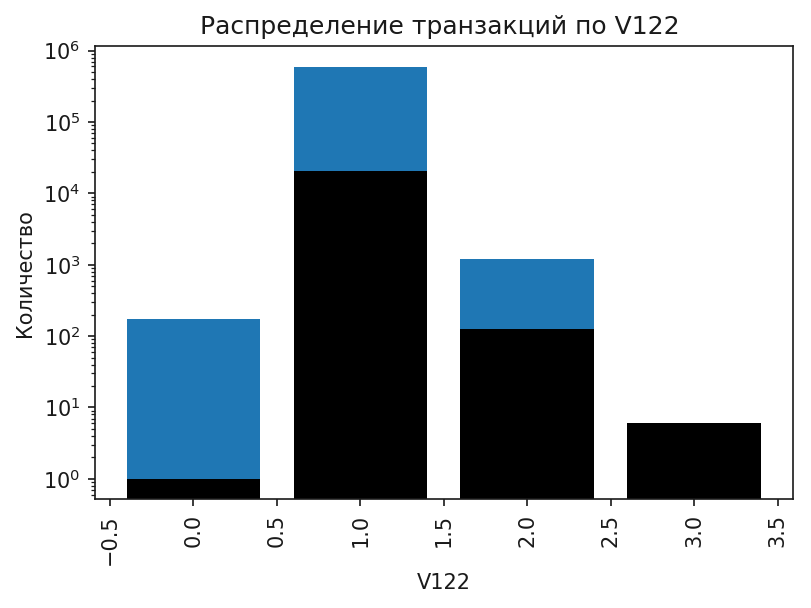

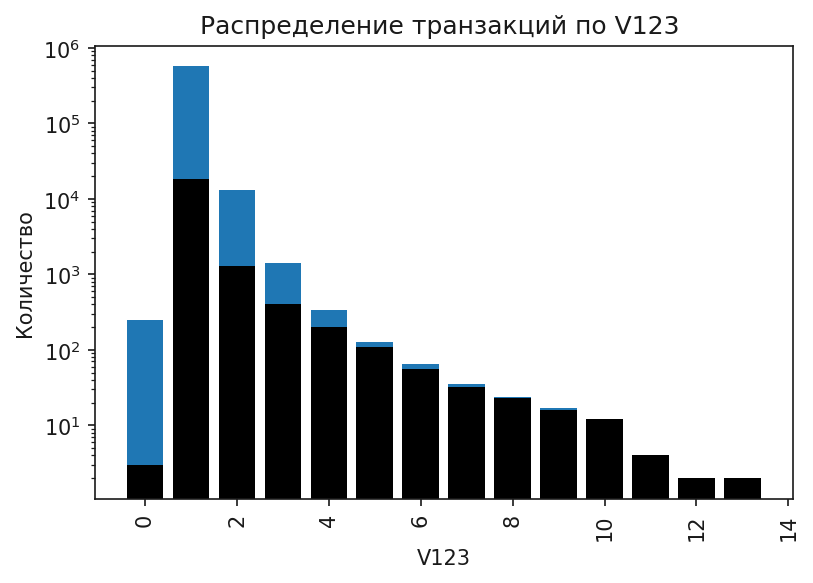

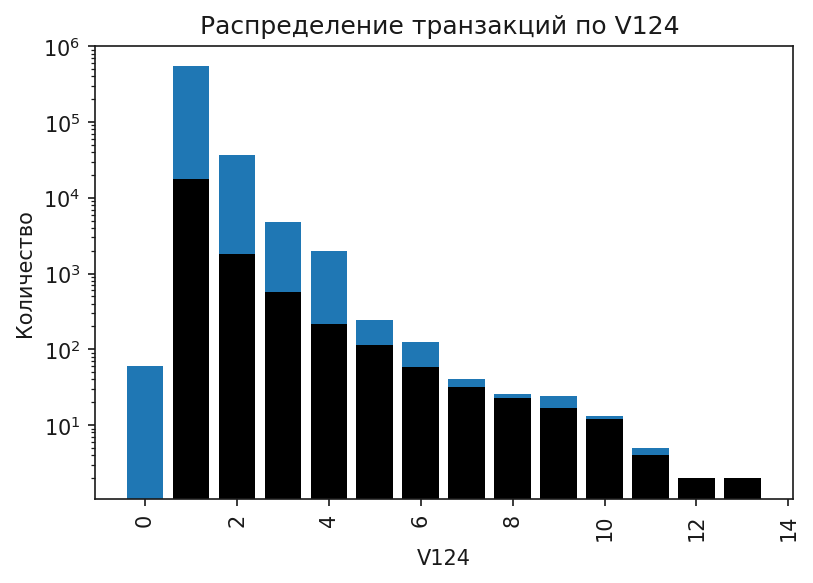

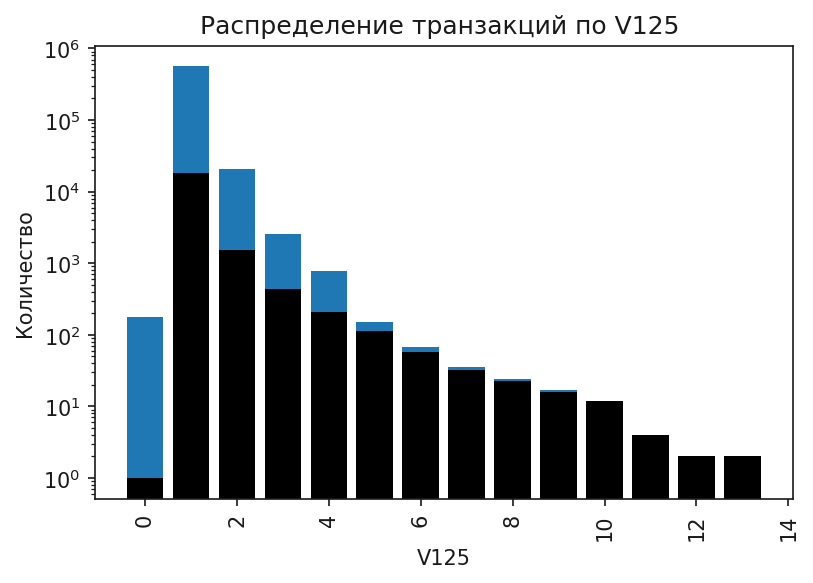

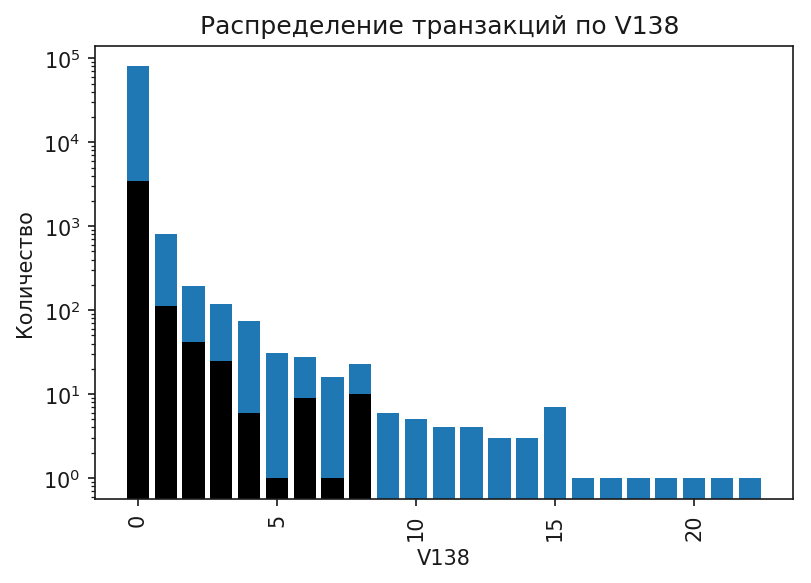

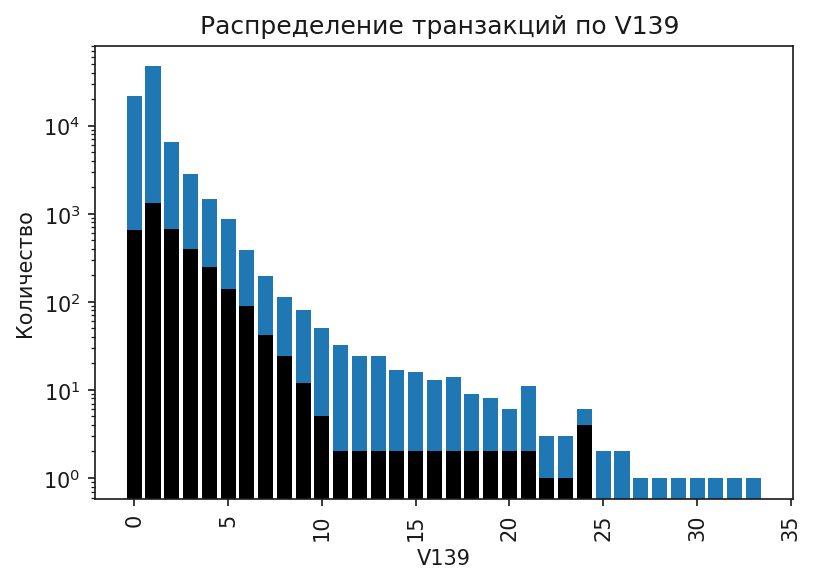

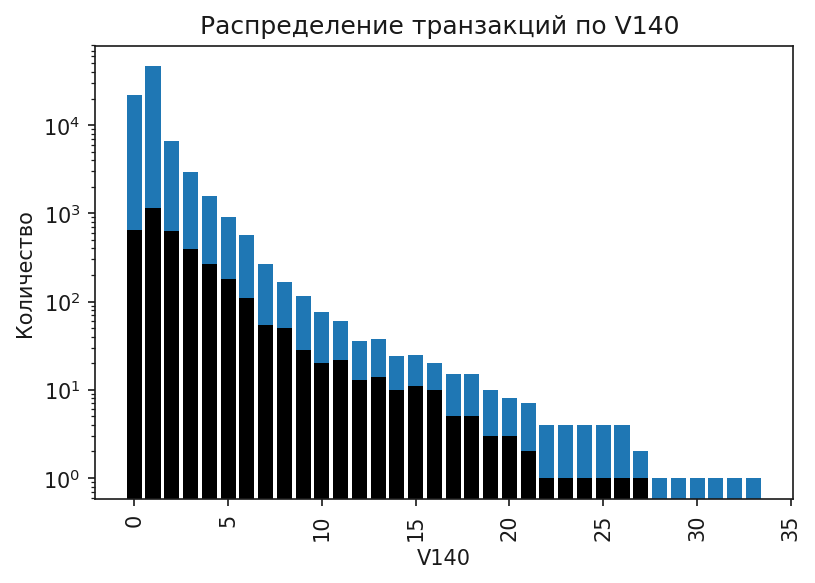

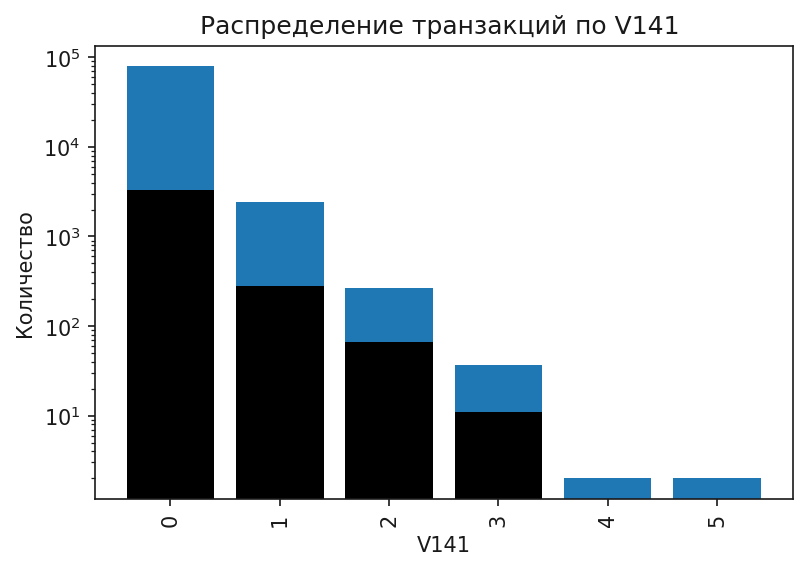

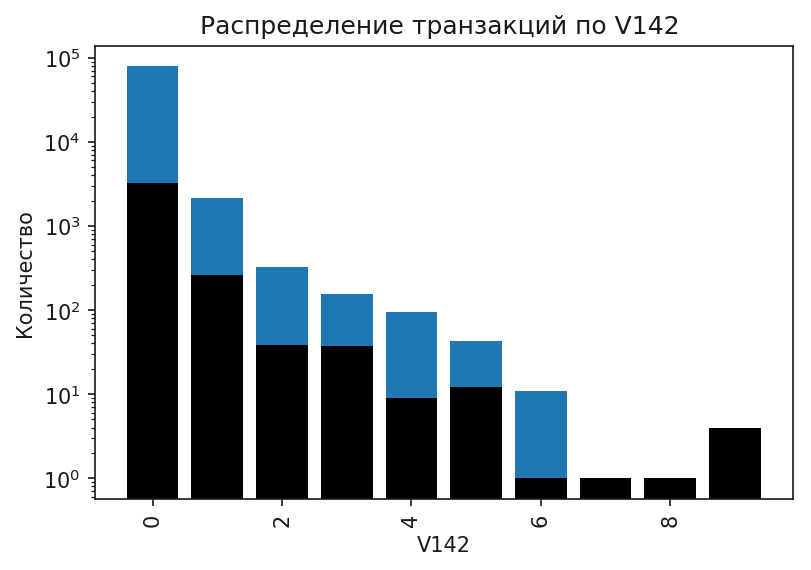

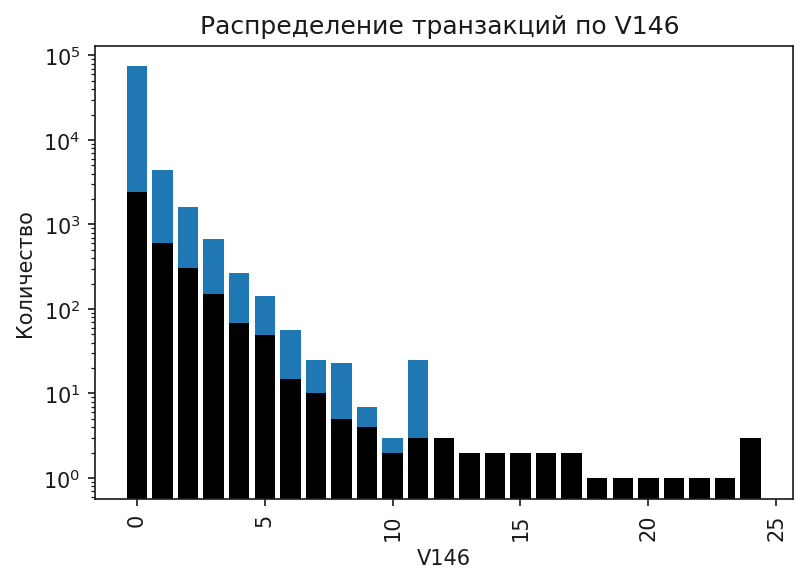

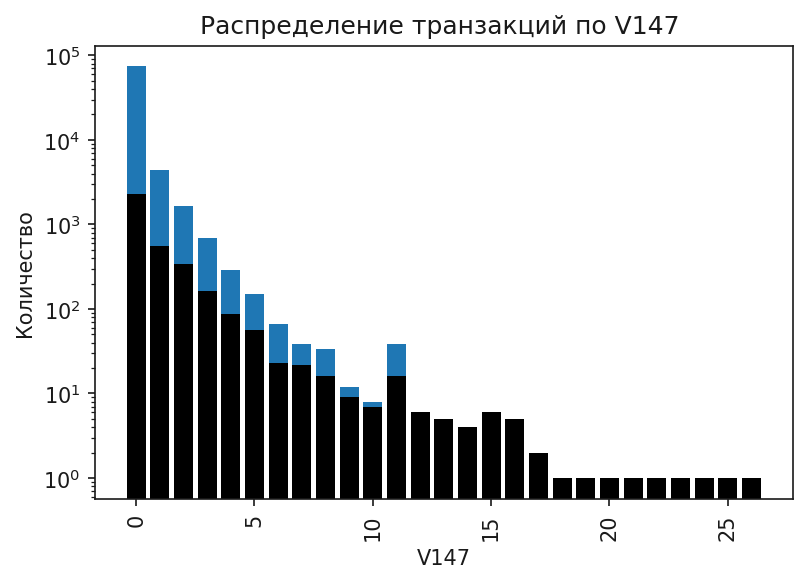

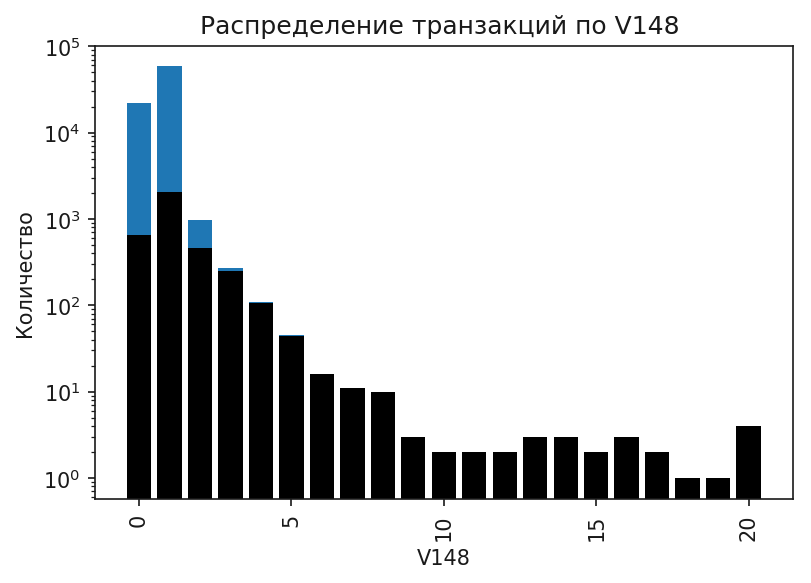

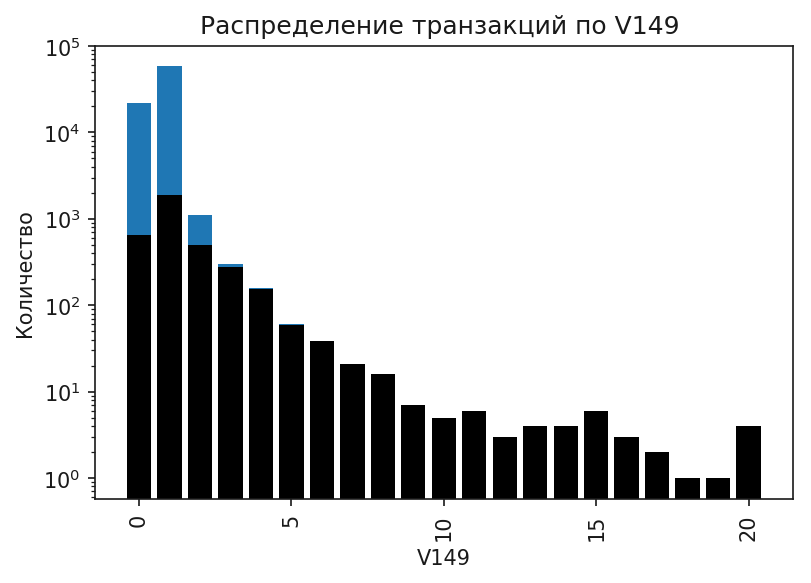

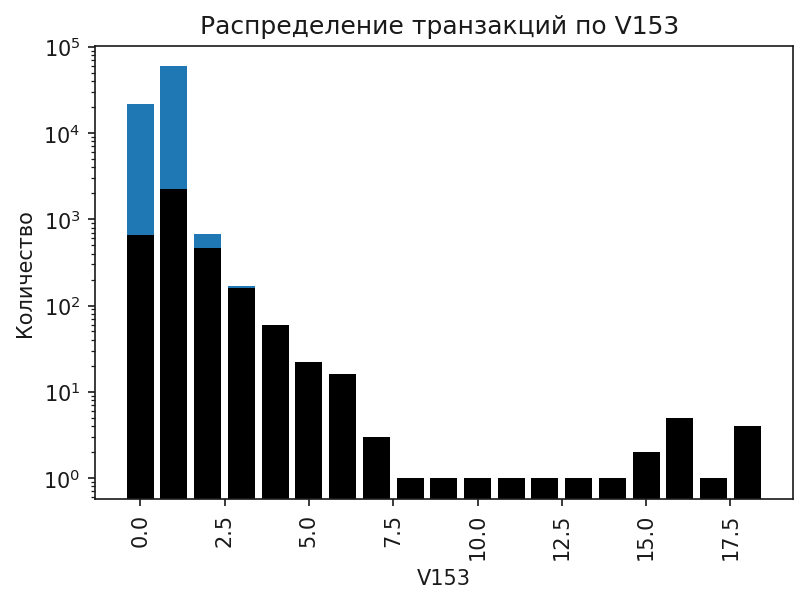

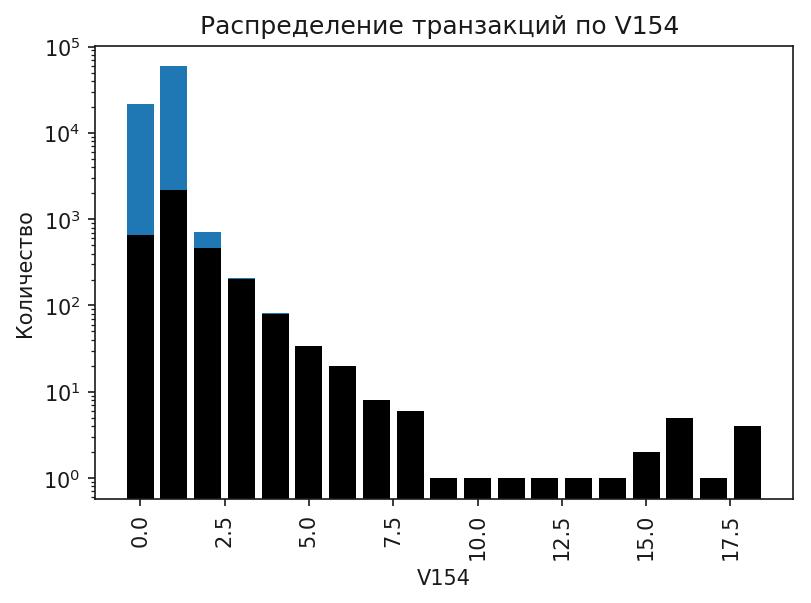

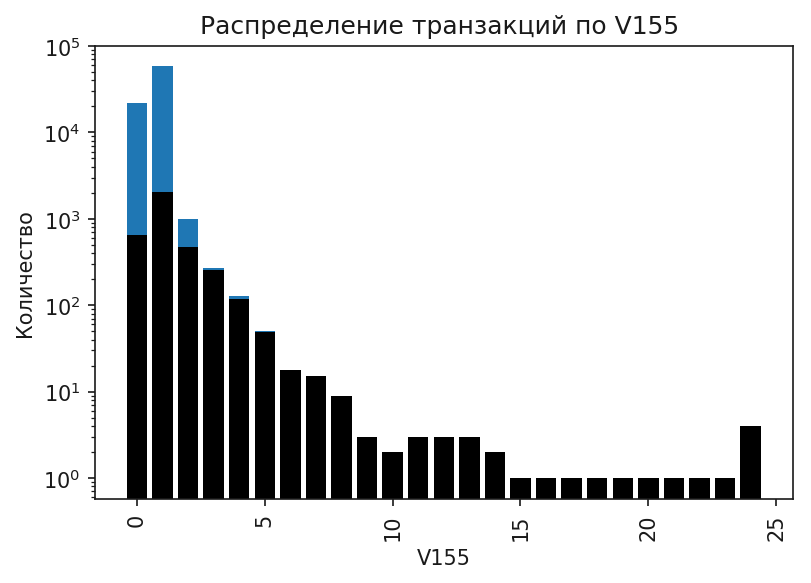

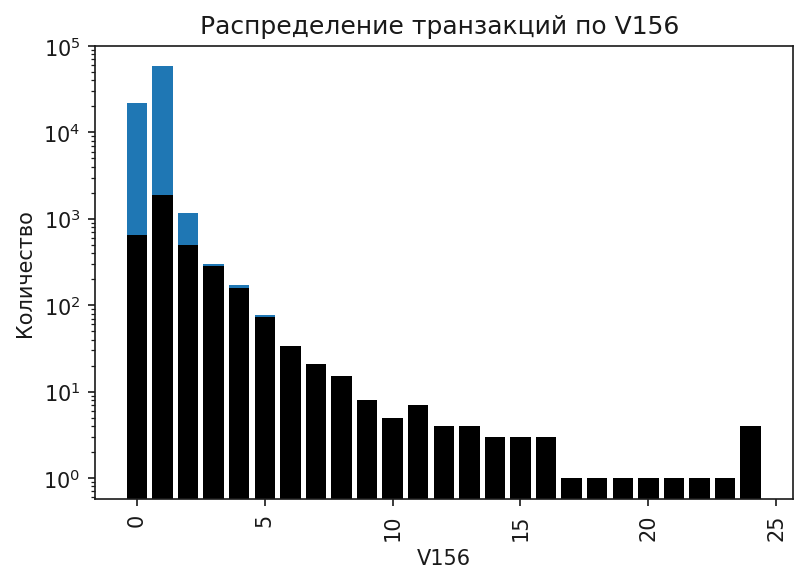

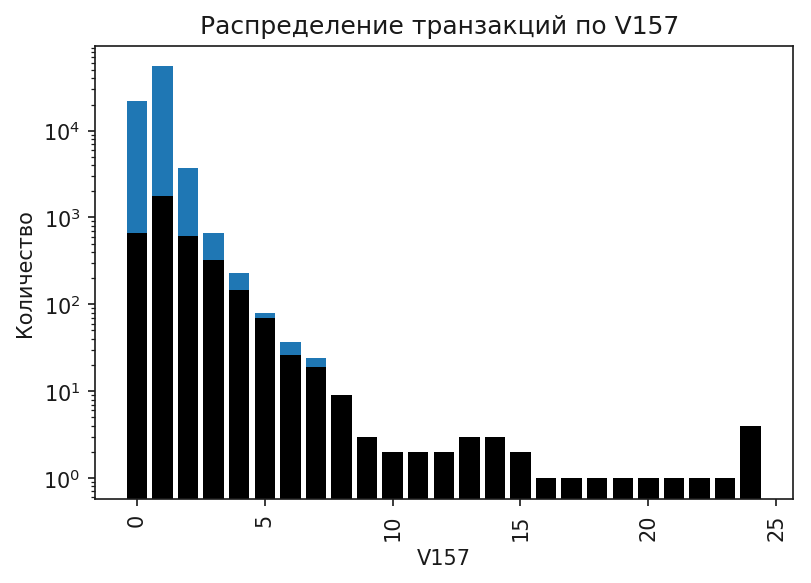

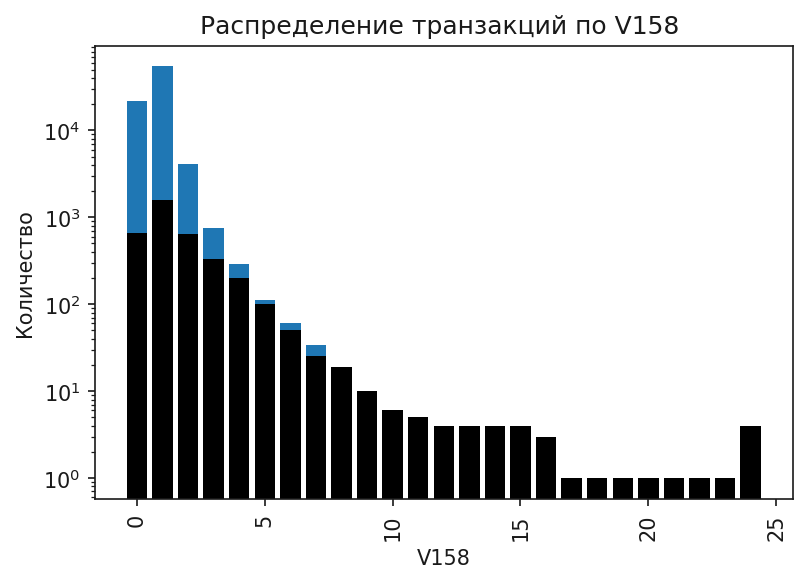

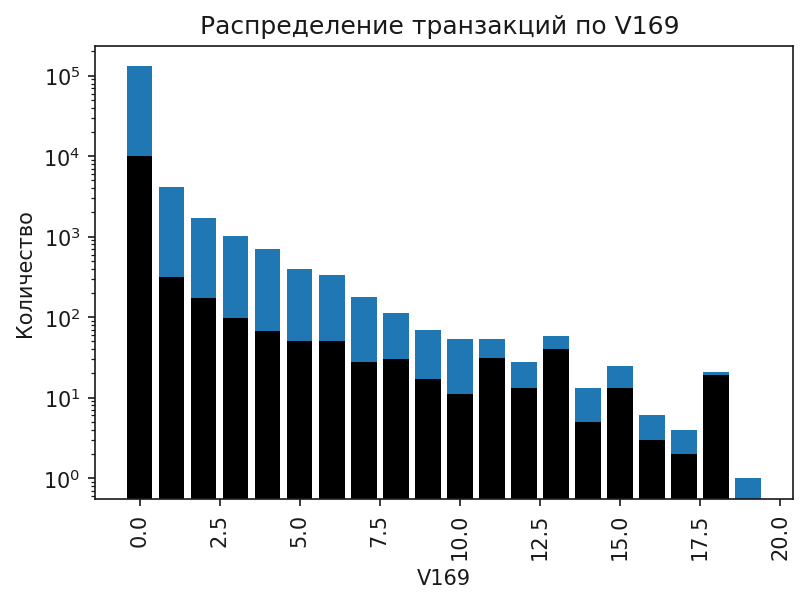

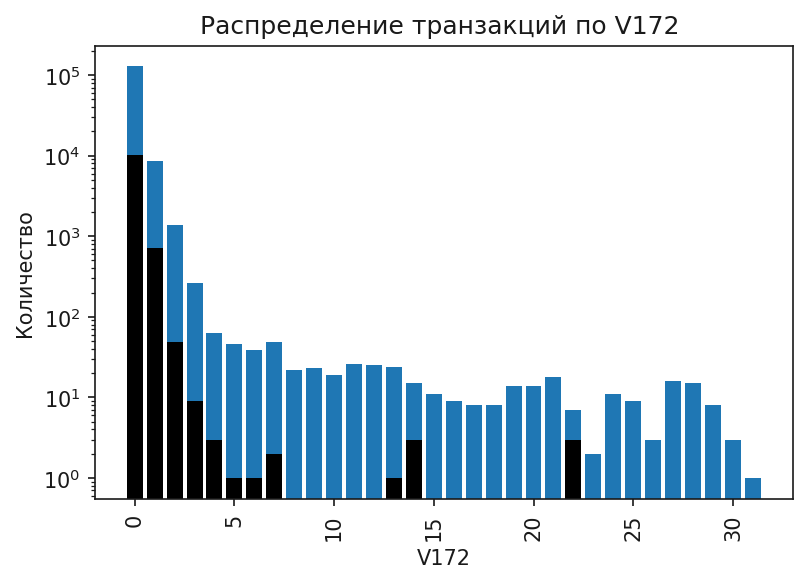

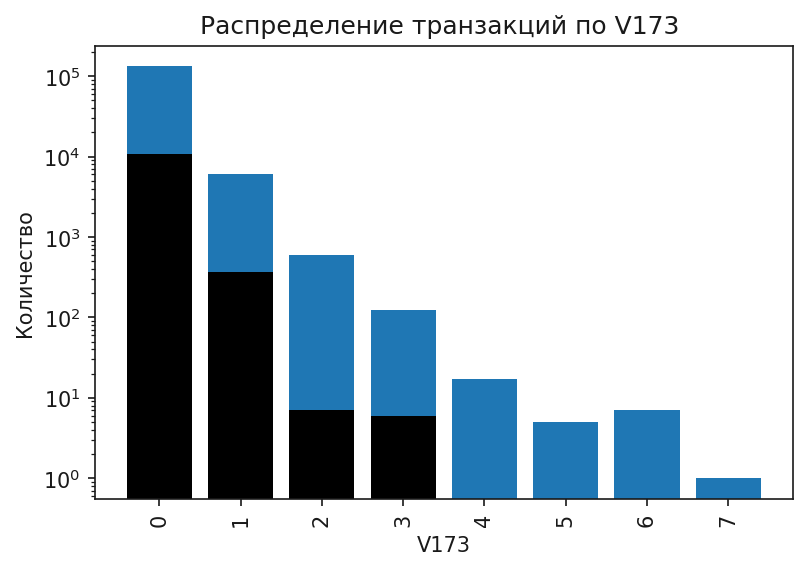

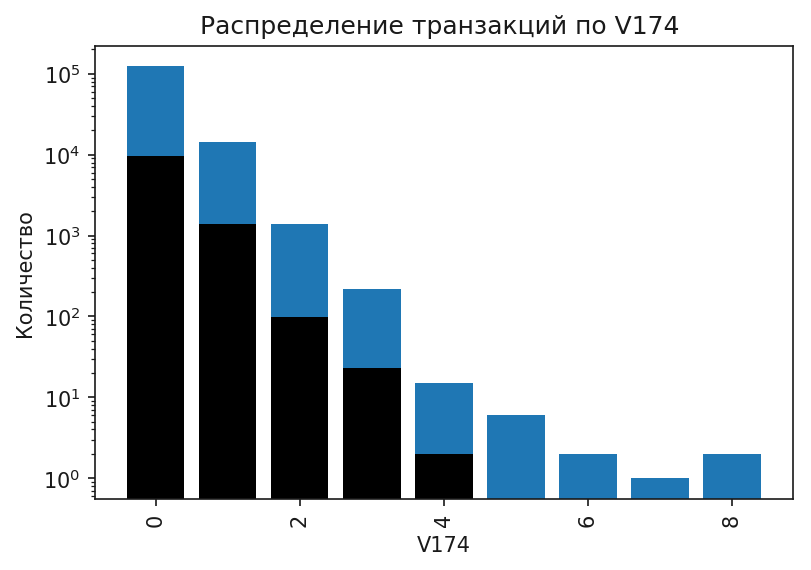

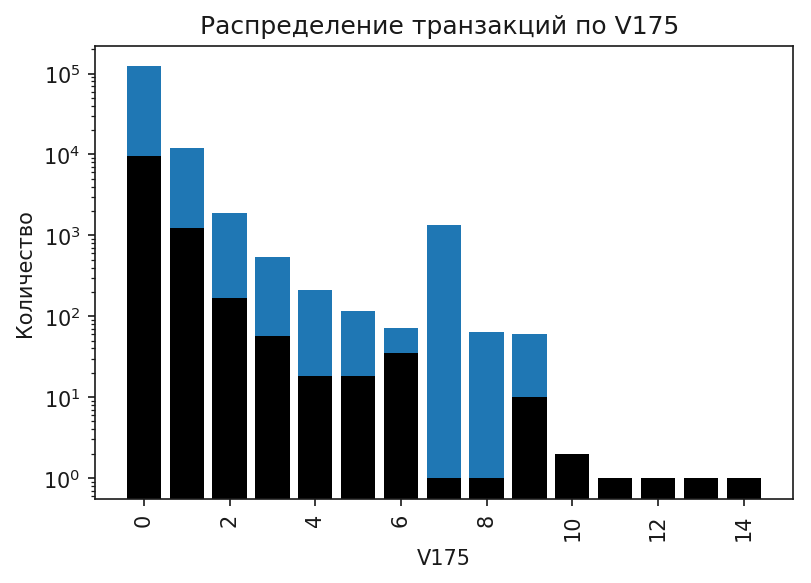

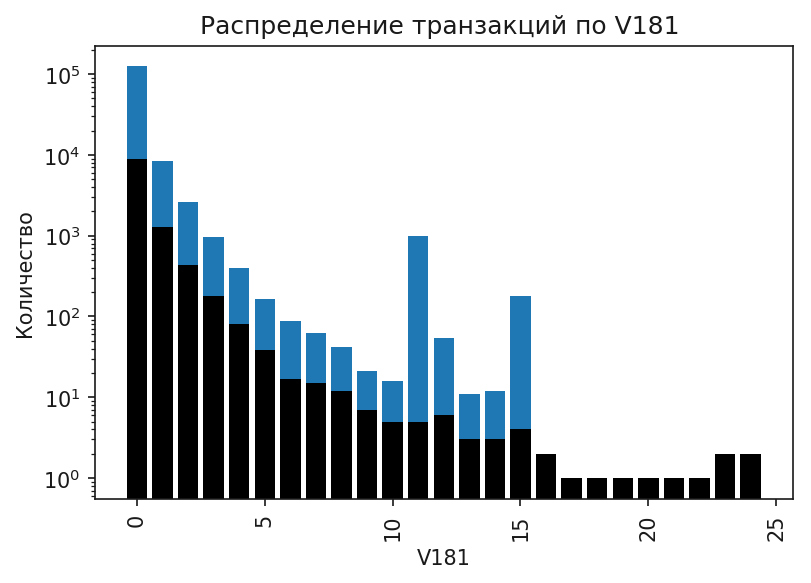

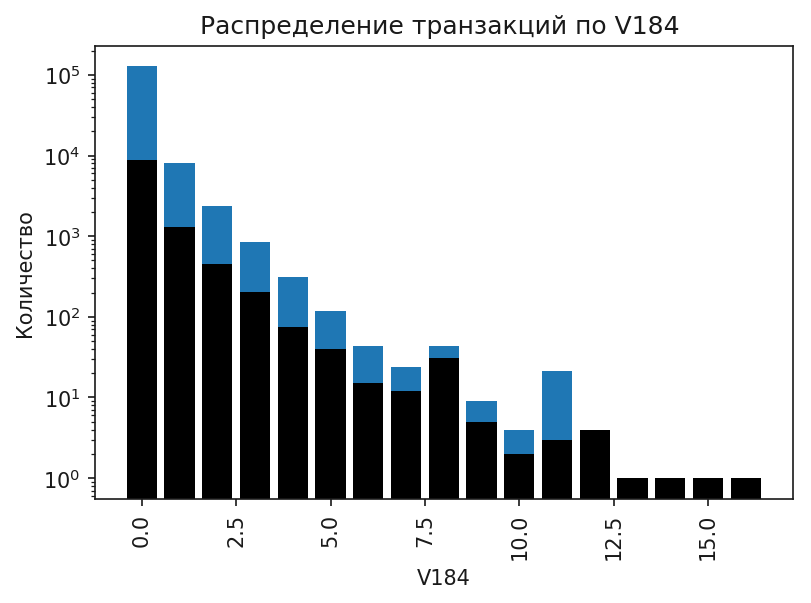

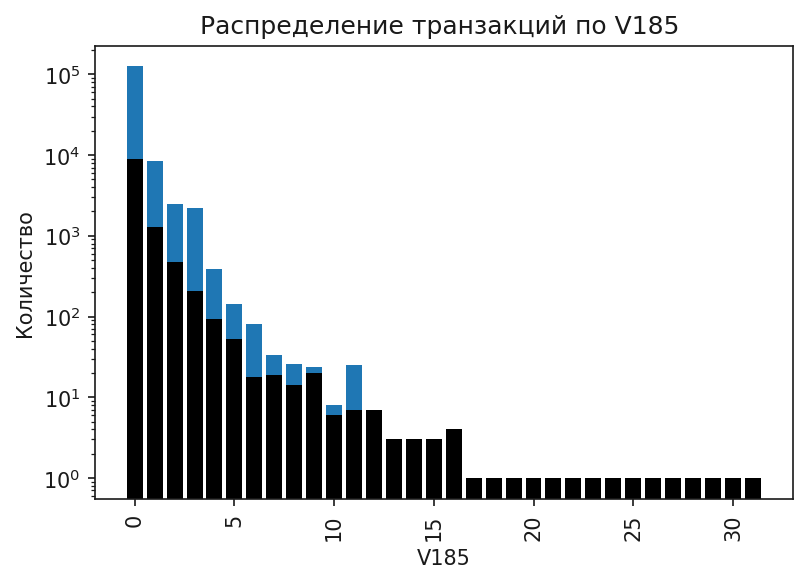

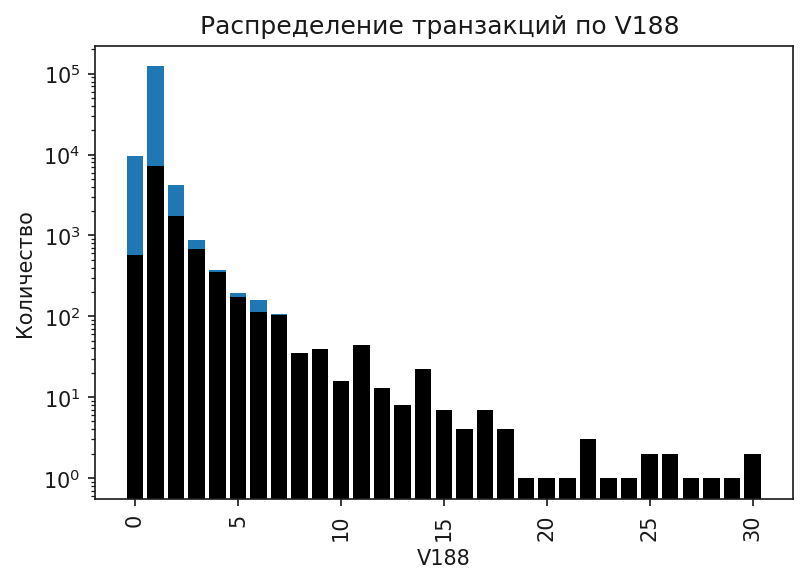

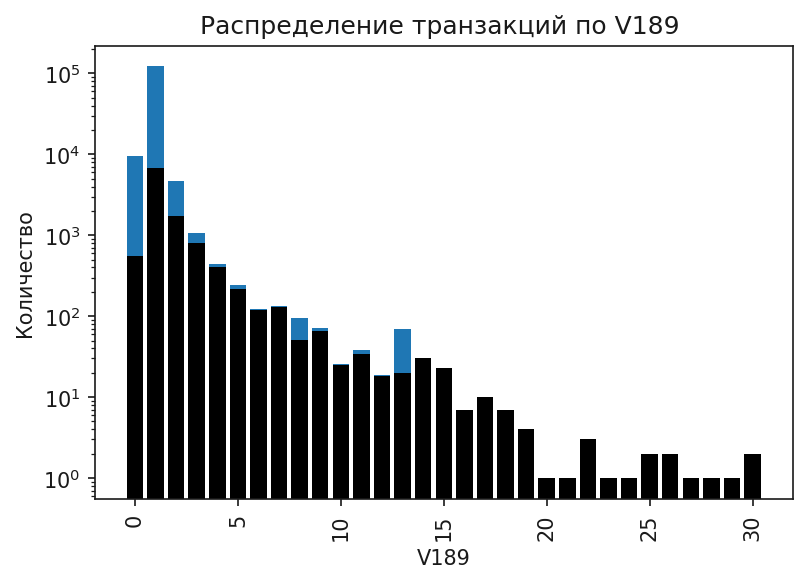

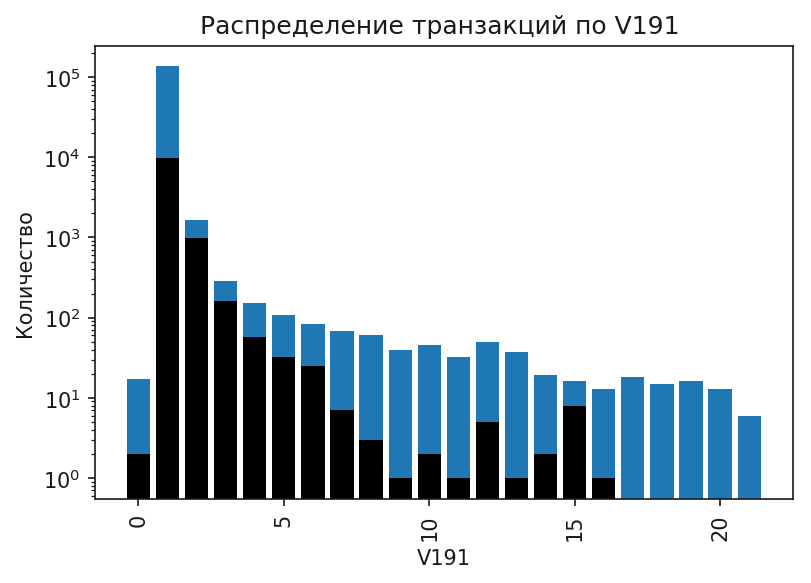

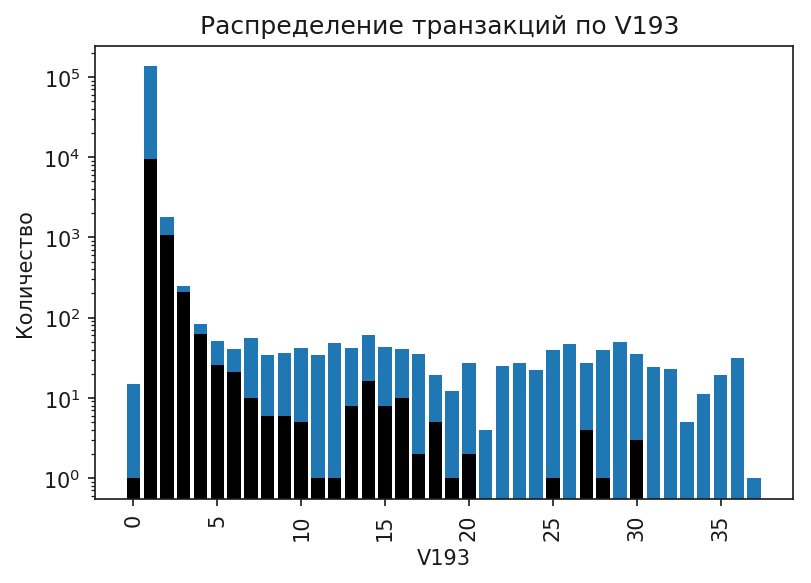

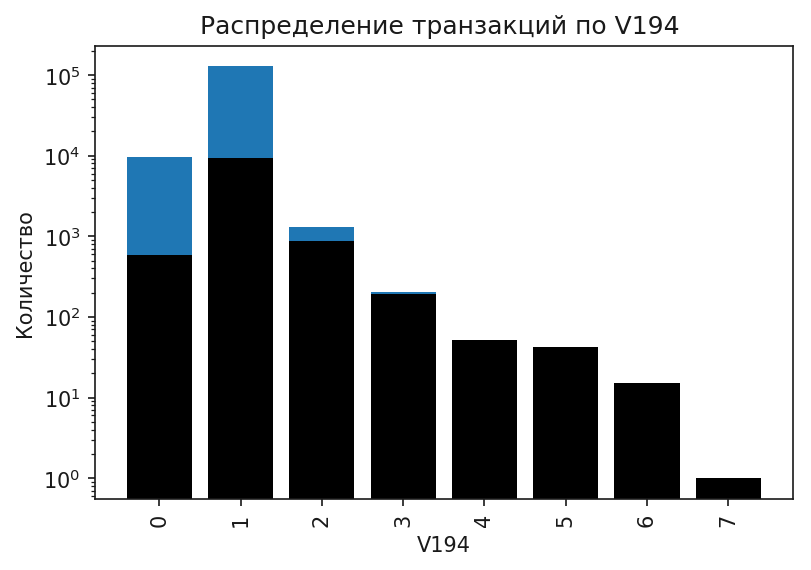

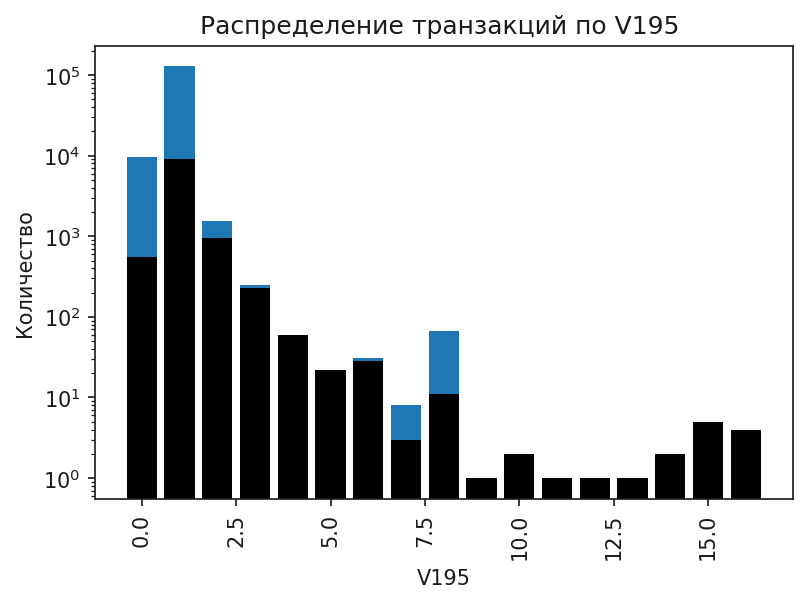

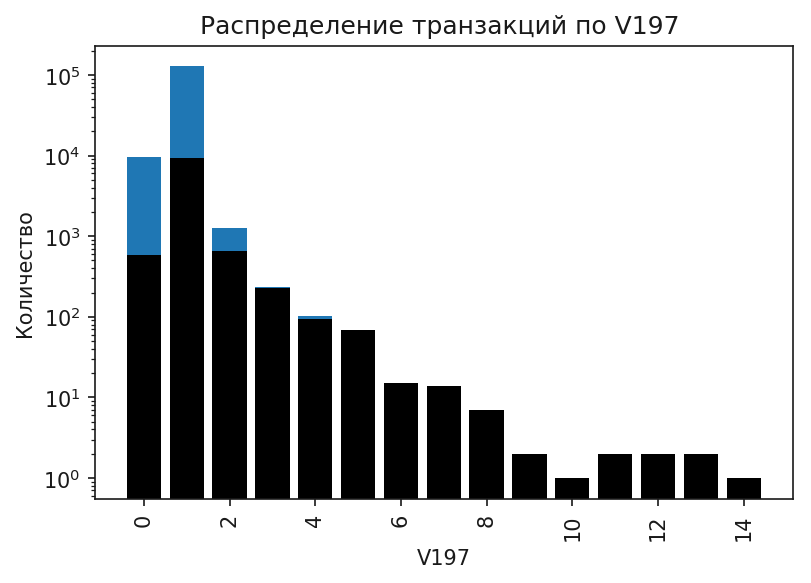

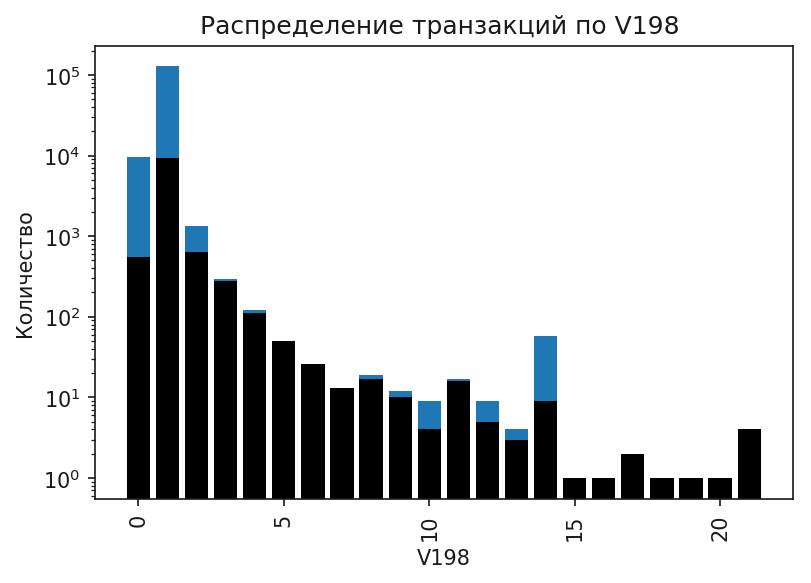

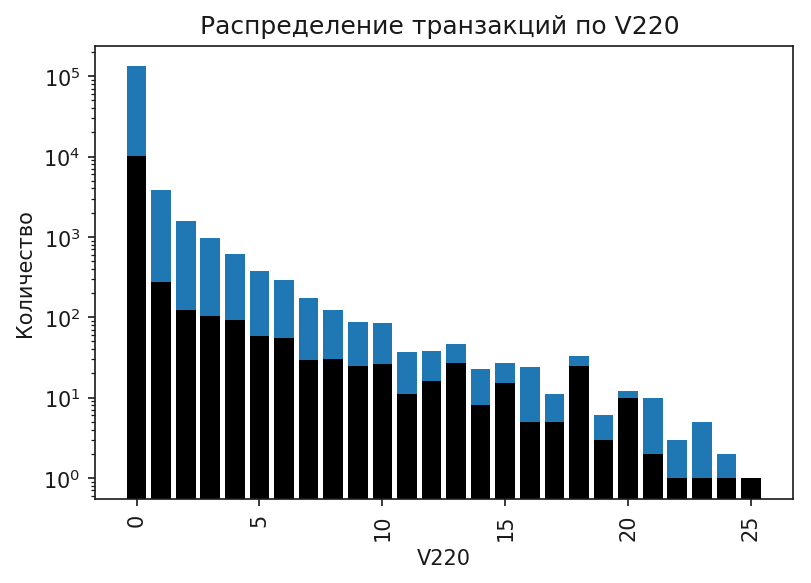

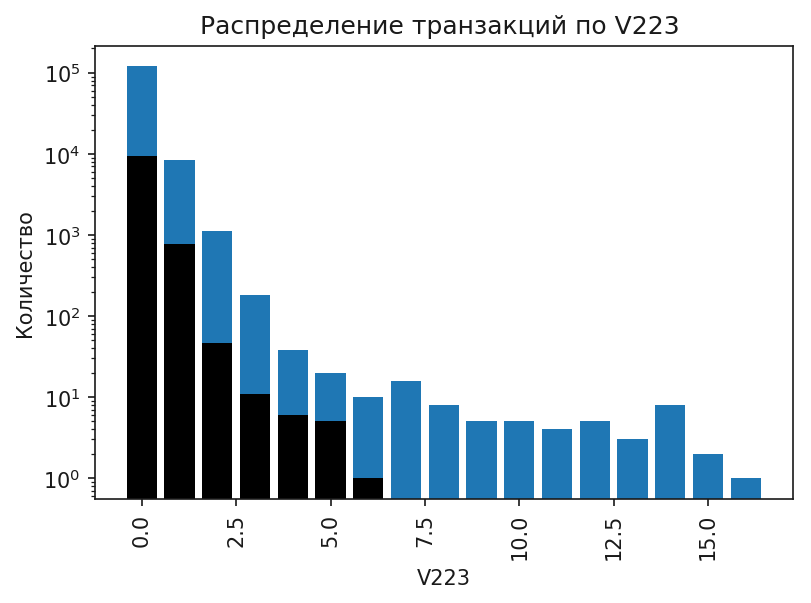

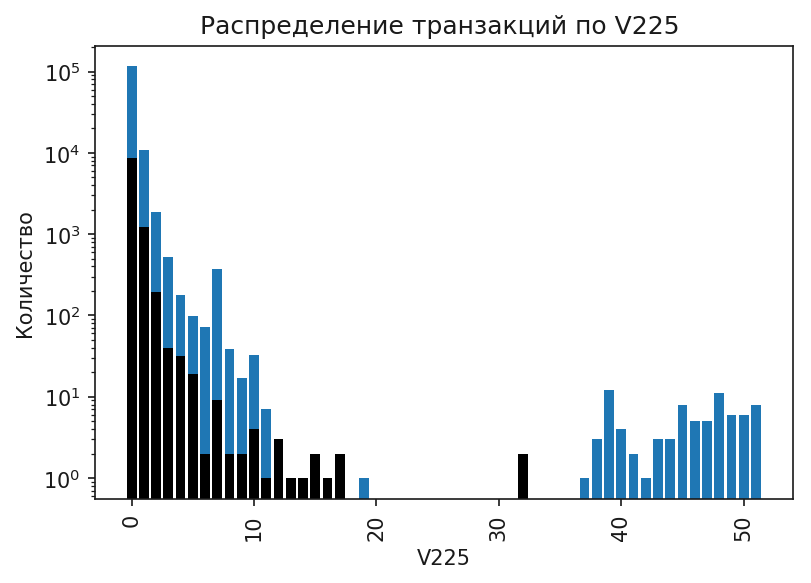

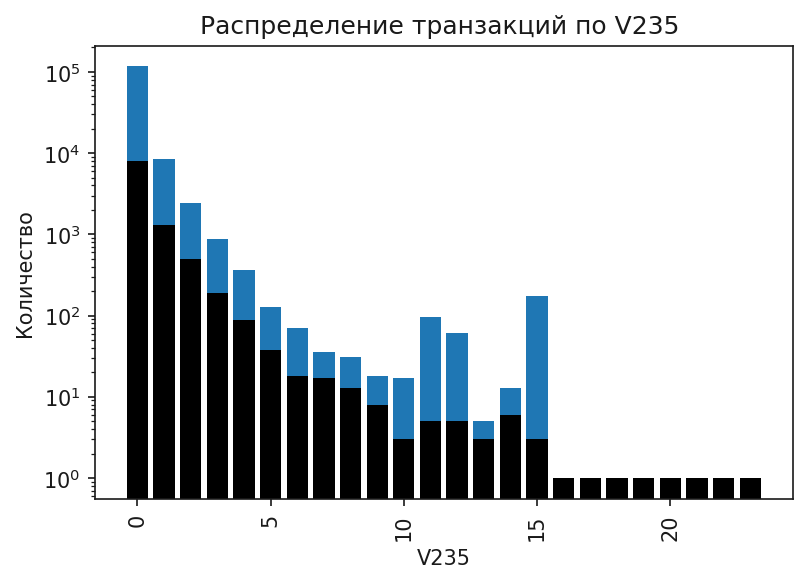

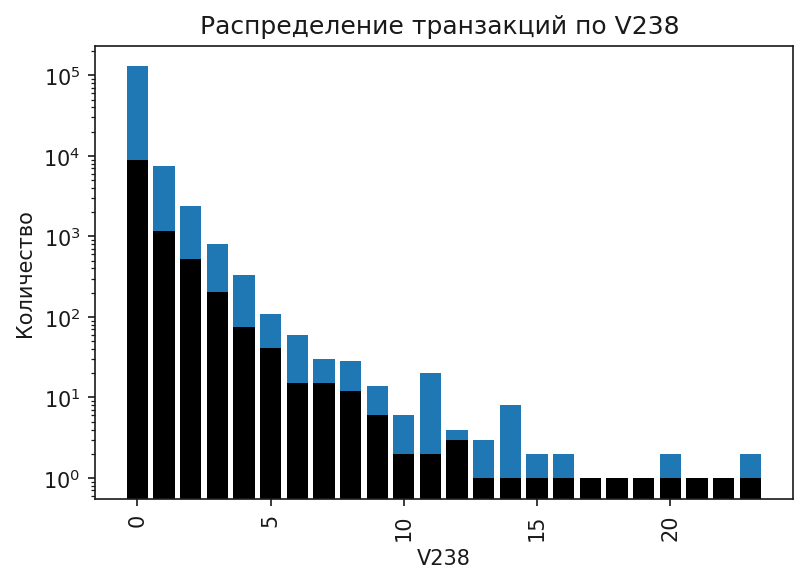

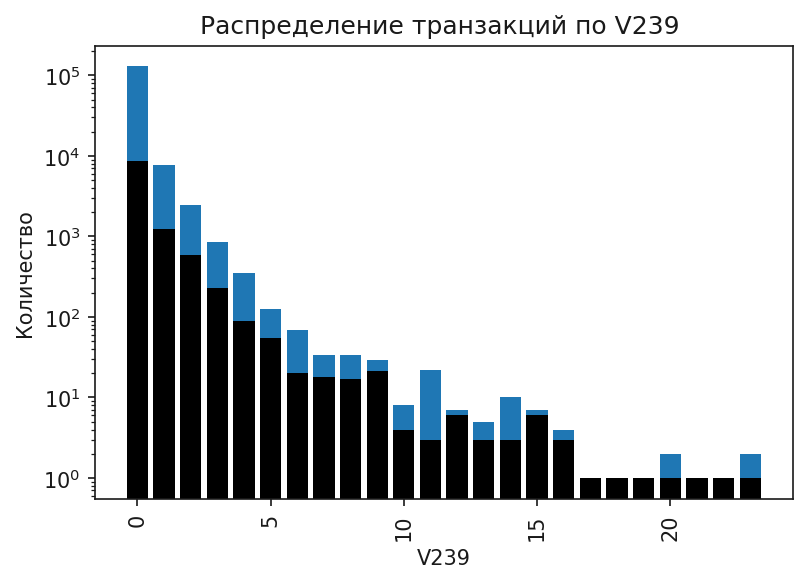

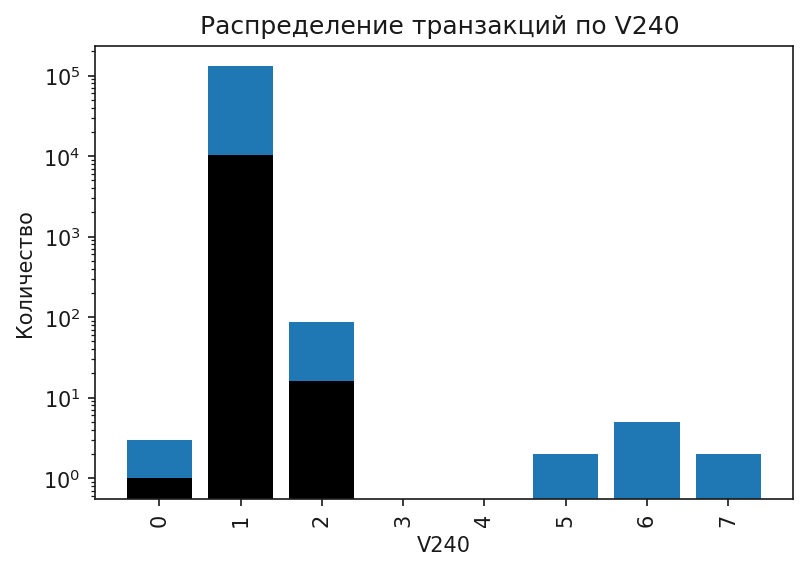

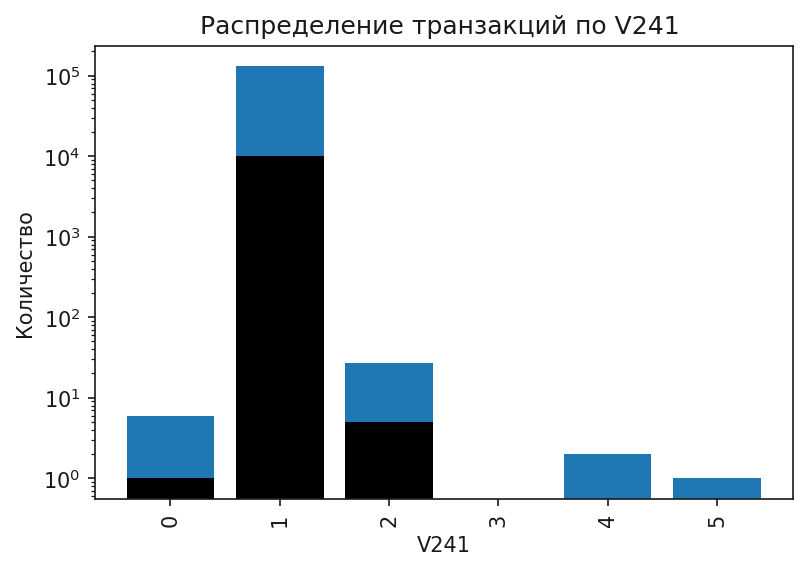

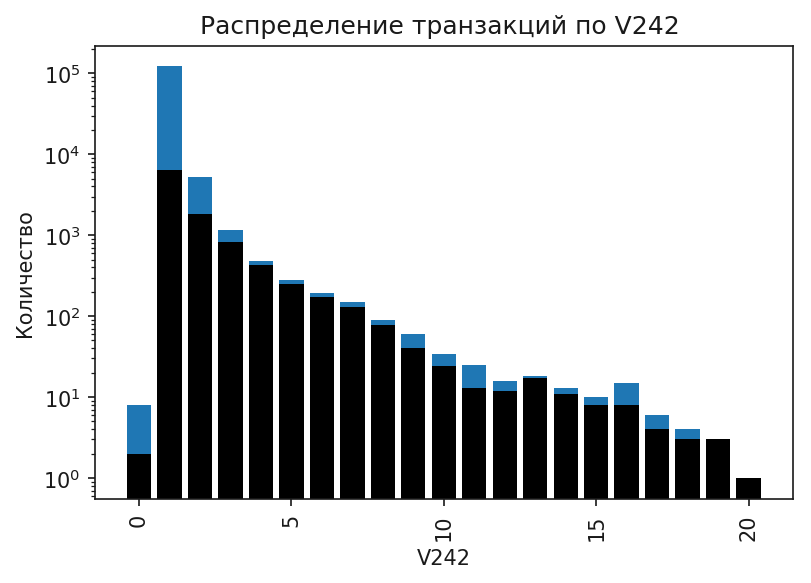

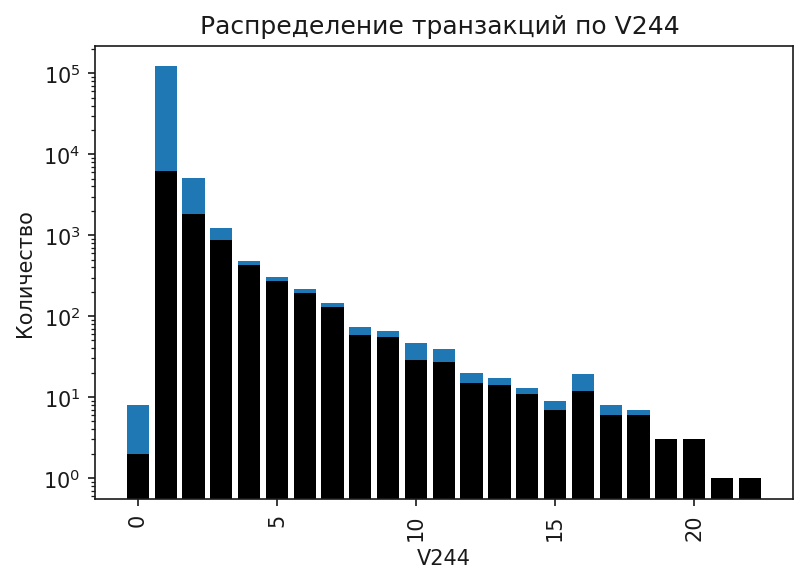

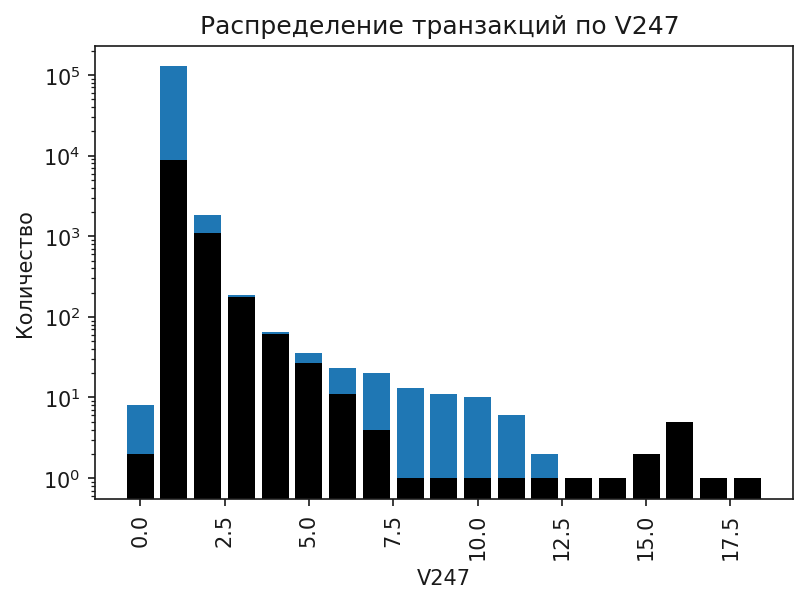

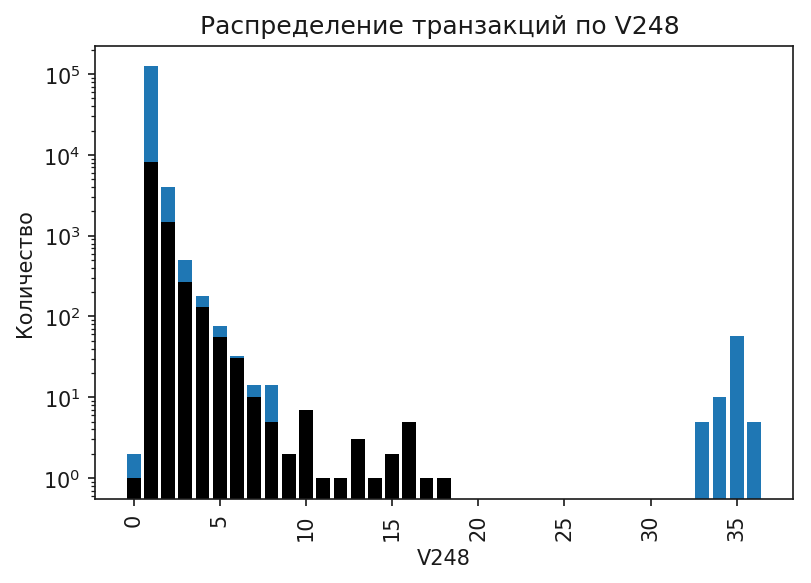

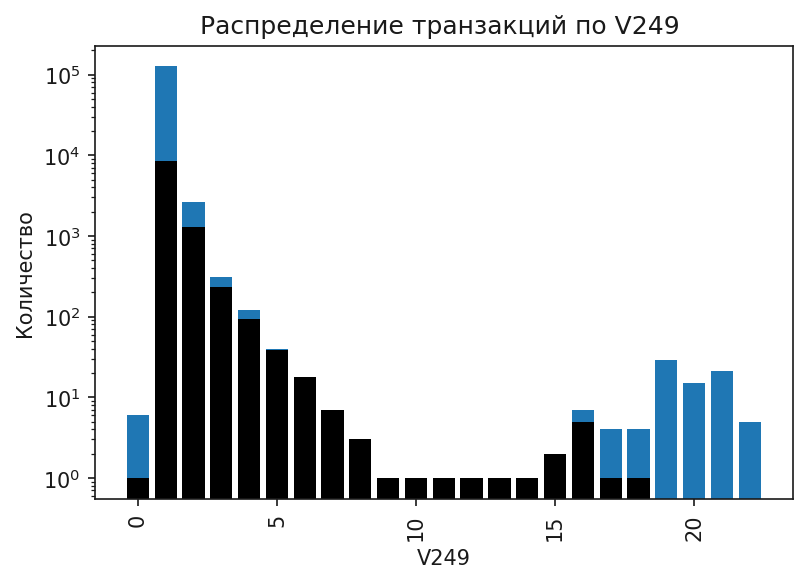

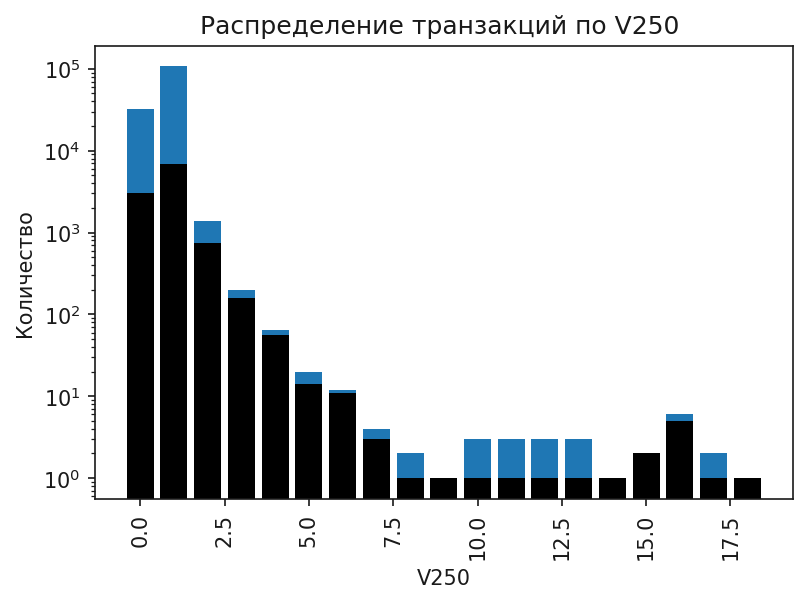

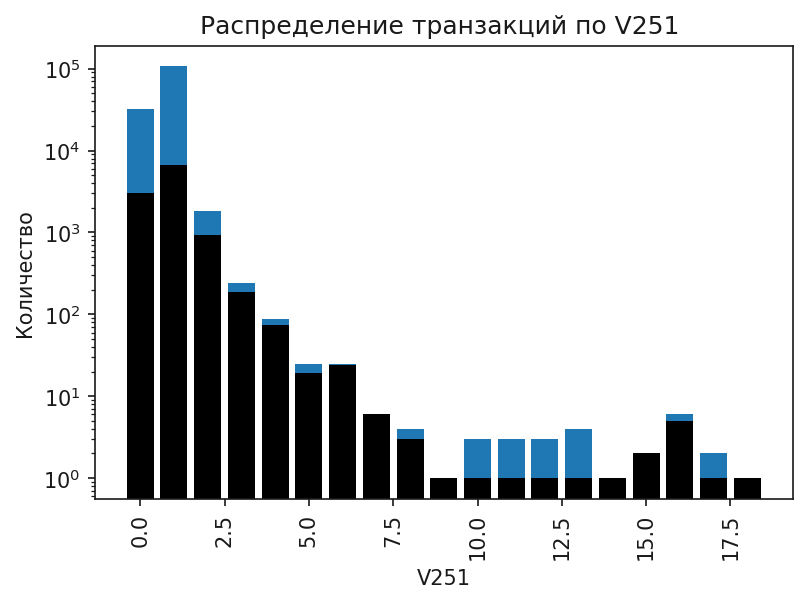

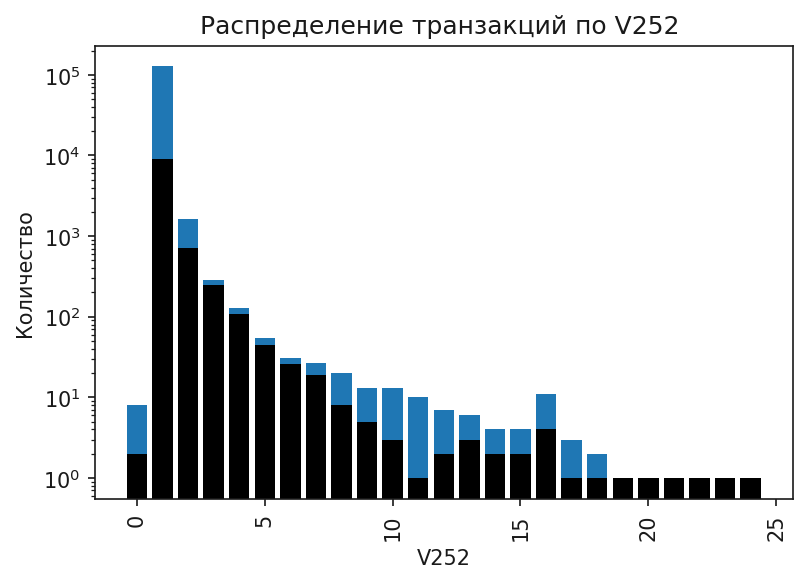

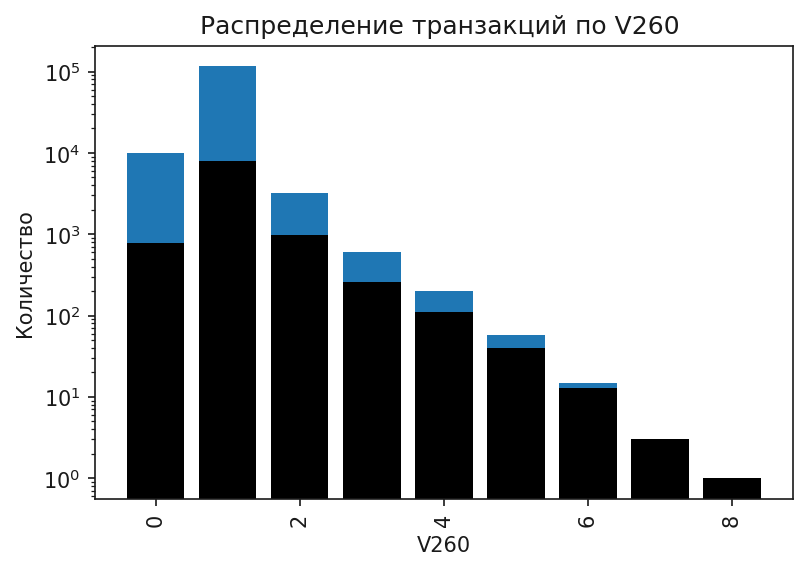

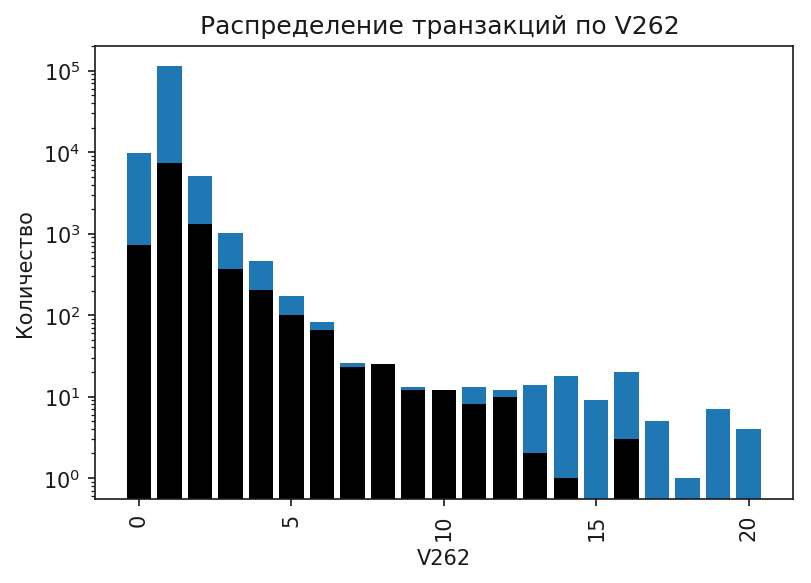

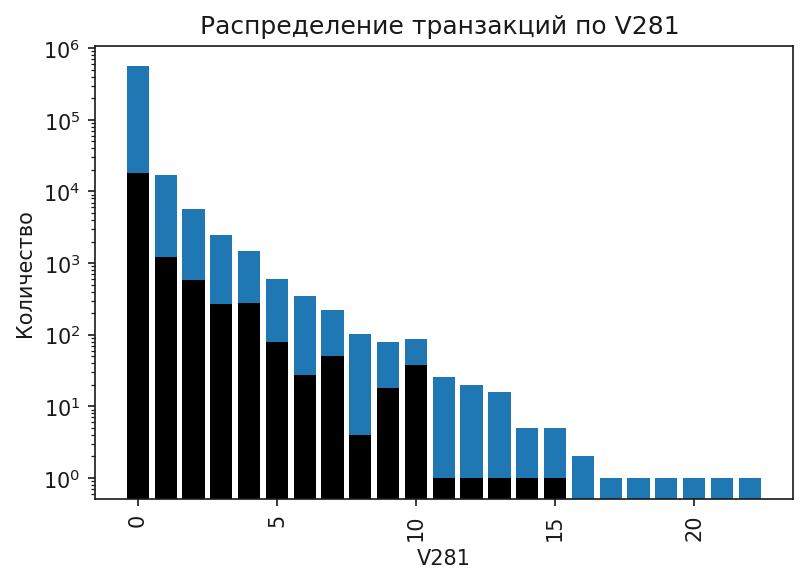

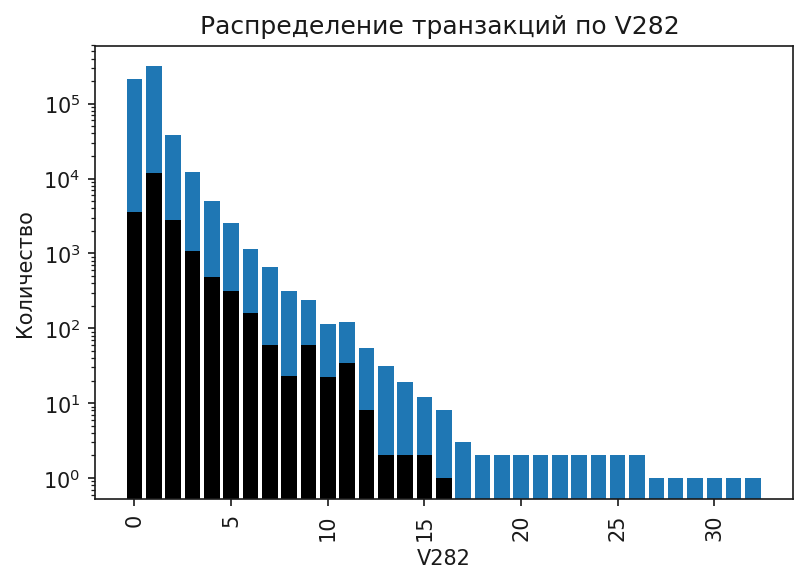

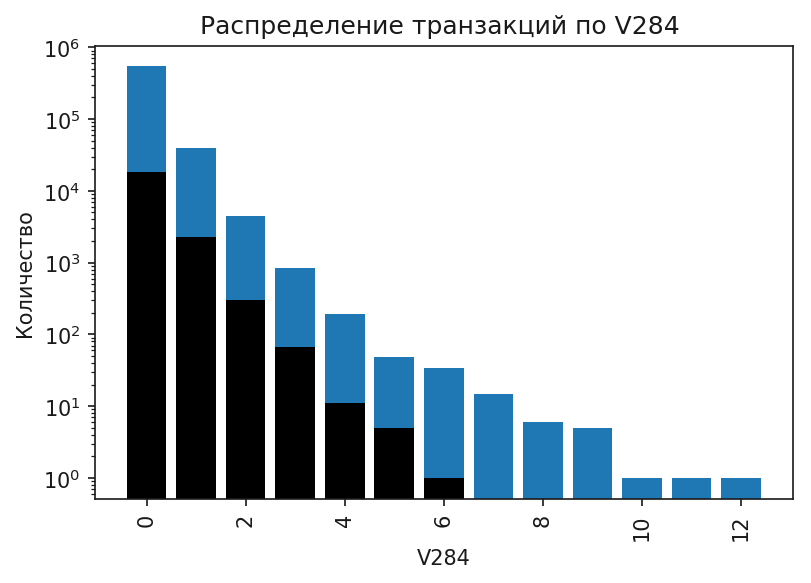

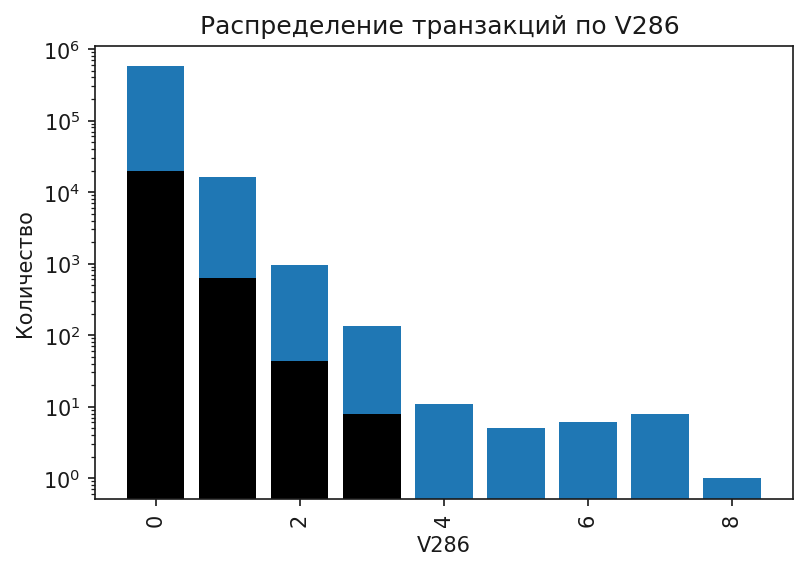

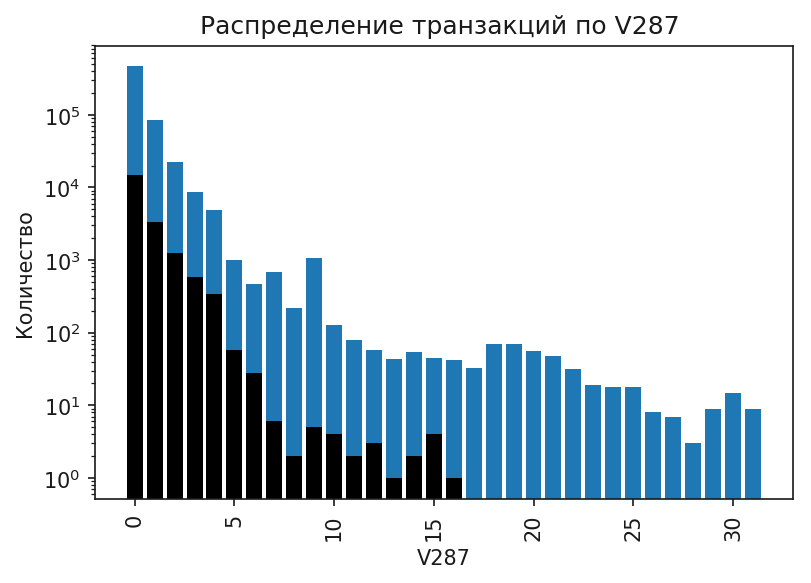

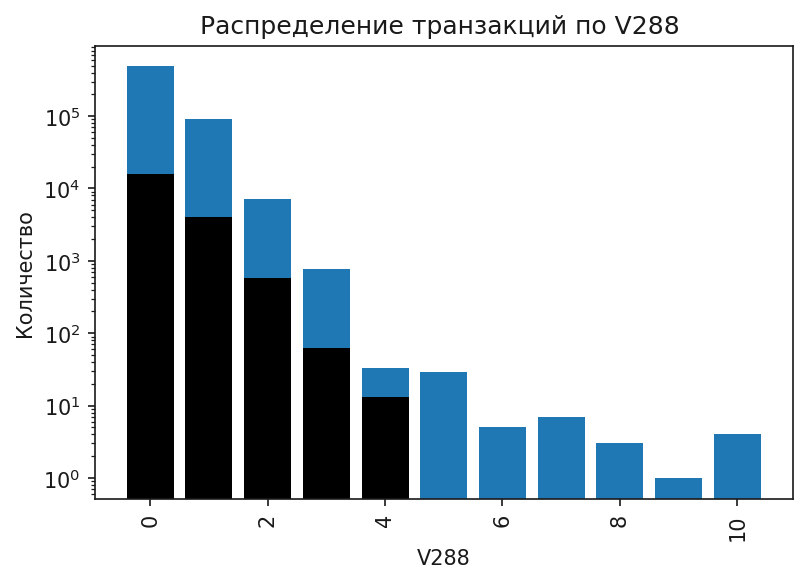

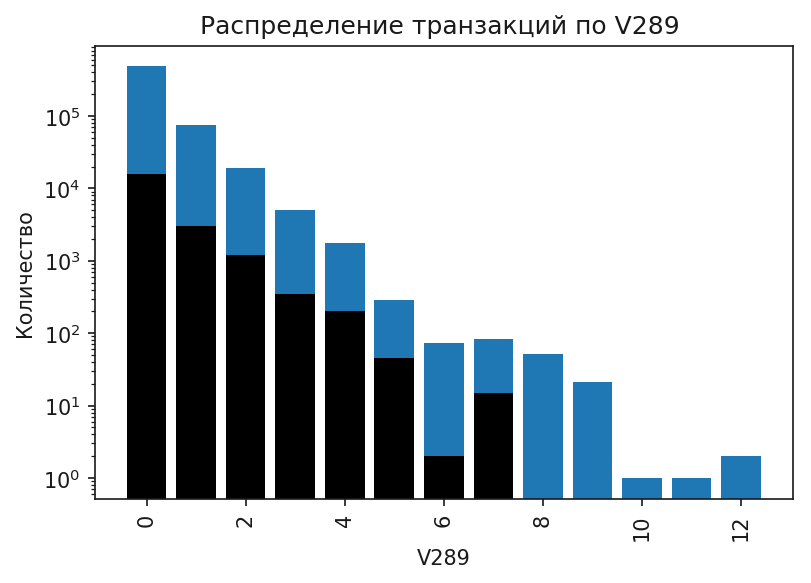

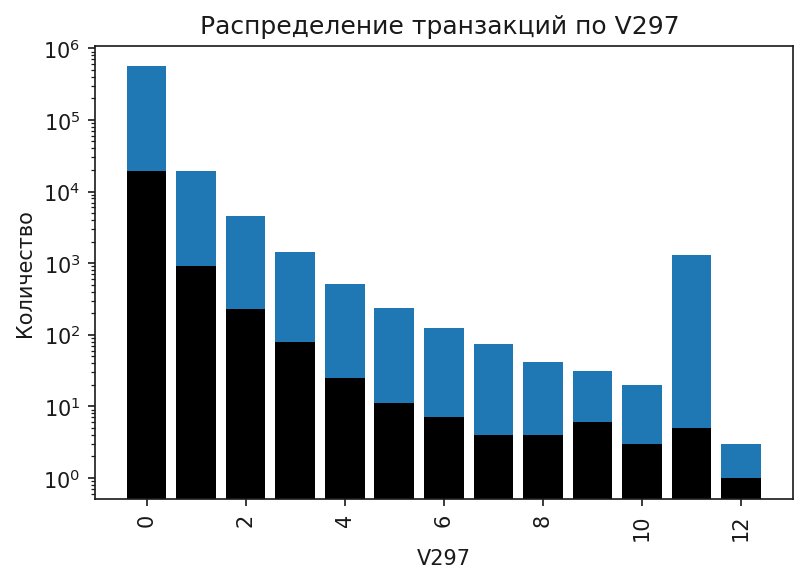

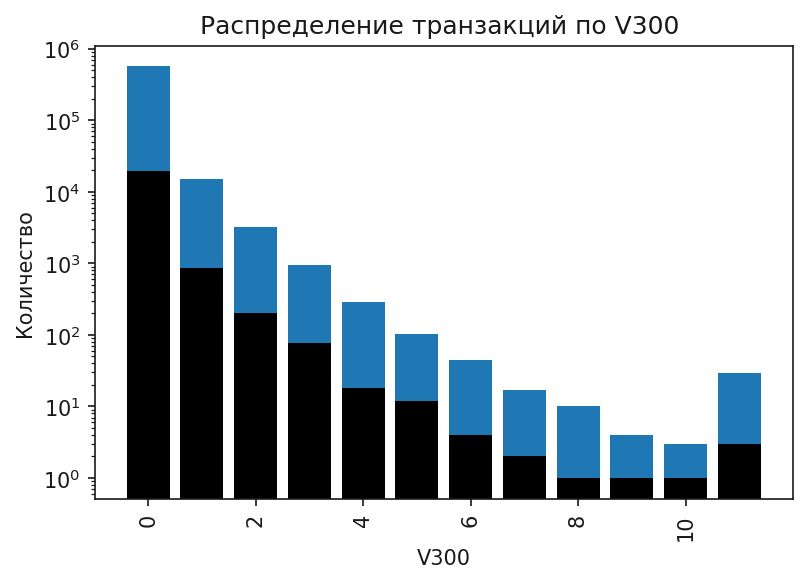

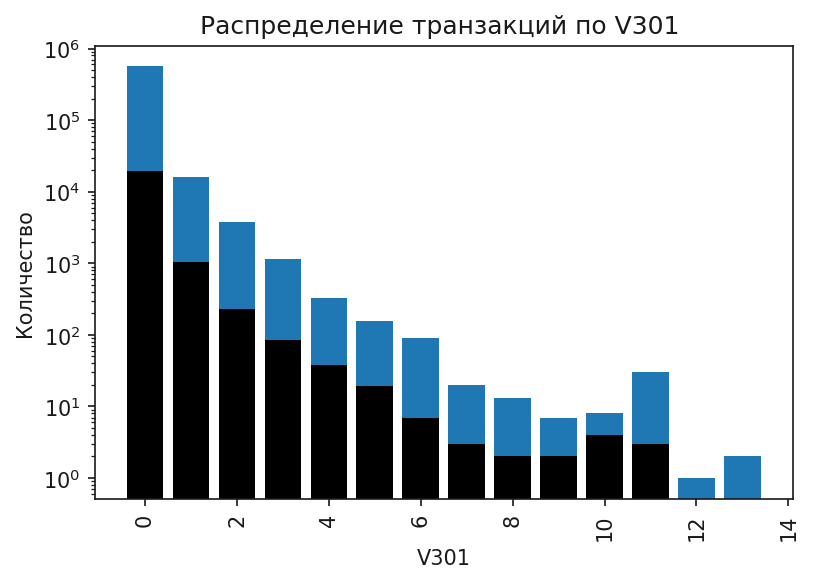

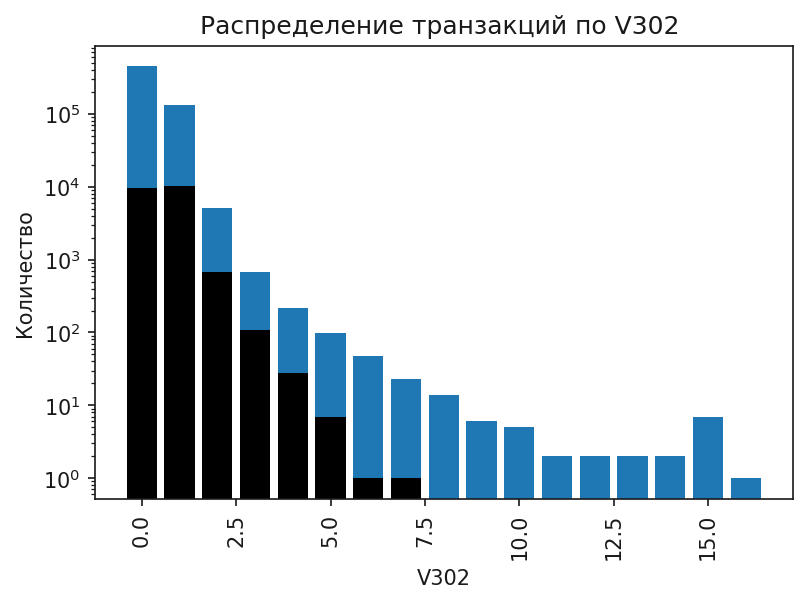

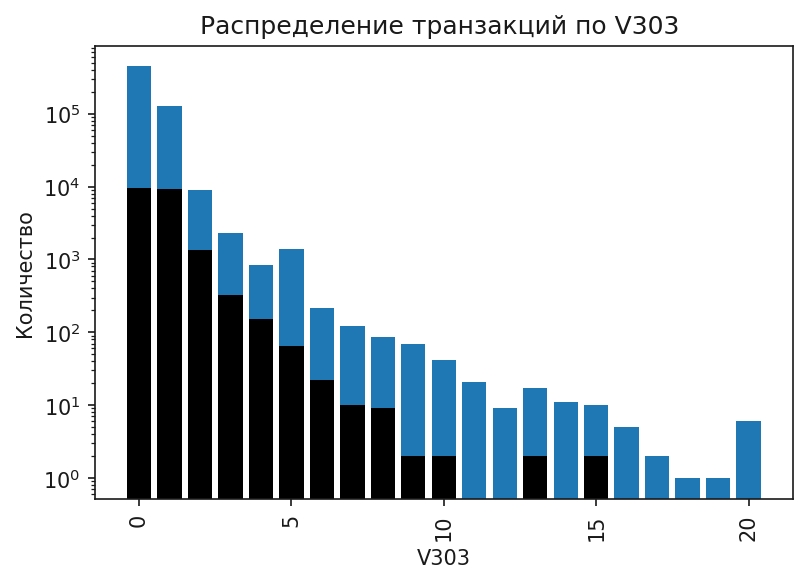

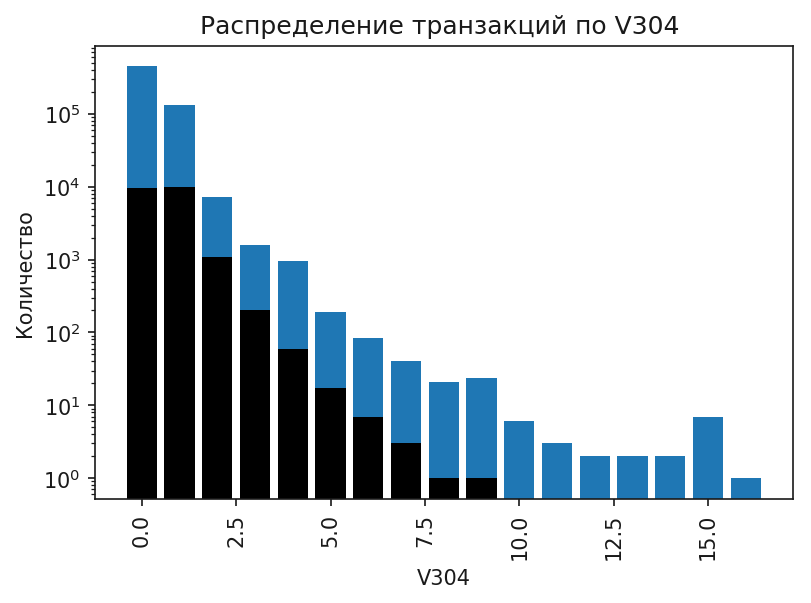

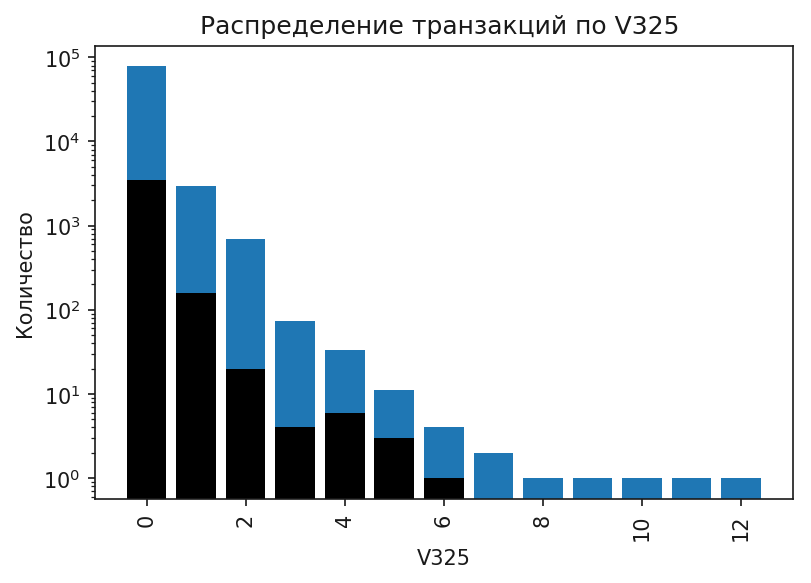

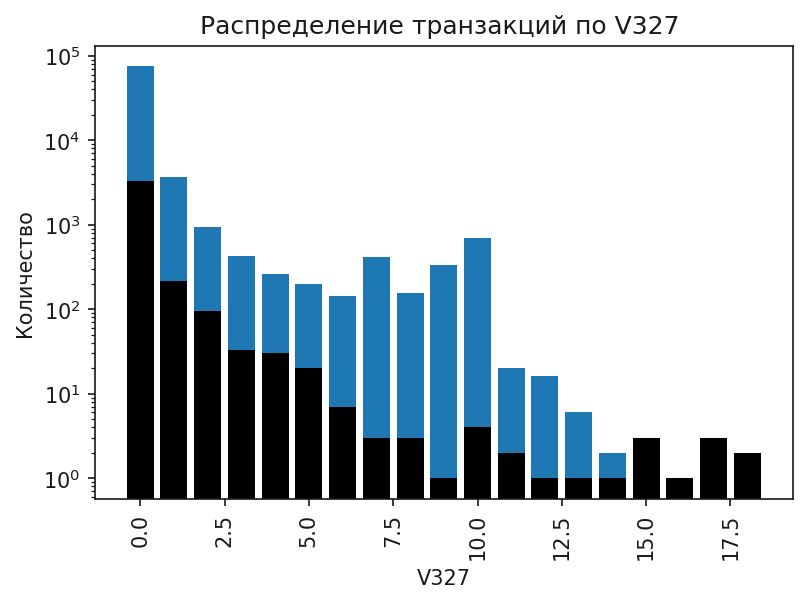

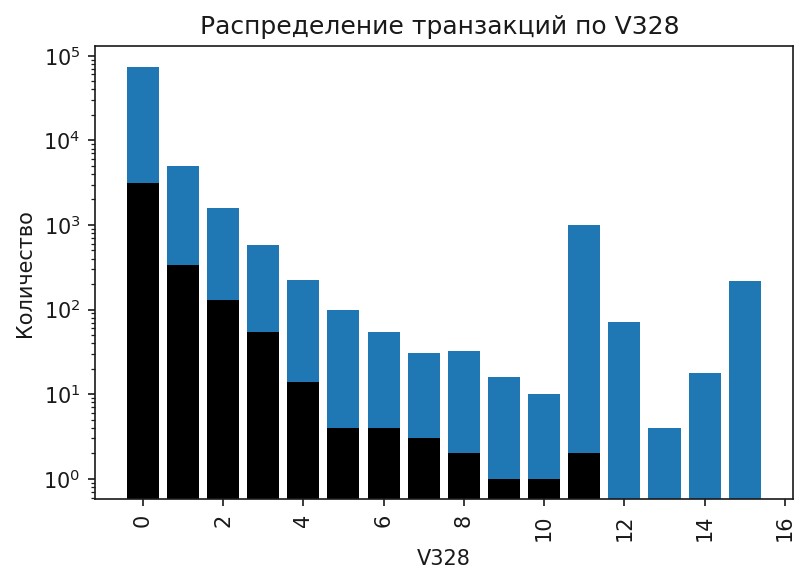

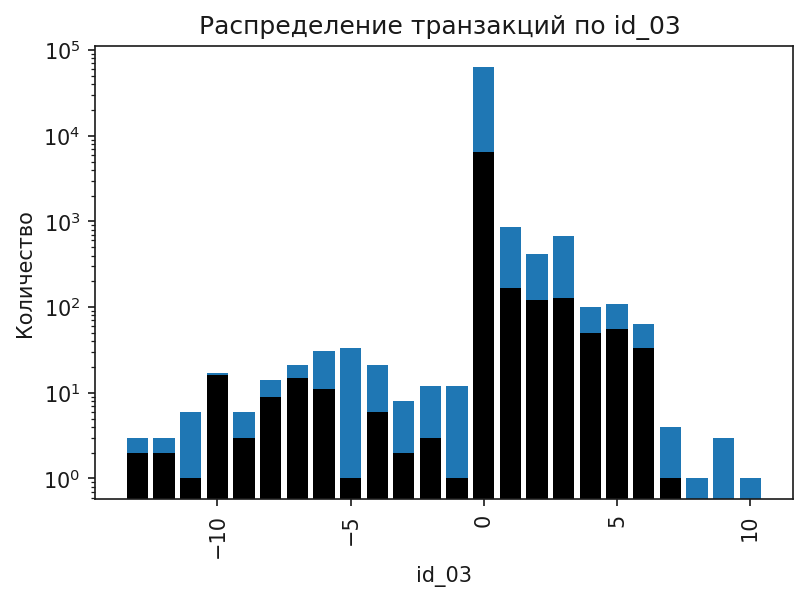

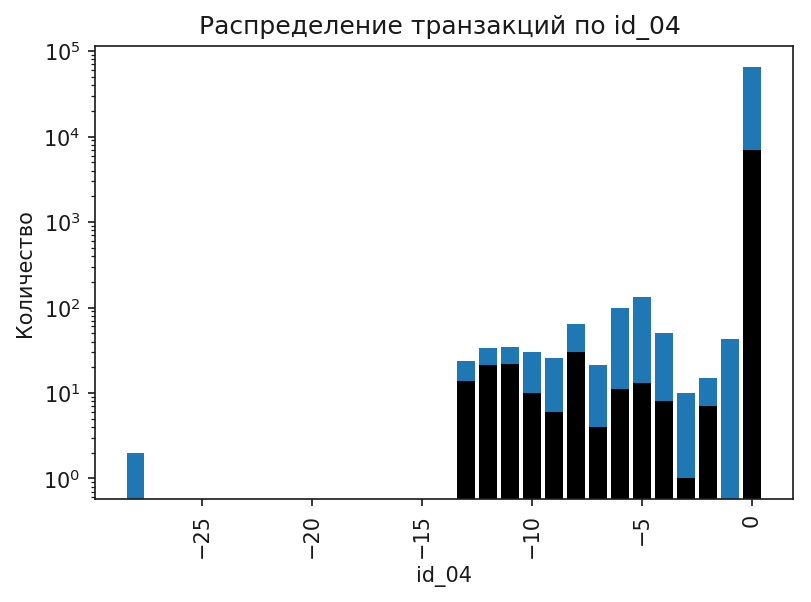

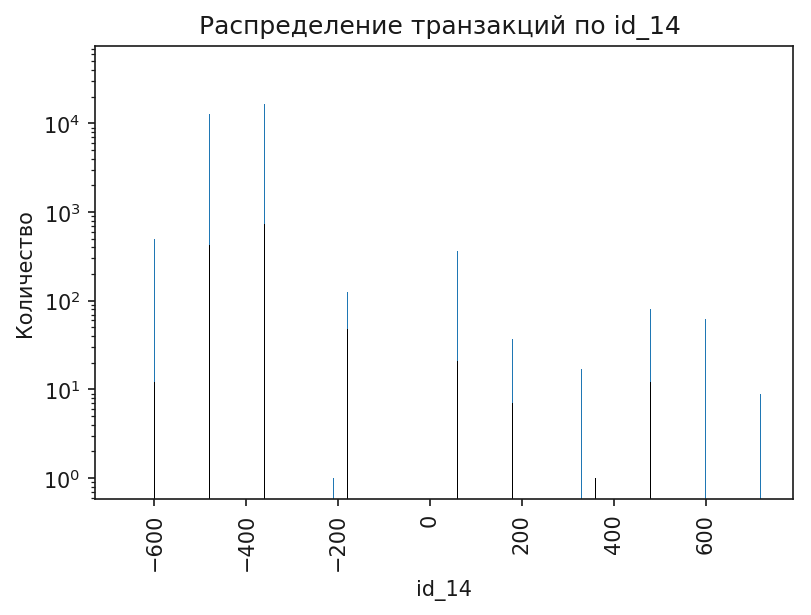

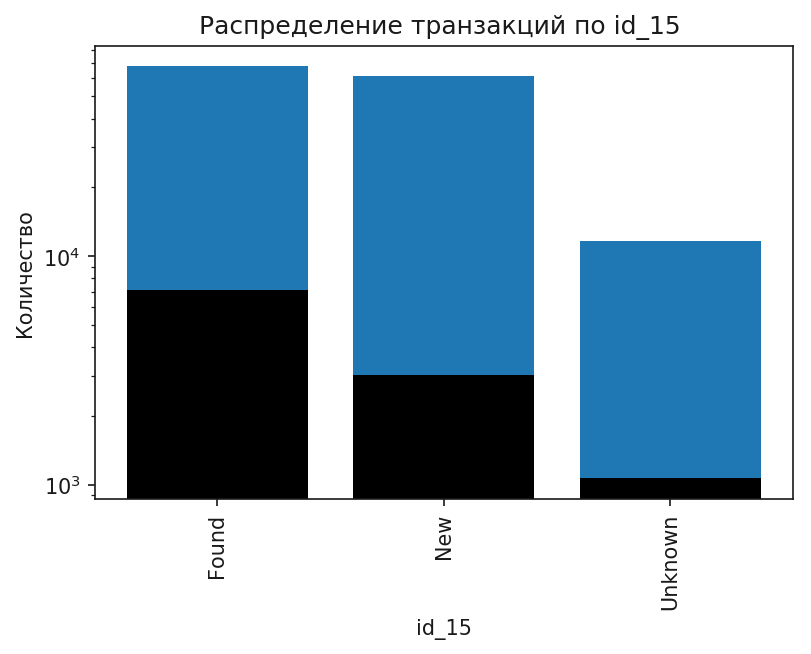

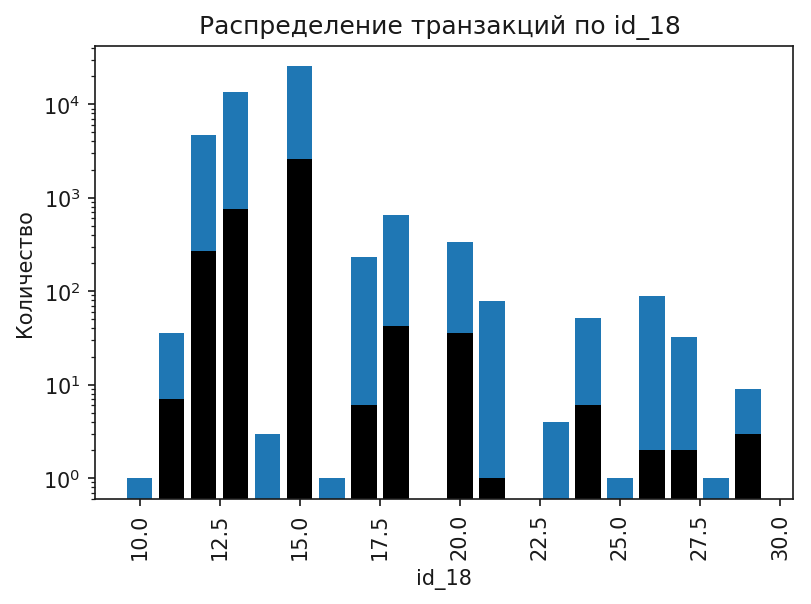

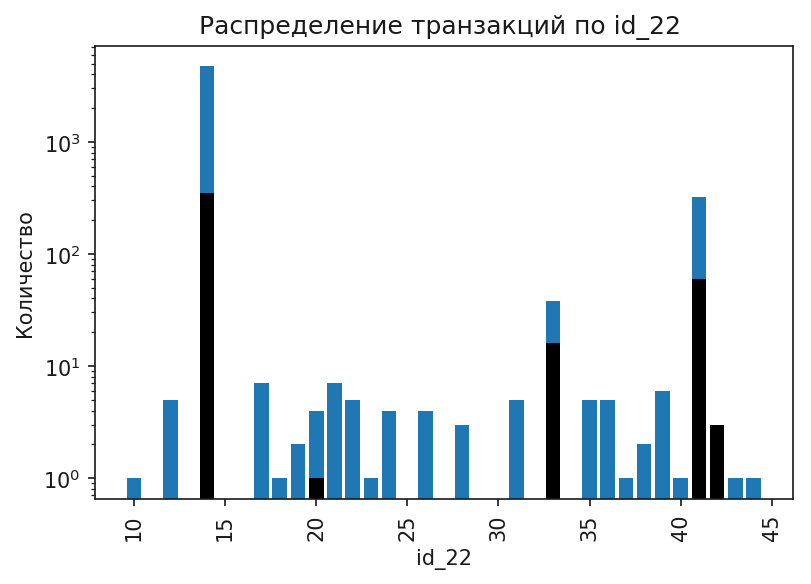

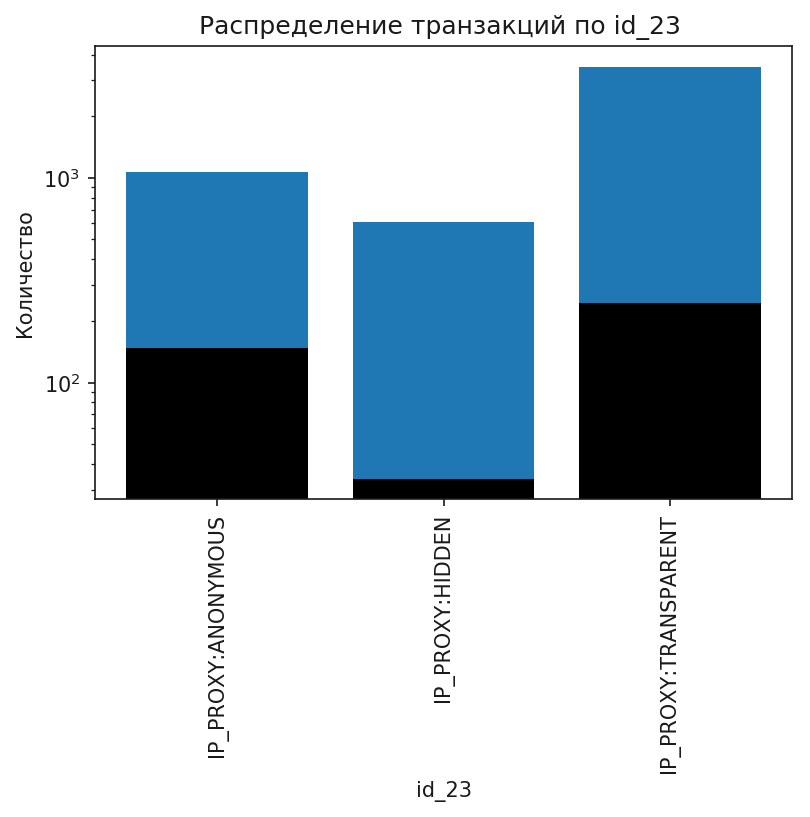

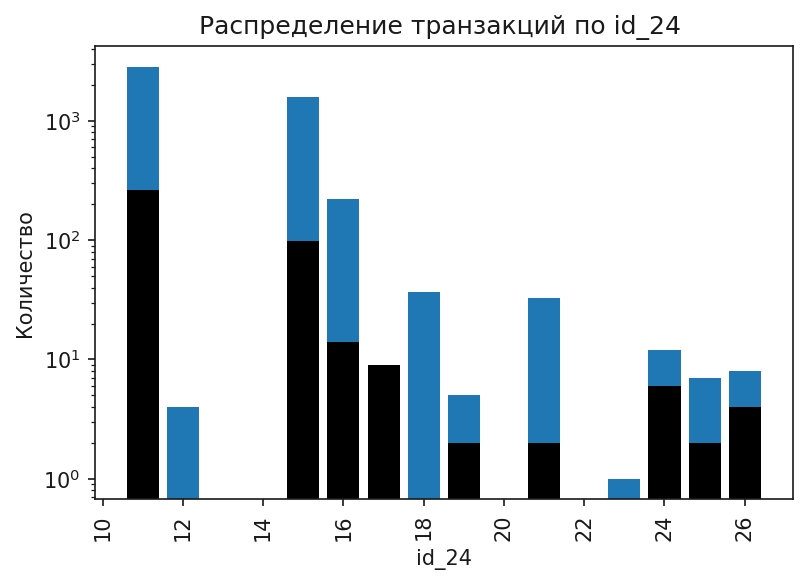

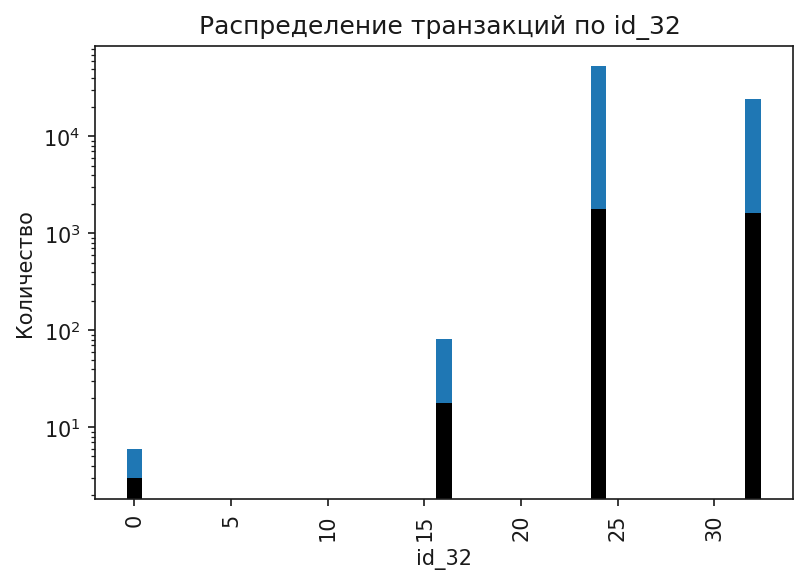

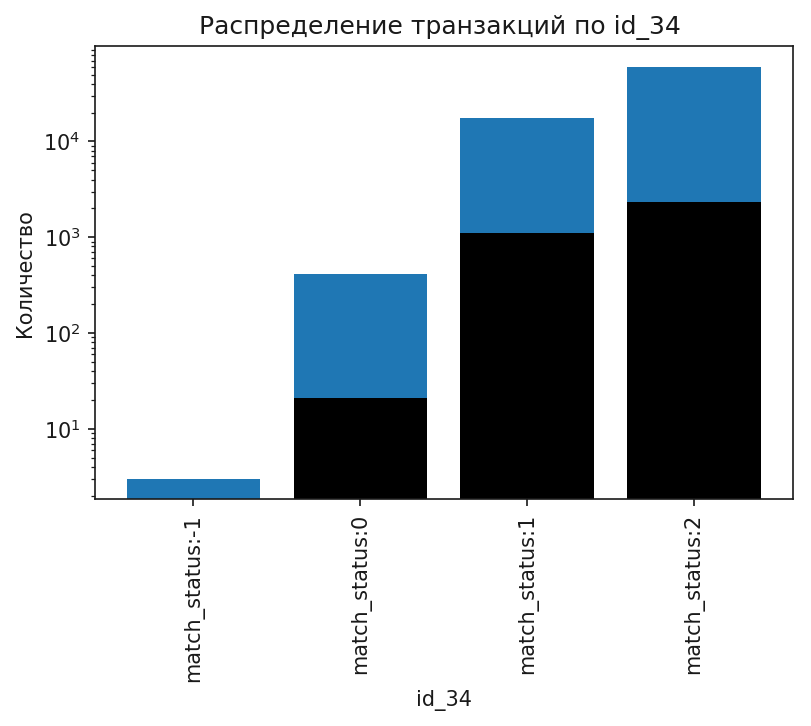

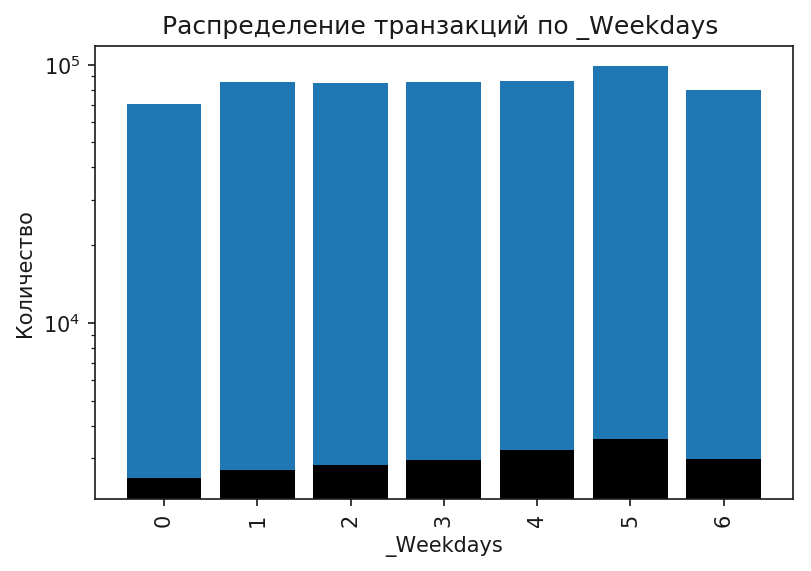

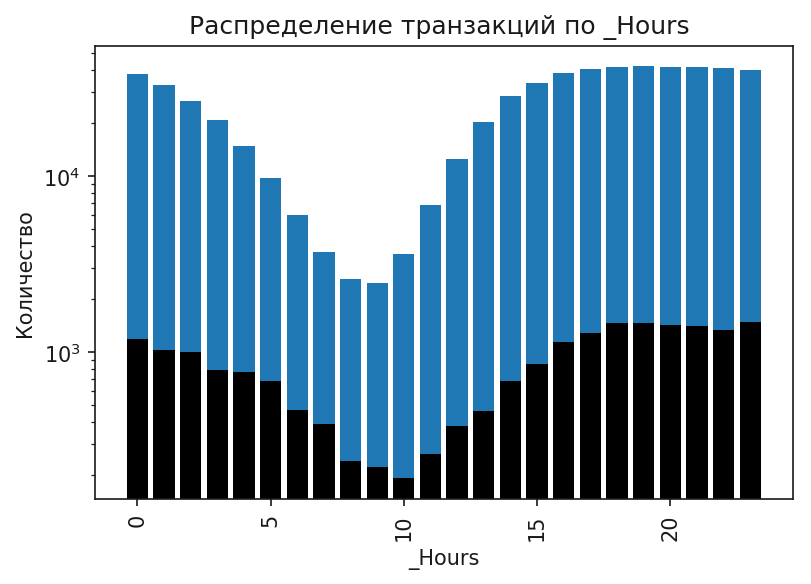

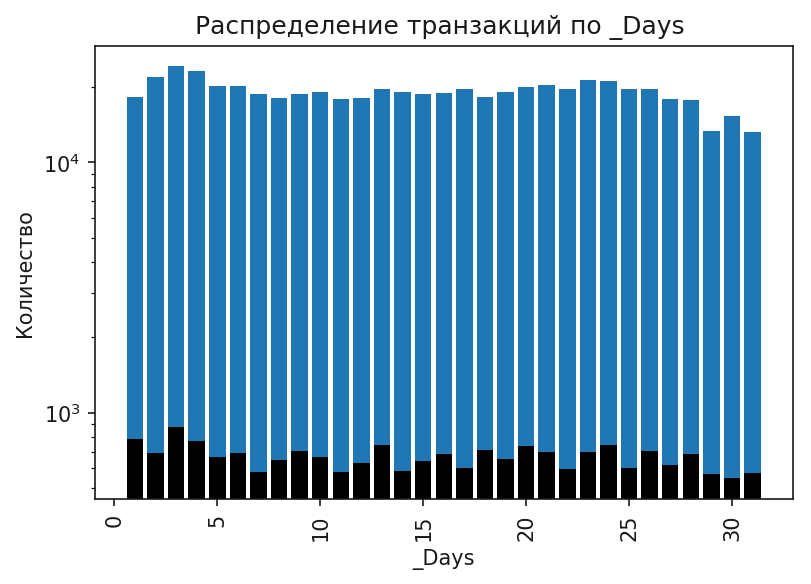

In [98]:
for col in many_uniques:
    f = plotting_bar_plot_for_dates(train, col, logscale=True);
    plt.savefig(f'plots/dist_{col}.png', bbox_inches='tight')
    del f

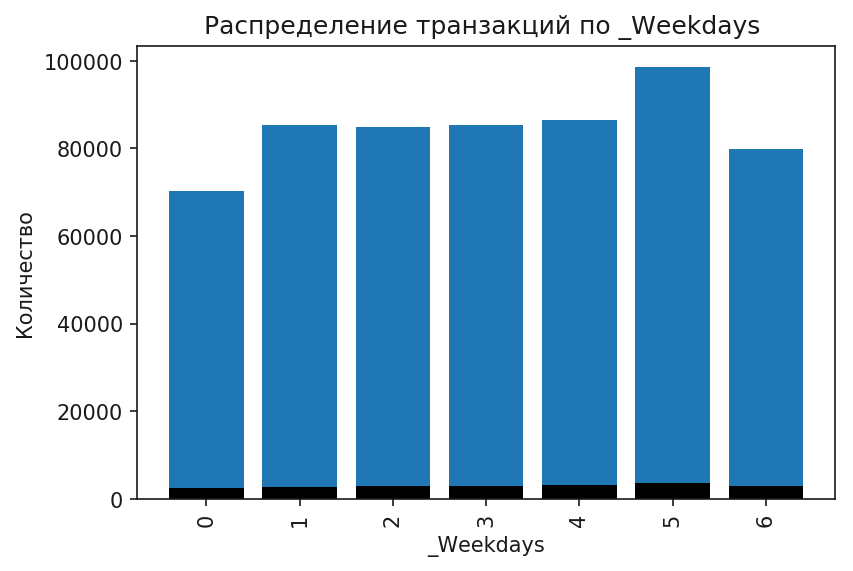

In [99]:
plotting_bar_plot_for_dates(train,'_Weekdays');

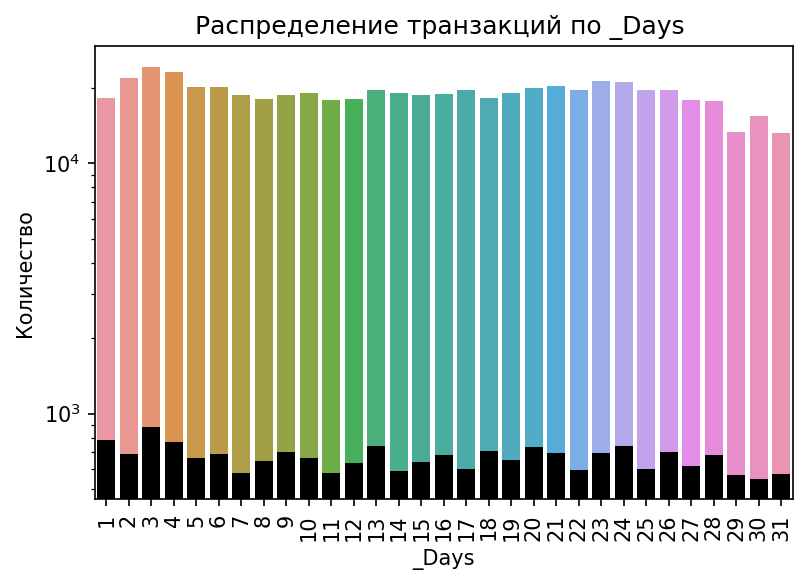

In [185]:
plotting_bar_plot_for_dates(train,'_Days')

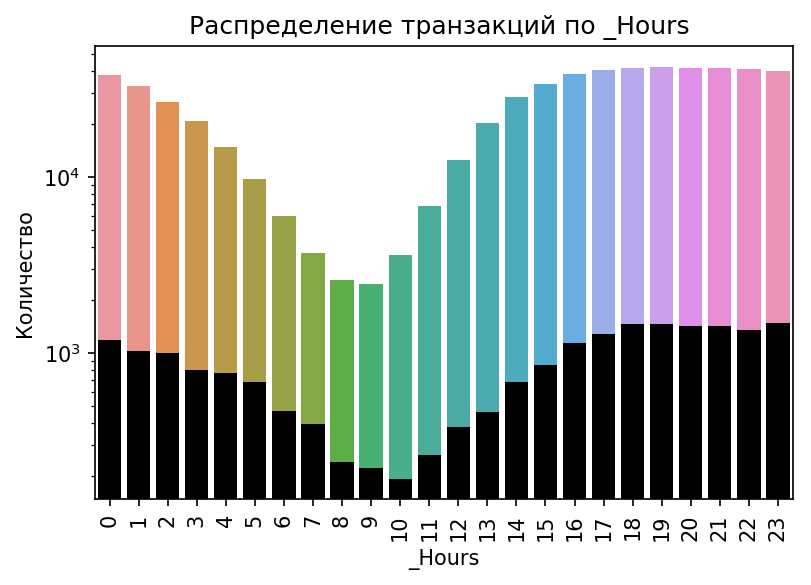

In [186]:
plotting_bar_plot_for_dates(train,'_Hours')

In [17]:
len(train.V220.dropna())

141416

In [52]:
col_many_nan = []
h = 0.86
for col in train.columns:
    if col == 'isFraud':
        continue
    if train[col].isnull().sum()/train.shape[0] > h:
        col_many_nan.append(col)
    if test[col].isnull().sum()/test.shape[0] > h and not col in col_many_nan:
        col_many_nan.append(col)
print(col_many_nan)
print(len(col_many_nan))

['dist2', 'D6', 'D7', 'D8', 'D9', 'D12', 'D13', 'D14', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_03', 'id_04', 'id_07', 'id_08', 'id_09', 'id_10', 'id_14', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_30', 'id_32', 'id_33', 'id_34']
74


In [129]:
###Заполнить Na средним значением
for col in train.drop(cat_cols, axis=1).columns:
    train[col].fillna(train[col].dropna().mean(),inplace=True)

In [132]:
for col in test.drop(cat_cols, axis=1).columns:
    test[col].fillna(test[col].dropna().mean(),inplace=True)

In [53]:
#Кодирование категориальных признаков
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(train[col].astype(str).values) + list(test[col].astype(str).values))
    train[col] = le.transform(list(train[col].astype(str).values))
    test[col] = le.transform(list(test[col].astype(str).values))

In [65]:
np.mean(train.card1)

9898.734658109526

In [64]:
train.TransactionAmt

0          68.50
1          29.00
2          59.00
3          50.00
4          50.00
           ...  
590535     49.00
590536     39.50
590537     30.95
590538    117.00
590539    279.95
Name: TransactionAmt, Length: 590540, dtype: float64

In [100]:
print(train.card1[:10])
print(train.TransactionAmt[:10])
print(train.groupby(['card1'])['TransactionAmt'].transform('mean')[:10])
print(train.TransactionAmt[:10]/train.card1[:10])

0    13926
1     2755
2     4663
3    18132
4     4497
5     5937
6    12308
7    12695
8     2803
9    17399
Name: card1, dtype: int64
0     68.5
1     29.0
2     59.0
3     50.0
4     50.0
5     49.0
6    159.0
7    422.5
8     15.0
9    117.0
Name: TransactionAmt, dtype: float64
0    351.931163
1    234.292753
2     97.015542
3    123.416340
4     96.972222
5    134.071429
6    101.880097
7    141.144645
8    142.683409
9    122.020491
Name: TransactionAmt, dtype: float64
0    0.004919
1    0.010526
2    0.012653
3    0.002758
4    0.011119
5    0.008253
6    0.012918
7    0.033281
8    0.005351
9    0.006725
dtype: float64


In [95]:
train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt  ProductCD  card1  \
0        2987000        0          86400            68.5          4  13926   
1        2987001        0          86401            29.0          4   2755   
2        2987002        0          86469            59.0          4   4663   
3        2987003        0          86499            50.0          4  18132   
4        2987004        0          86506            50.0          1   4497   

   card2  card3  card4  card5  card6  addr1  addr2  dist1  P_emaildomain  \
0    NaN  150.0      1  142.0      1  315.0   87.0   19.0             32   
1  404.0  150.0      2  102.0      1  325.0   87.0    NaN             16   
2  490.0  150.0      4  166.0      2  330.0   87.0  287.0             36   
3  567.0  150.0      2  117.0      2  476.0   87.0    NaN             55   
4  514.0  150.0      2  102.0      1  420.0   87.0    NaN             16   

   R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0             32  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0  0.0   
1             32  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   
2             32  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   
3             32  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0  0.0   
4             32  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   

    C13  C14     D1     D2    D3    D4   D5   D10    D11    D15  M1  M2  M3  \
0   1.0  1.0   14.0    NaN  13.0   NaN  NaN  13.0   13.0    0.0   1   1   1   
1   1.0  1.0    0.0    NaN   NaN   0.0  NaN   0.0    NaN    0.0   2   2   2   
2   1.0  1.0    0.0    NaN   NaN   0.0  NaN   0.0  315.0  315.0   1   1   1   
3  25.0  1.0  112.0  112.0   0.0  94.0  0.0  84.0    NaN  111.0   2   2   2   
4   1.0  1.0    0.0    NaN   NaN   NaN  NaN   NaN    NaN    NaN   2   2   2   

   M4  M5  M6  M7  M8  M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  \
0   2   0   1   2   2   2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
1   0   1   1   2   2   2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2   0   0   0   0   0   0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
3   0   1   0   2   2   2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4   3   2   2   2   2   2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  \
0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
2  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN   
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  \
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  1.0  1.0   
1  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
3  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

   V56  V57  V58  V59  V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  \
0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  

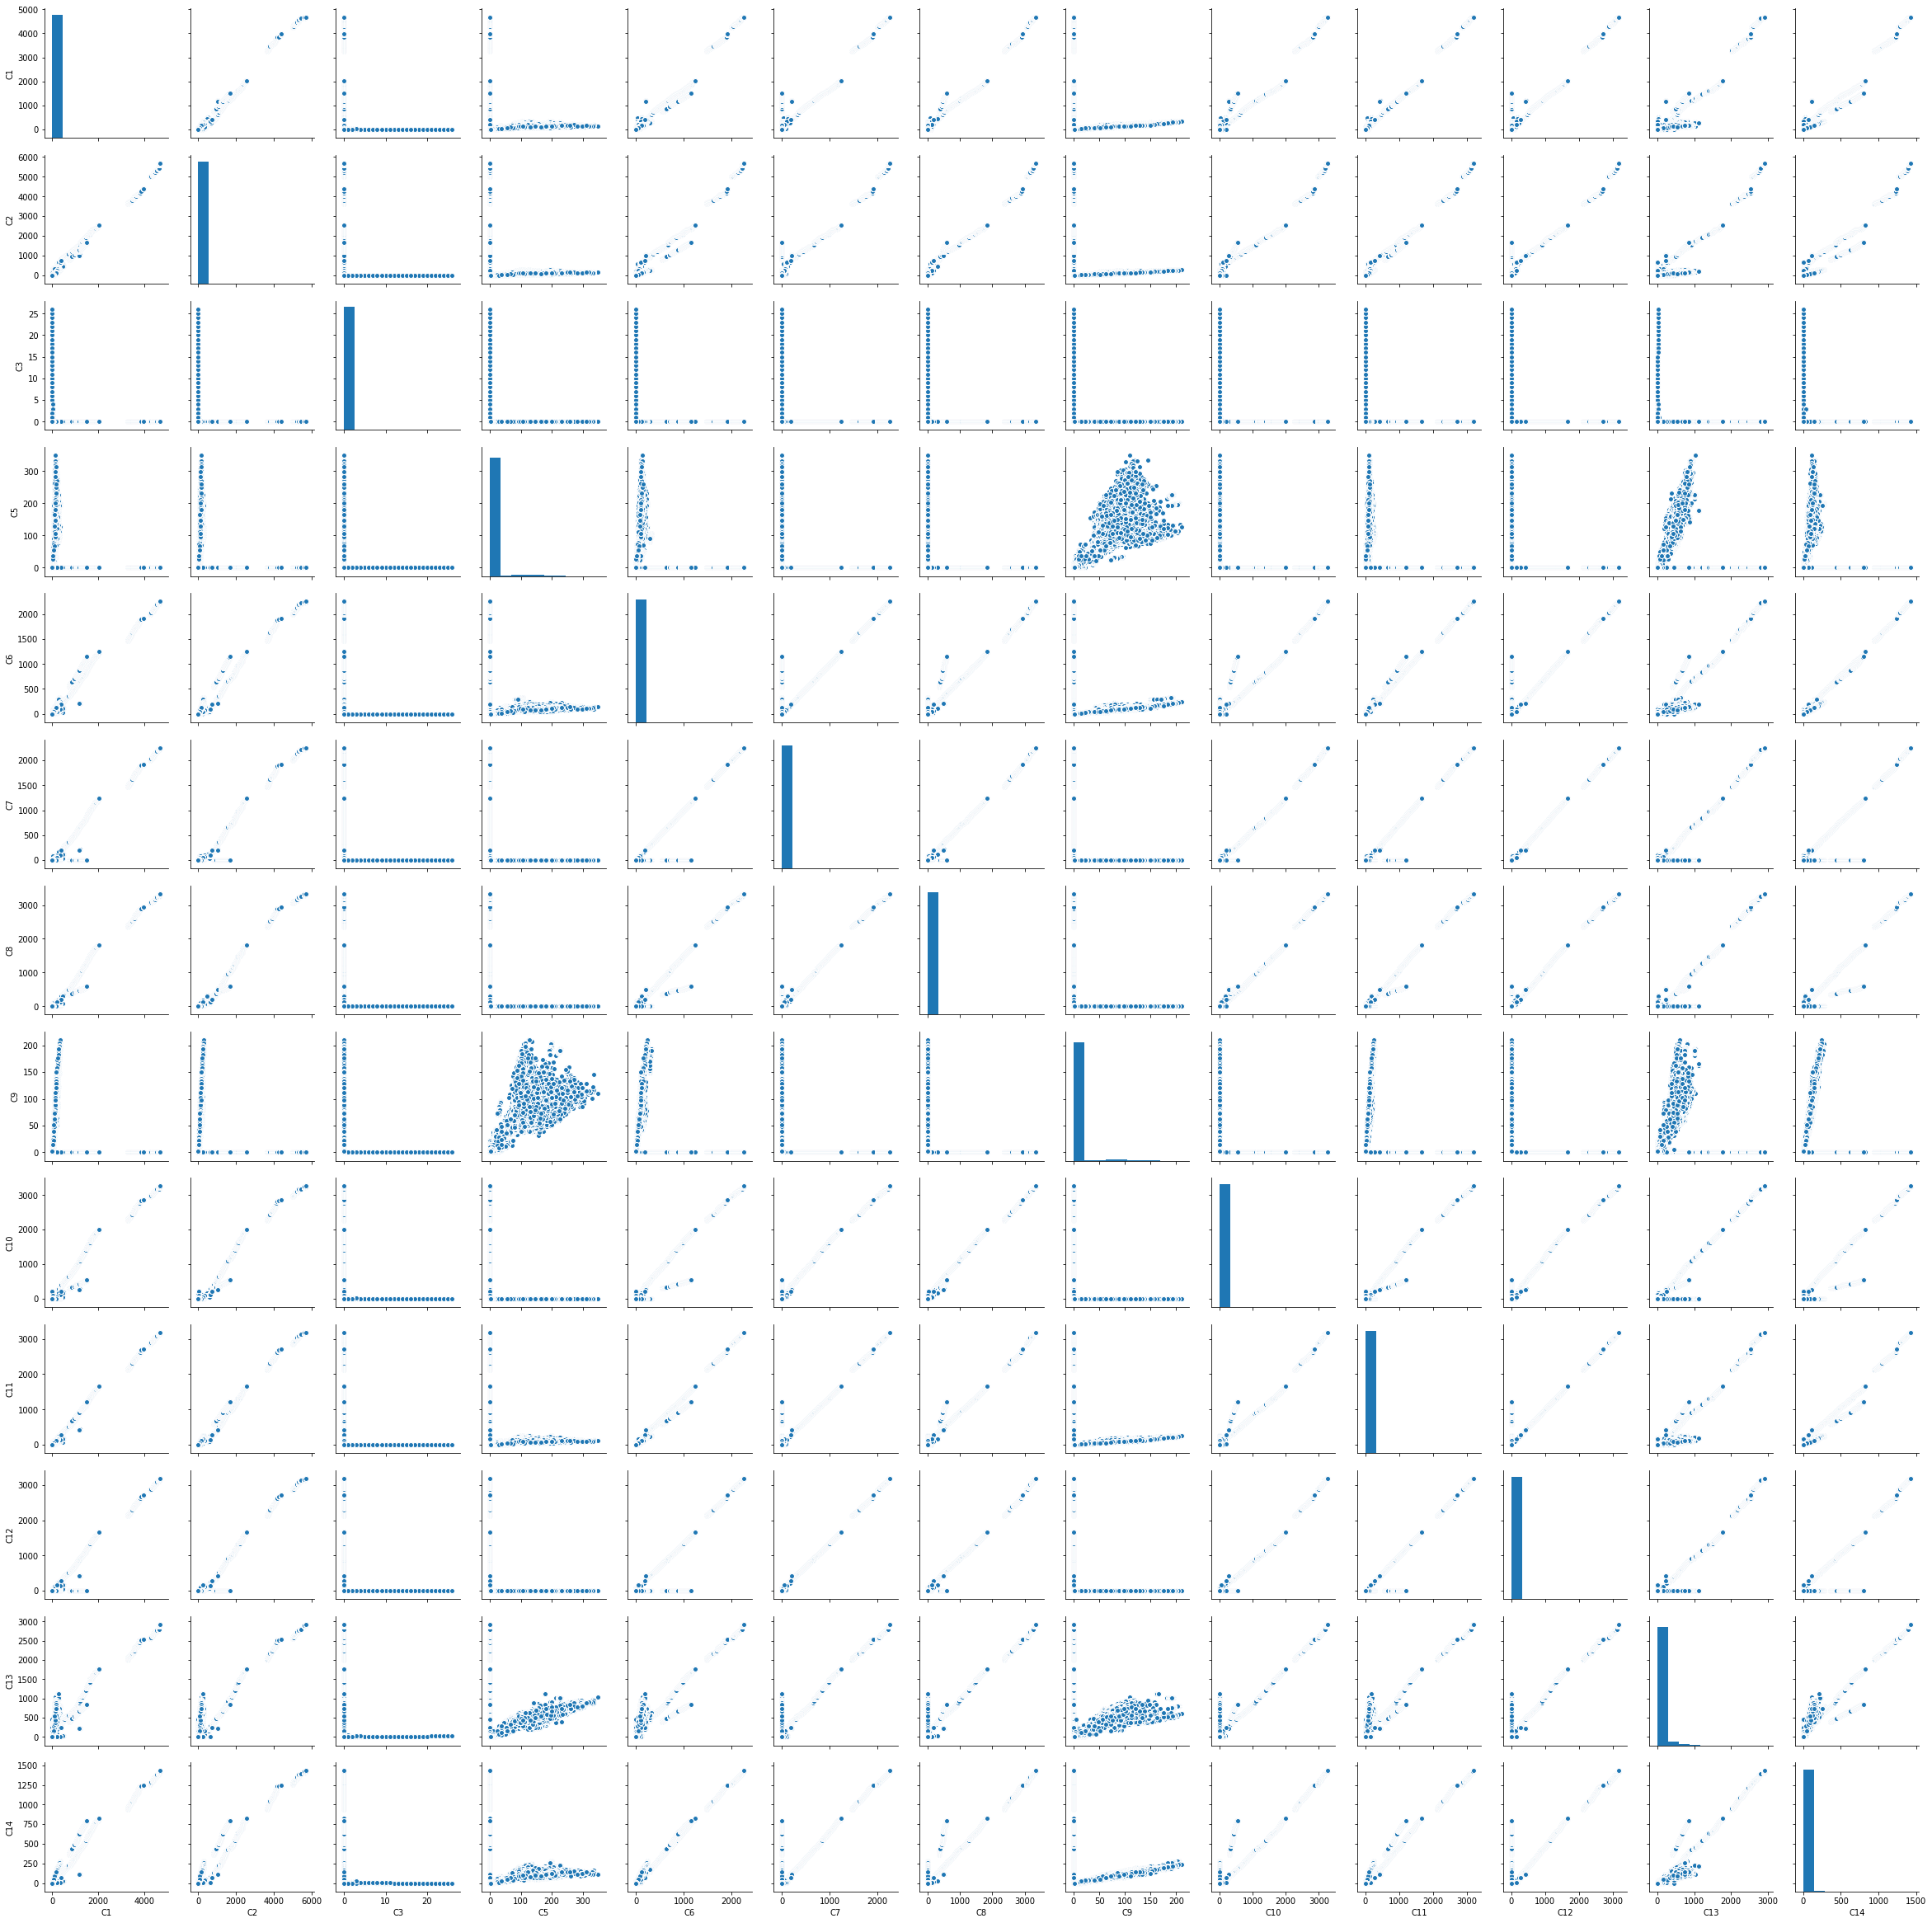

In [103]:
sns.pairplot(train[['C1','C2','C3','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']])

In [226]:
sns.__version__

'0.8.1'

In [223]:
!pip install seaboarn

  ERROR: Could not find a version that satisfies the requirement seaboarn (from versions: none)
ERROR: No matching distribution found for seaboarn
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
def plot_density_distribution2(df1,df2,features):
#     df0 = df.loc[df.isFraud == 0]
#     df1 = df.loc[df.isFraud == 1]
    N = len(features)
    fig = plt.figure(figsize=(15,N*3.5),dpi=80)
    i = 0
    for f in features:
        i += 1
        plt.subplot(N,3, i)
        sns.distplot(df1[f].values, hist = False,label='Train')
        sns.distplot(df2[f].values, hist = False,label='Test')
#         plt.xlabel(str(f))
        plt.ylabel('P')
        plt.legend()
        plt.title(f'Feature {f}',loc = 'right')
        plt.tick_params(axis='x',  labelsize=10)
        plt.tick_params(axis='y',  labelsize=10)
    plt.tight_layout()
    plt.show()
    
def plot_density_distribution(df,features):
    df0 = df.loc[df.isFraud == 0]
    df1 = df.loc[df.isFraud == 1]
    N = len(features)
    fig = plt.figure(figsize=(15,N*3.5),dpi=80)
    i = 0
    for f in features:
        i += 1
        plt.subplot(N,3, i)
        sns.sca(df0[f].values, hist = False,label='0')
        sns.distplot(df1[f].values, hist = False,label='Fraud')
#         plt.xlabel(str(f))
        plt.ylabel('P')
        plt.legend()
        plt.title(f'Feature {f}',loc = 'right')
        plt.tick_params(axis='x',  labelsize=10)
        plt.tick_params(axis='y',  labelsize=10)
    plt.tight_layout()
    plt.show()

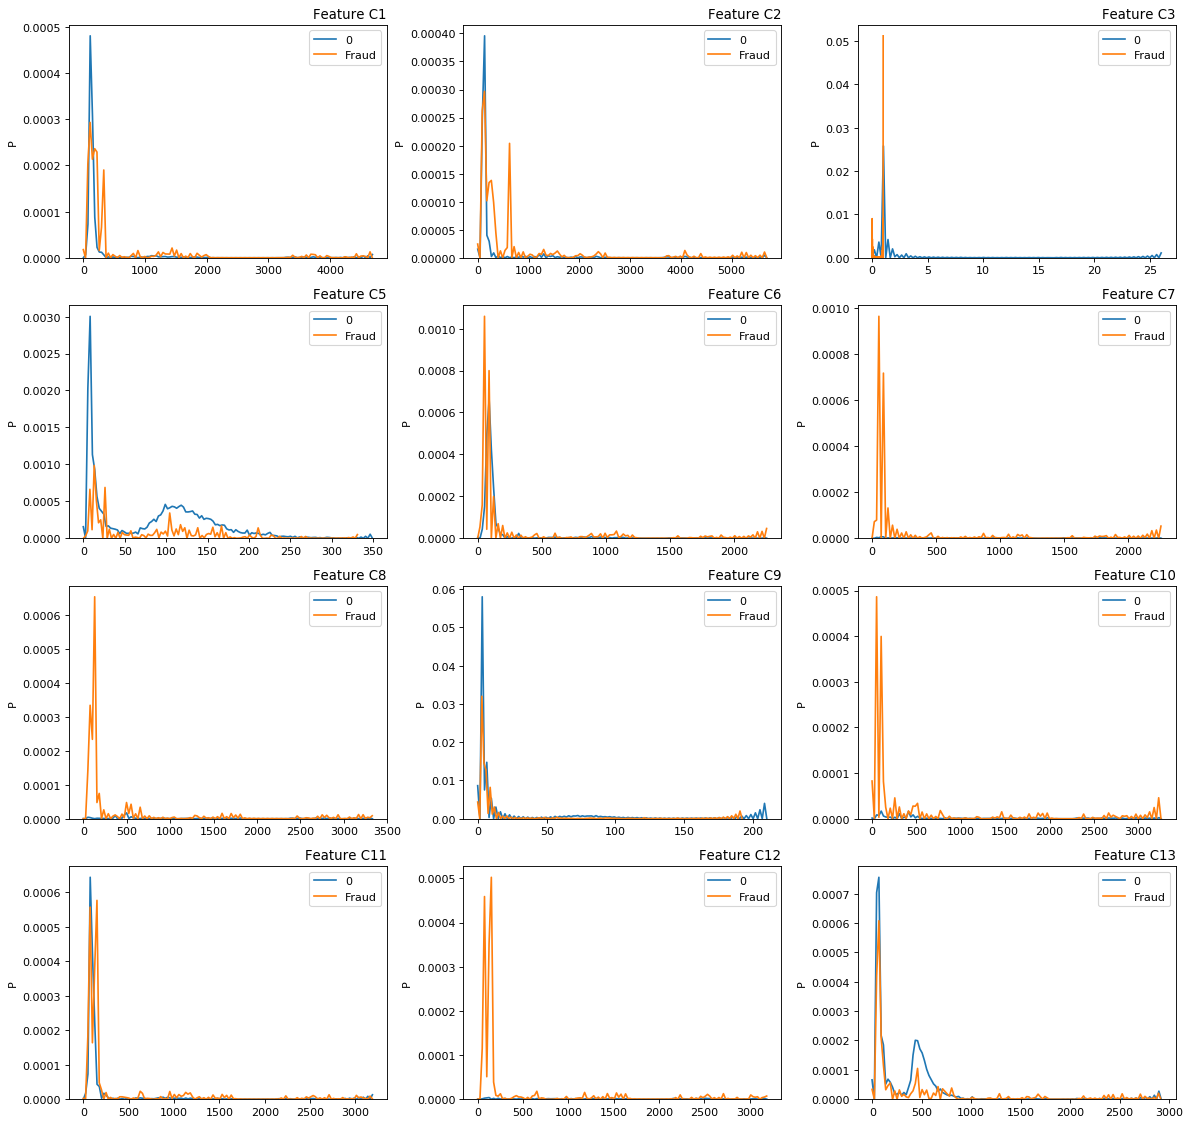

In [219]:
plot_density_distribution(train, ['C1','C2','C3','C5','C6','C7','C8','C9','C10','C11','C12','C13'])

d:\program\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
d:\program\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
d:\program\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


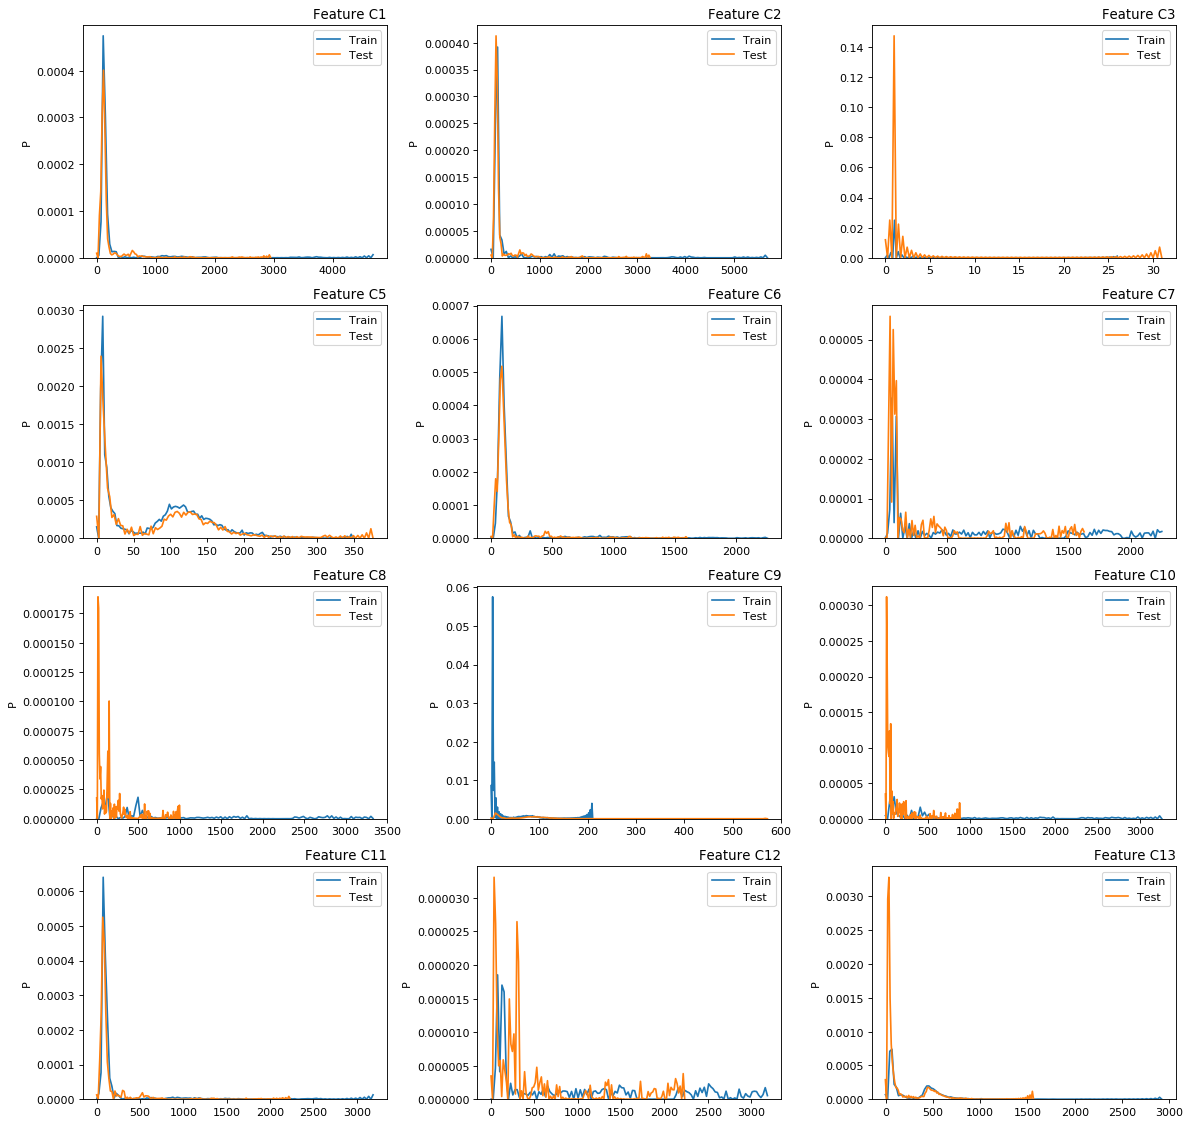

In [10]:
plot_density_distribution2(train, test, ['C1','C2','C3','C5','C6','C7','C8','C9','C10','C11','C12','C13'])

In [81]:
#новые признаки
train['TransactionAmt_to_card1'] = train.TransactionAmt/train.card1
test['TransactionAmt_to_card1'] = test.TransactionAmt/test.card1

train['TransactiomAmt_to_mean_card1'] = train['TransactionAmt']/train.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactiomAmt_to_mean_card1'] = test['TransactionAmt']/test.groupby(['card1'])['TransactionAmt'].transform('mean')

train['TransactiomAmt_to_mean_card2'] = train['TransactionAmt']/train.groupby(['card2'])['TransactionAmt'].transform('mean')
test['TransactiomAmt_to_mean_card2'] = test['TransactionAmt']/test.groupby(['card2'])['TransactionAmt'].transform('mean')

train['TransactiomAmt_to_mean_DeviceType'] = train['TransactionAmt']/train.groupby(['DeviceType'])['TransactionAmt'].transform('mean')
test['TransactiomAmt_to_mean_DeviceType'] = test['TransactionAmt']/test.groupby(['DeviceType'])['TransactionAmt'].transform('mean')

train['TransactiomAmt_to_mean_card4'] = train['TransactionAmt']/train.groupby(['card4'])['TransactionAmt'].transform('mean')
test['TransactiomAmt_to_mean_card4'] = test['TransactionAmt']/test.groupby(['card4'])['TransactionAmt'].transform('mean')

train['TransactiomAmt_to_std_card1'] = train['TransactionAmt']/train.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactiomAmt_to_std_card1'] = test['TransactionAmt']/test.groupby(['card1'])['TransactionAmt'].transform('std')

train['card1_to_mean_DeviceType'] = train['card1']/train.groupby(['DeviceType'])['TransactionAmt'].transform('mean')
test['card1_to_mean_DeviceType'] = test['card1']/test.groupby(['DeviceType'])['TransactionAmt'].transform('mean')

In [82]:
train['Log_TransactionAmt'] = np.log(train.TransactionAmt)
test['Log_TransactionAmt'] = np.log(test.TransactionAmt)

In [83]:
train.groupby(['card1'])['TransactionAmt'].transform('mean')

0         351.931163
1         234.292753
2          97.015542
3         123.416340
4          96.972222
             ...    
590535     96.995799
590536    242.041667
590537    119.741362
590538    122.763623
590539    209.861345
Name: TransactionAmt, Length: 590540, dtype: float64

In [66]:
test.head()

TransactionID  TransactionDT  TransactionAmt  ProductCD  card1  card2  \
0        3663549       18403224           31.95          4  10409  111.0   
1        3663550       18403263           49.00          4   4272  111.0   
2        3663551       18403310          171.00          4   4476  574.0   
3        3663552       18403310          284.95          4  10989  360.0   
4        3663553       18403317           67.95          4  18018  452.0   

   card3  card4  card5  card6  addr1  addr2   dist1  dist2  P_emaildomain  \
0  150.0      4  226.0      2  170.0   87.0     1.0    NaN             16   
1  150.0      4  226.0      2  299.0   87.0     4.0    NaN              2   
2  150.0      4  226.0      2  472.0   87.0  2635.0    NaN             19   
3  150.0      4  166.0      2  205.0   87.0    17.0    NaN             16   
4  150.0      2  117.0      2  264.0   87.0     6.0    NaN             16   

   R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0             32  6.0  6.0  0.0  0.0  3.0  4.0  0.0  0.0  6.0  0.0  5.0  1.0   
1             32  3.0  2.0  0.0  0.0  0.0  1.0  0.0  0.0  2.0  0.0  1.0  1.0   
2             32  2.0  2.0  0.0  0.0  0.0  5.0  0.0  0.0  4.0  0.0  2.0  0.0   
3             32  5.0  2.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  2.0  0.0   
4             32  6.0  6.0  0.0  0.0  2.0  5.0  0.0  0.0  5.0  0.0  6.0  0.0   

     C13  C14     D1     D2    D3     D4    D5  D6  D7  D8  D9    D10    D11  \
0  115.0  6.0  419.0  419.0  27.0  398.0  27.0 NaN NaN NaN NaN  418.0  203.0   
1   12.0  2.0  149.0  149.0   7.0  634.0   7.0 NaN NaN NaN NaN  231.0  634.0   
2   22.0  2.0  137.0  137.0  10.0   97.0  10.0 NaN NaN NaN NaN  136.0  136.0   
3    7.0  4.0   42.0   42.0  41.0  242.0  41.0 NaN NaN NaN NaN  242.0  242.0   
4   14.0  6.0   22.0   22.0   0.0   22.0   0.0 NaN NaN NaN NaN   22.0   22.0   

   D12  D13  D14    D15  M1  M2  M3  M4  M5  M6  M7  M8  M9   V1   V2   V3  \
0  NaN  NaN  NaN  409.0   1   1   0   3   2   0   1   1   1  1.0  1.0  1.0   
1  NaN  NaN  NaN  634.0   1   0   0   0   2   0   2   2   2  1.0  1.0  1.0   
2  NaN  NaN  NaN   97.0   1   1   0   0   0   0   0   0   0  1.0  1.0  1.0   
3  NaN  NaN  NaN  242.0   1   1   1   3   2   1   2   2   2  1.0  1.0  1.0   
4  NaN  NaN  NaN   22.0   1   1   1   3   2   0   0   1   1  1.0  1.0  1.0   

    V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  V18  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  V33  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  1.0  0.0  0.0  2.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   
4  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  V48  \
0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
1  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
2  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0   
3  0.0  2.0  2.0  2.0  2.0  0.0  0.0  1.0  0.0  0.0  2.0  2.0  2.0  2.0  1.0   
4  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   

   V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  V63  \
0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0

In [67]:
train.drop(col_many_nan,axis = 1,inplace = True)

In [68]:
test.drop(col_many_nan,axis = 1,inplace = True)

In [69]:
train.shape

(590540, 371)

In [85]:
X_train = train.drop(['isFraud', 'TransactionID','TransactionDT','Date'],axis=1)
Y_train = train.isFraud

X_test = test.drop(['TransactionID','TransactionDT','Date'],axis=1)
print(X_train.shape, X_test.shape, Y_train.shape)

(590540, 368) (506691, 368) (590540,)


In [86]:
gc.collect()

71

In [87]:
N = 50000

In [88]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [89]:
params = {'num_leaves': 256,
          'min_child_samples': 79,
          'objective': 'binary',
          'max_depth': 13,
          'learning_rate': 0.03,
          "boosting_type": "gbdt",
          "subsample_freq": 3,
          "subsample": 0.9,
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3,
          'reg_lambda': 0.3,
          'colsample_bytree': 0.9,
          #'categorical_feature': cat_cols
         }

In [90]:
def train_model(params,X,y, n_splits, model_type):
    kfold = KFold(n_splits)
    
    # list of scores on folds
    scores = []
    
    for fold_n, (train_index, valid_index) in enumerate(kfold.split(X)):
        if type(X) == np.ndarray:
            X_train, X_valid = X[train_index], X[valid_index]
            y_train, y_valid = y[train_index], y[valid_index]
        else:
            X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
            y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMClassifier(**params,n_estimators = 5000,n_jobs=10)
            model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=False,
                      early_stopping_rounds = 100,) #?
            
            y_pred_valid = model.predict_proba(X_valid)[:, 1] #Вероятность для 2-ого класса
            print(y_pred_valid.shape)
            
        scores.append(roc_auc_score(y_valid, y_pred_valid))
    print('CV mean: {0:.4f}, std: {1:.4f}'.format(np.mean(scores), np.std(scores)))
    return y_pred_valid, scores, model

In [91]:
y_pr, scores, model = train_model(params, X_train, Y_train, 5, 'lgb')

(118108,)
(118108,)
(118108,)
(118108,)
(118108,)
CV mean: 0.9274, std: 0.0106


In [ ]:
CV mean: 0.9277, std: 0.0110


In [139]:
del model
gc.collect()

4879

In [189]:
X_train.columns

Index(['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4',
       'card5', 'card6', 'addr1', 'addr2',
       ...
       'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', '_Weekdays',
       '_Hours', '_Days', 'TransactionAmt_to_card1', 'Log_TransactionAmt'],
      dtype='object', length=362)

In [92]:
model.feature_importances_

array([1488,  398, 4358, 5330,  604,  509, 2118,  769, 4643,   98, 2256,
       2130, 1107, 1800, 1244,   58,  296,  565, 1070,   92,  387,  756,
        414, 1117,  379, 2424, 1112, 1736, 1993,  840, 2440,  785, 1978,
       1296, 2933,    9,  109,  229,  619,  592,  623,  139,  112,  130,
          1,   40,   62,  114,  164,   47,   76,   21,   21,   69,   57,
        212,  226,    0,   14,    3,   15,    9,  188,  260,    8,    8,
         91,  101,   47,   87,    0,    0,   64,   88,    7,    4,   27,
         58,  238,  237,  143,  306,   37,   57,    0,   21,   97,  208,
        382,   34,  110,  127,   94,   18,   72,   96,  300,  314,  142,
        202,   53,   72,   28,   50,  285,  434,   33,   69,    0,  106,
        229,    0,   73,  148,   11,   16,   42,   78,  300,  280,  193,
        314,   66,   44,   96,  355,  403,   14,   71,  161,  374,    0,
          0,  100,  105,    9,   20,   67,   15,  127,   25,    7,  125,
         16,   14,   88,    9,    6,   29,    4,   

In [93]:
feature_importance_df = pd.concat([
    pd.Series(X_train.columns),
    pd.Series(model.feature_importances_) ], axis=1, )
feature_importance_df.columns = ['featureName', 'importance']

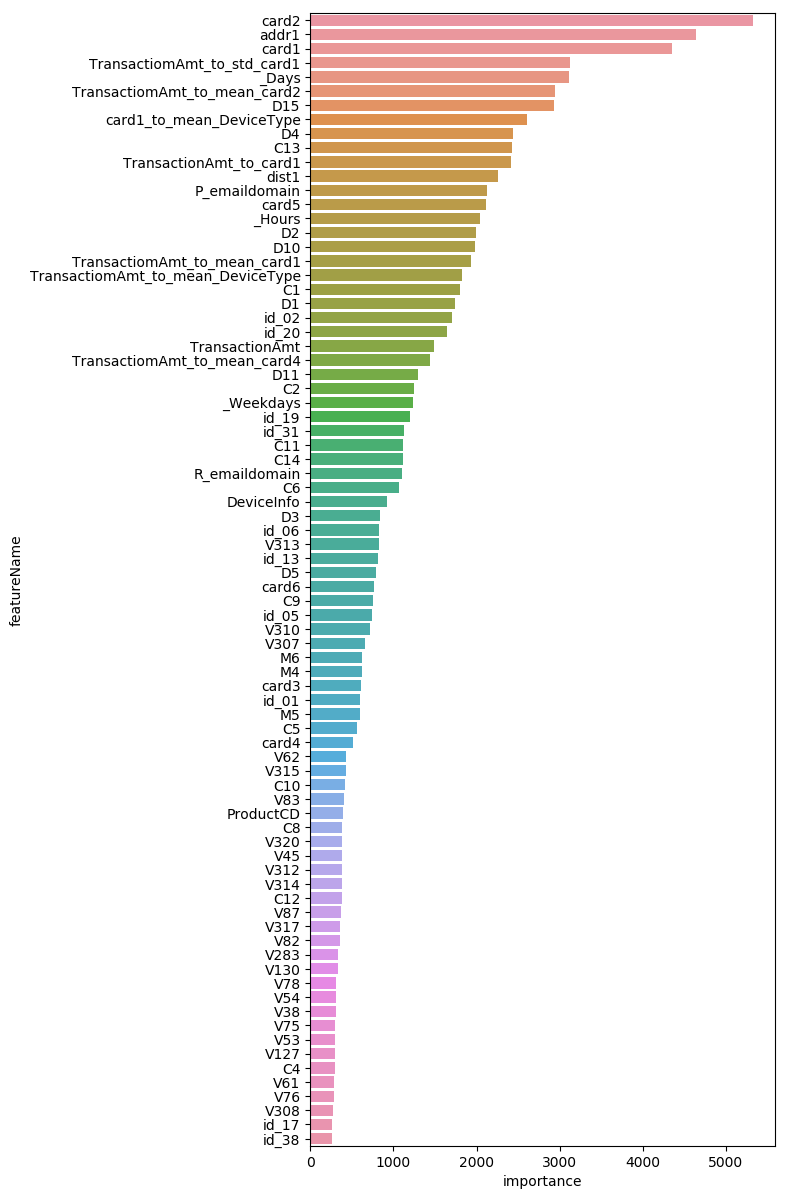

In [94]:
plt.figure(figsize=(6,15), dpi = 100)
temp = feature_importance_df.sort_values(by=['importance'],ascending = False)
sns.barplot(x='importance', y='featureName', data=temp[:80])

-83.0


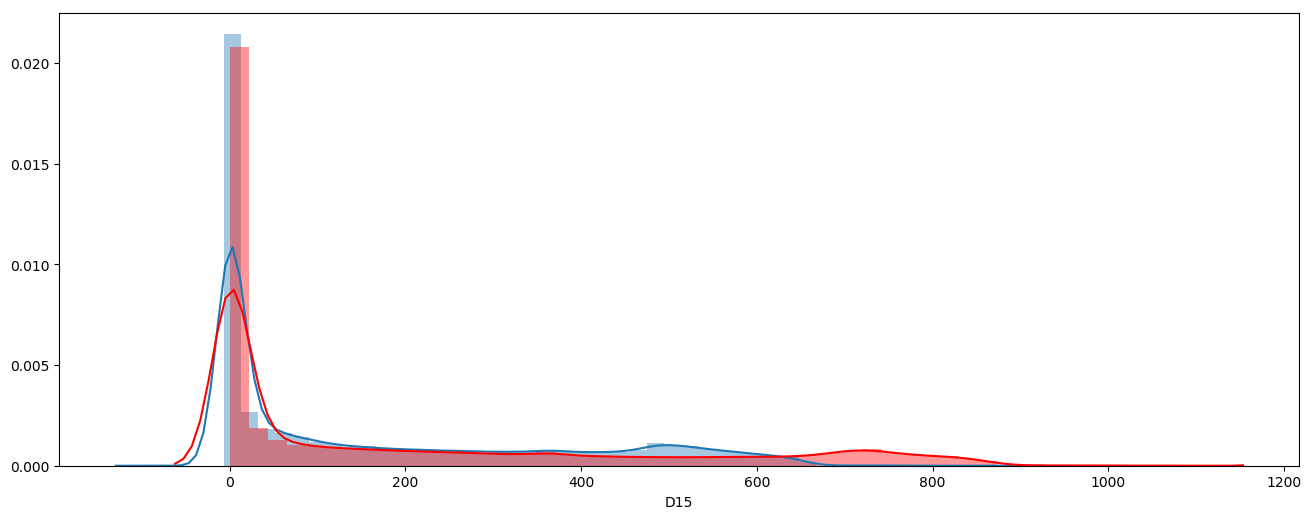

In [193]:
plt.figure(figsize=(16,6),dpi=100)
print(min(train.D15))
sns.distplot(train.D15.dropna())

sns.distplot(test.D15.dropna(),color='red')

In [194]:
temp[temp.featureName=='C3']

featureName  importance
15          C3          64

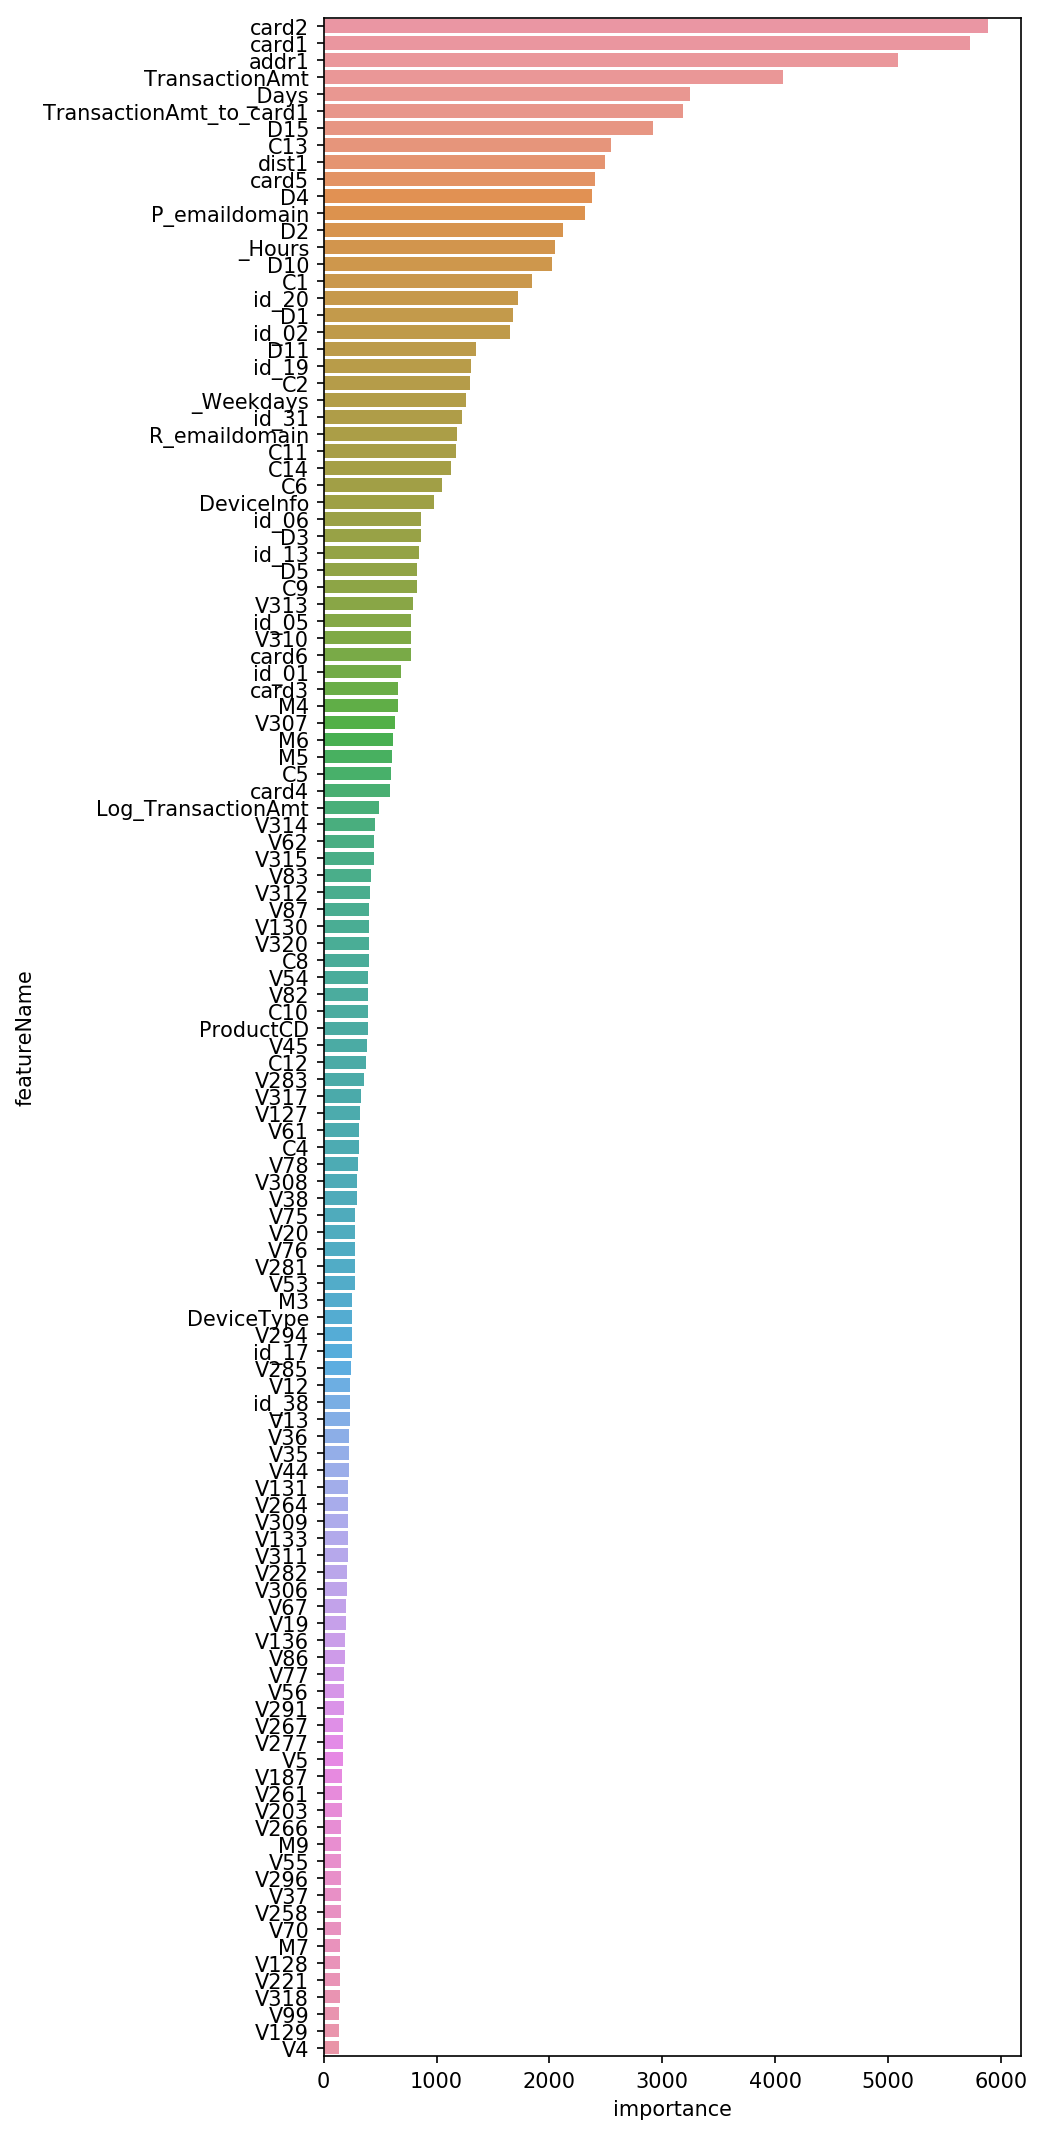

In [195]:
plt.figure(figsize=(6,18), dpi = 150)
temp = feature_importance_df.sort_values(by=['importance'],ascending = False)
sns.barplot(x='importance', y='featureName', data=temp[:120])

In [227]:
from sklearn.linear_model import LogisticRegression as lr

In [231]:
lr_model = lr().fit(X_train.fillna(-999), Y_train)

d:\program\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\program\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [232]:
lr_model.predict(X_test.fillna(-999))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
CV mean: 0.9283, std: 0.0109

In [61]:
del y_pr, model

In [62]:
gc.collect()

0

In [196]:
y = model.predict(X_test)

NameError: name 'X_test' is not defined

In [199]:
y_pred = model.predict_proba(X_test, num_iteration=model.best_iteration_)

In [200]:
y_pred

array([[0.99845109, 0.00154891],
       [0.99677142, 0.00322858],
       [0.99507209, 0.00492791],
       ...,
       [0.99051598, 0.00948402],
       [0.98328429, 0.01671571],
       [0.9928508 , 0.0071492 ]])

### submission

In [201]:
submit = pd.read_csv('sample_submission.csv')
submit['isFraud']= y_pred[:,0]

In [202]:
submit.to_csv('submit_test.csv',index=False)

In [13]:
df = pd.DataFrame({
    'user_id':[1,2,1,3,3,],
    'content_id':[1,1,2,2,2],
    'lvl':[10,15, 25, 100, 15],
    'tag':['cool','nice','clever','clever','not-bad']
})

e = df.groupby("content_id")['tag'].apply(lambda tags: ','.join(tags))
list(e)

['cool,nice', 'clever,clever,not-bad']

In [14]:
df

user_id  content_id  lvl      tag
0        1           1   10     cool
1        2           1   15     nice
2        1           2   25   clever
3        3           2  100   clever
4        3           2   15  not-bad

In [44]:
df.groupby('user_id')['lvl']

In [38]:
df.groupby('user_id')['lvl'].transform('mean')

0    17.5
1    15.0
2    17.5
3    57.5
4    57.5
Name: lvl, dtype: float64